# seaborn 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' #สร้างกราฟความละเอียดเป็นสองเท่า

In [2]:
print(f"pandas  version = {pd.__version__}"
     )
print(f"seaborn version = {sns.__version__}")

pandas  version = 1.2.4
seaborn version = 0.11.0


# read miles per gallon dataset (mpg.csv)

In [3]:
url='C:/Users/61307/PycharmProjects/Prasertcbs/mpg.csv'
df=pd.read_csv(url)
df.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

# countplot = นับเป็นความถี่ ควรใช้กับข้อมูล discrete

<AxesSubplot:xlabel='manufacturer', ylabel='count'>

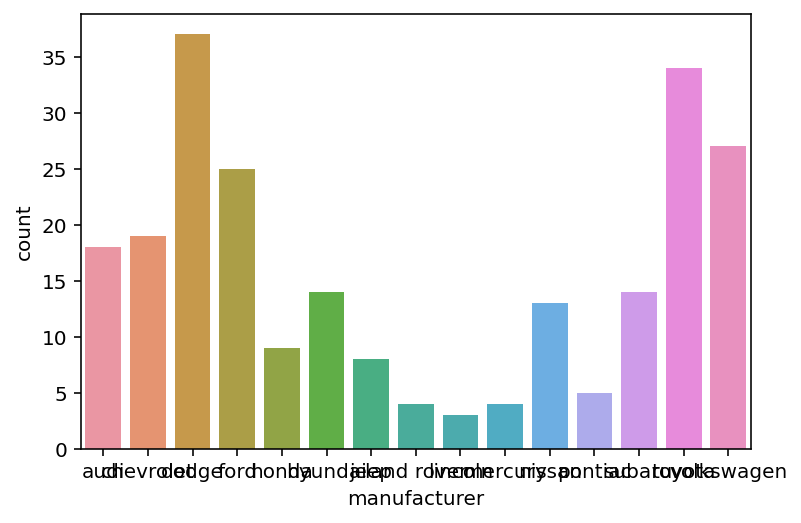

In [4]:
sns.countplot(x='manufacturer',data =df)

<AxesSubplot:xlabel='count', ylabel='manufacturer'>

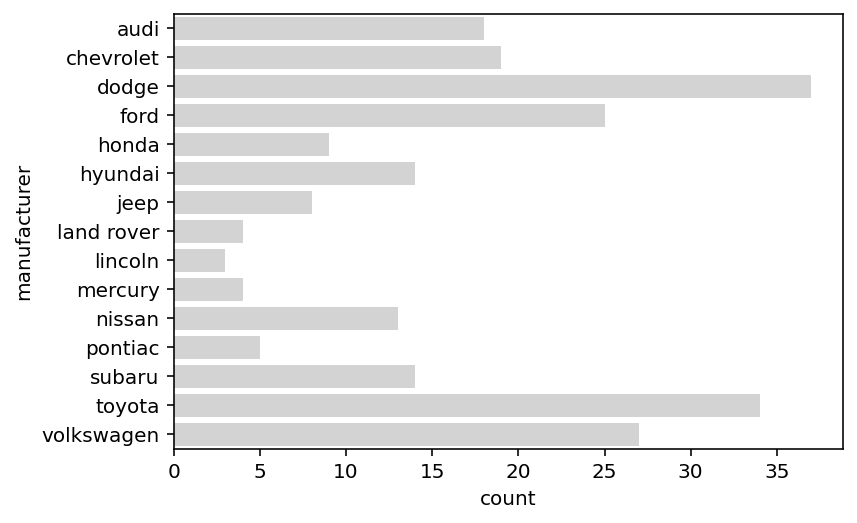

In [5]:
sns.countplot(y ='manufacturer',data =df,color= 'lightgray')

<AxesSubplot:xlabel='count', ylabel='class'>

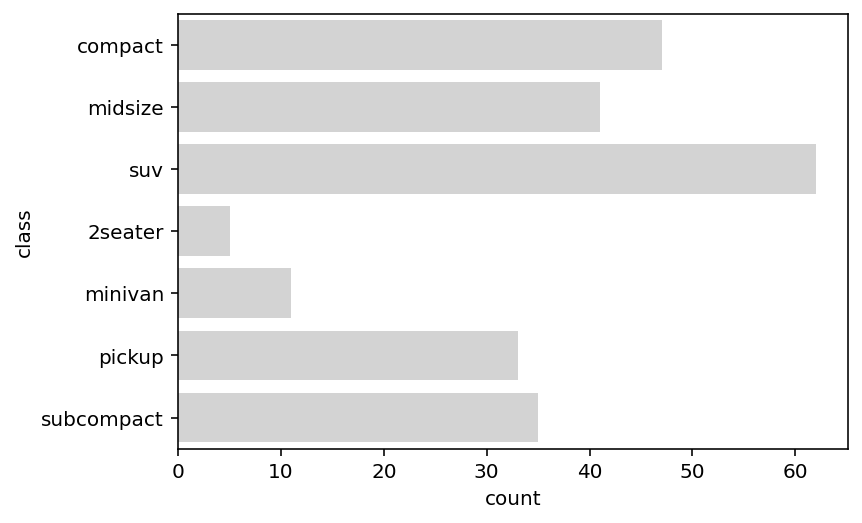

In [6]:
sns.countplot(y ='class',data =df,color= 'lightgray')

## set chart (figure) size

<AxesSubplot:xlabel='class', ylabel='count'>

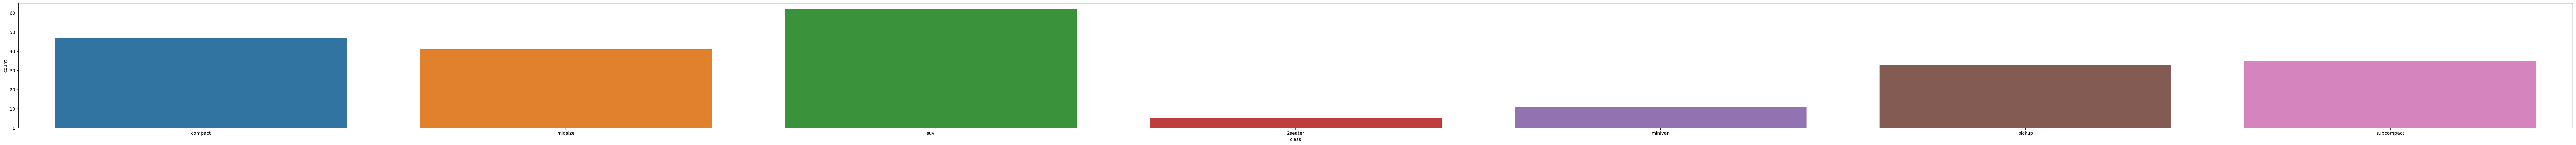

In [7]:
plt.figure(figsize=(100,5))  #(x,y)
sns.countplot(x='class',data=df)

## countplot order by value_count

In [8]:
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [9]:
df['class'].value_counts().index

Index(['suv', 'compact', 'midsize', 'subcompact', 'pickup', 'minivan',
       '2seater'],
      dtype='object')

<AxesSubplot:xlabel='class', ylabel='count'>

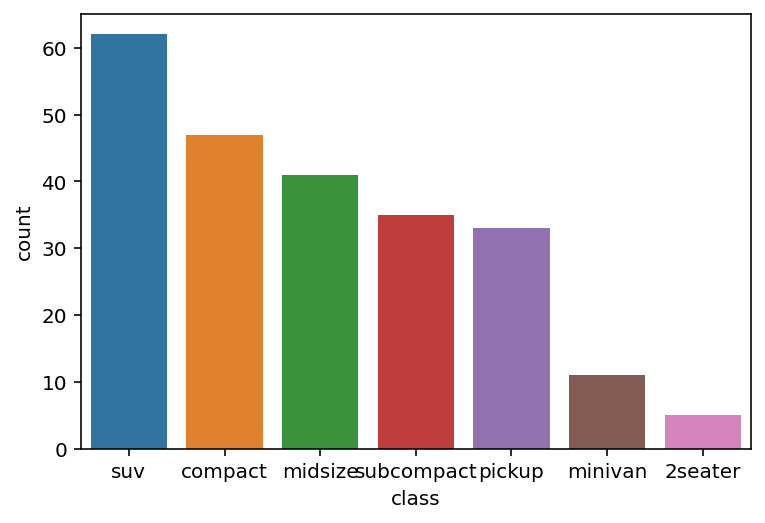

In [10]:
sns.countplot(x='class',data=df,
             order =df['class'].value_counts().index)

In [11]:
#Change color

<AxesSubplot:xlabel='class', ylabel='count'>

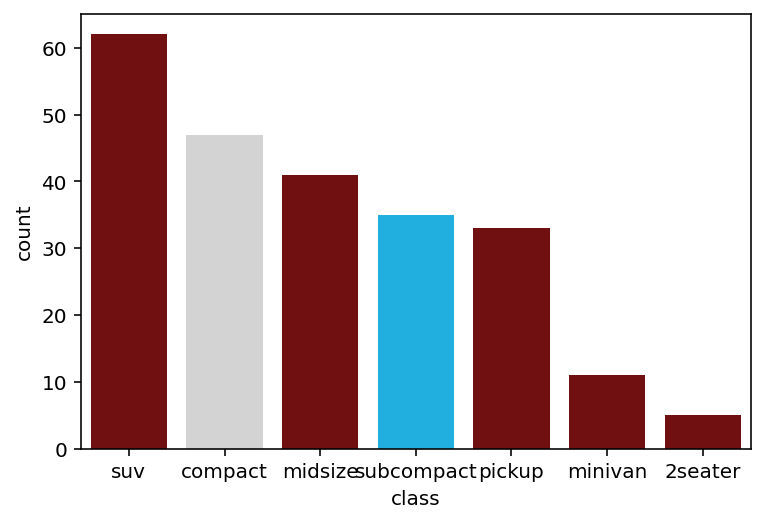

In [12]:
p = ['maroon','lightgray','maroon','deepskyblue','maroon','maroon','maroon']
sns.countplot(x='class', data=df,
              palette=p,
              order = df['class'].value_counts().index)

<AxesSubplot:xlabel='class', ylabel='count'>

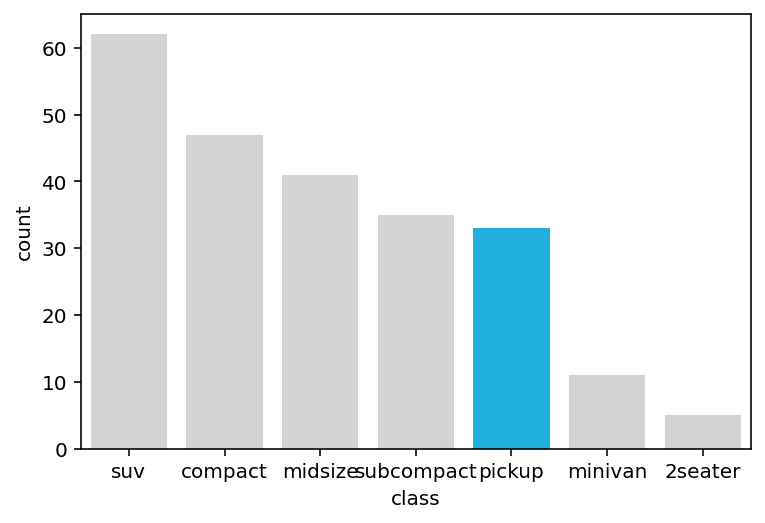

In [13]:
#p = ["deepskyblue" if v > 40 else "lightgray" for v in df['class'].value_counts()]

p = ["deepskyblue" if v == 'pickup' else "lightgray" 
     
     for v in df['class'].value_counts().index]

sns.countplot(x='class', data=df,
              palette=p,
              order = df['class'].value_counts().index)

## add horizontal line  #plt.axhline(y=

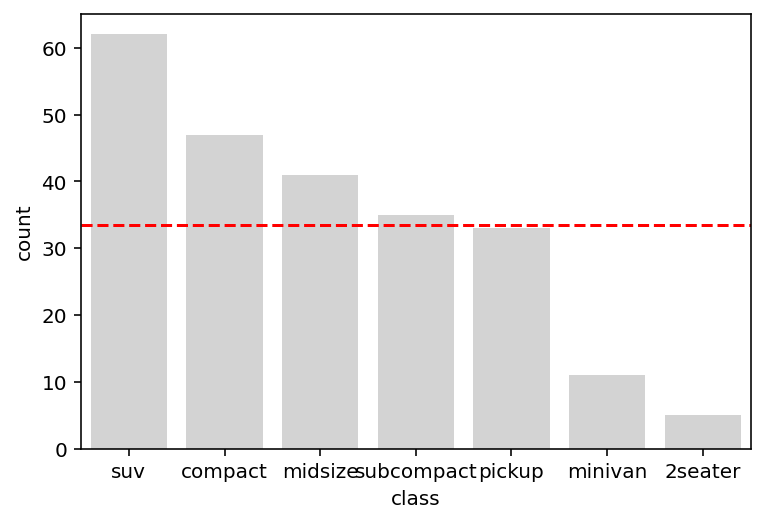

In [14]:
avg = df['class'].value_counts().mean()

sns.countplot(x = 'class',
              data = df,
              color = 'lightgray',
              order =df['class'].value_counts().index)
plt.axhline(y=avg , linestyle='--',color='red')


## add verticle line #plt.axvline(x=

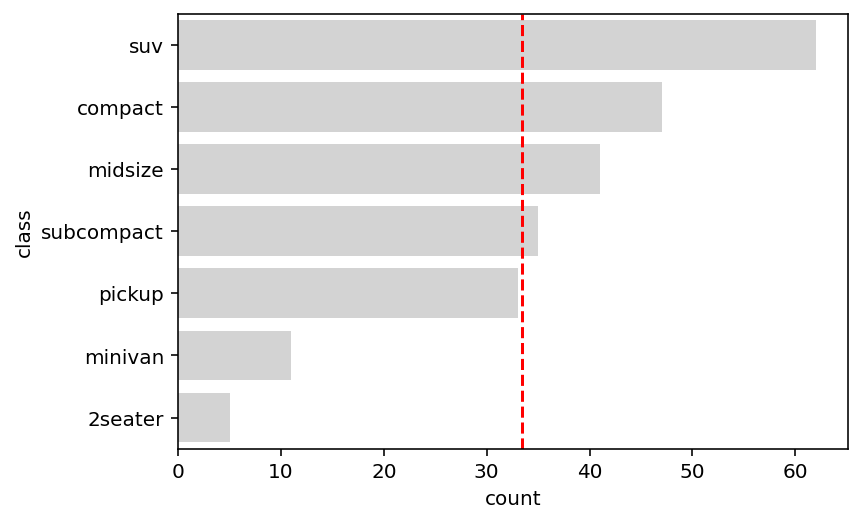

In [15]:
avg = df['class'].value_counts().mean()

sns.countplot(y = 'class',
              data = df,
              color = 'lightgray',
              order =df['class'].value_counts().index)
plt.axvline(x=avg , linestyle='--',color='red')
plt.ylabel=''

## highlight above avg

In [16]:
avg = df['class'].value_counts().mean()

color =['tomato' if (v>avg) else 'lightgray' for v in df['class'].value_counts()]
color

['tomato', 'tomato', 'tomato', 'tomato', 'lightgray', 'lightgray', 'lightgray']

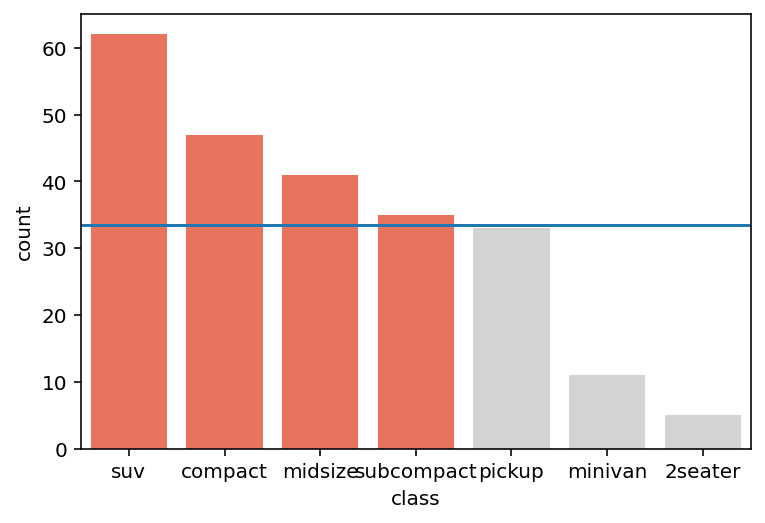

In [17]:
sns.countplot(x='class',
              data = df,
              palette = color,
              order = df['class'].value_counts().index)
plt.axhline(y=avg)

## Two Bar chart  #hue='year'


<AxesSubplot:xlabel='drv', ylabel='count'>

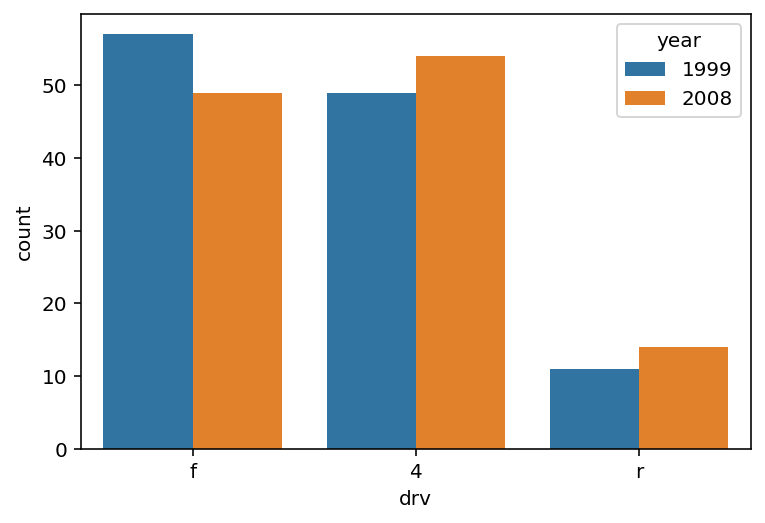

In [18]:
sns.countplot(x='drv', data=df, 
              hue='year')

## create 'gear'/'drv' column from trans

In [19]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df['drv'].map({'f':'front','r':'rear','4':'4-wheel'}).astype('category')
#df.head()

# histogram ด้วย histplot

C:\Users\61307\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cty', ylabel='Density'>

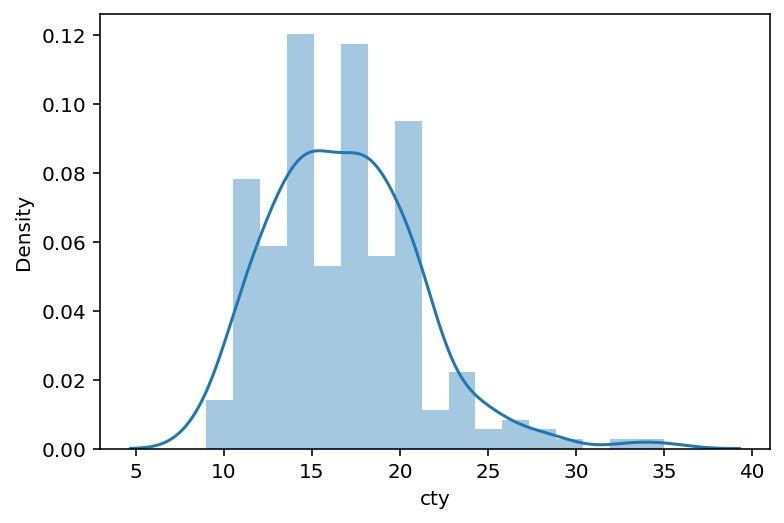

In [20]:
sns.distplot(df['cty'])

C:\Users\61307\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cty'>

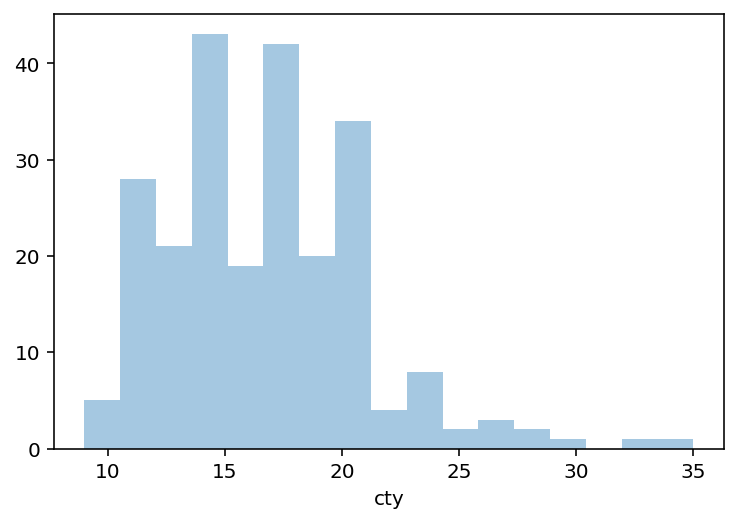

In [21]:
sns.distplot(df['cty'],kde = False)

<AxesSubplot:xlabel='cty', ylabel='Density'>

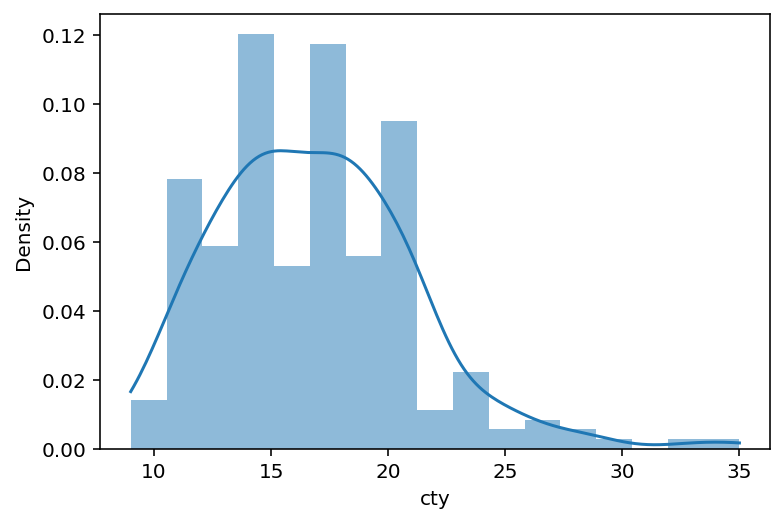

In [22]:
sns.histplot(df['cty'], kde=True, stat="density", linewidth=0) #ใช้อันนี้เเทนร

C:\Users\61307\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


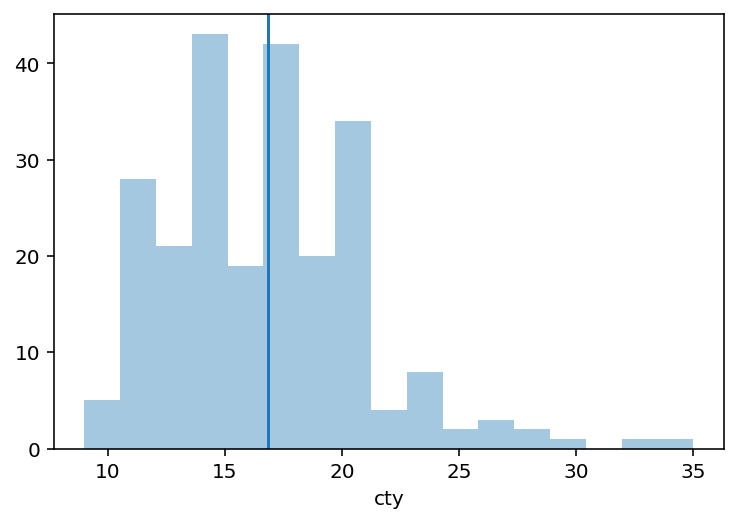

In [23]:
sns.distplot(df['cty'],kde = False)
plt.axvline(x=df.cty.mean())

## get mean and sd

Text(0.5, 1.0, 'mean = 16.86, sd= 4.26')

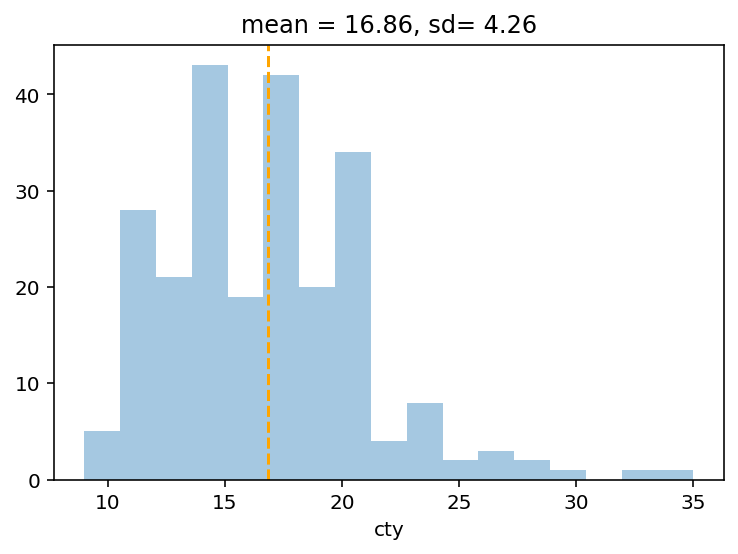

In [24]:
sns.distplot(df['cty'],kde = False)
plt.axvline(x=df.cty.mean(),color='orange',linestyle="--")
plt.title(f"mean = {df.cty.mean():.2f}, sd= {df.cty.std():.2f}")  #:.2f mean 2 dicimal

## histogram overlap

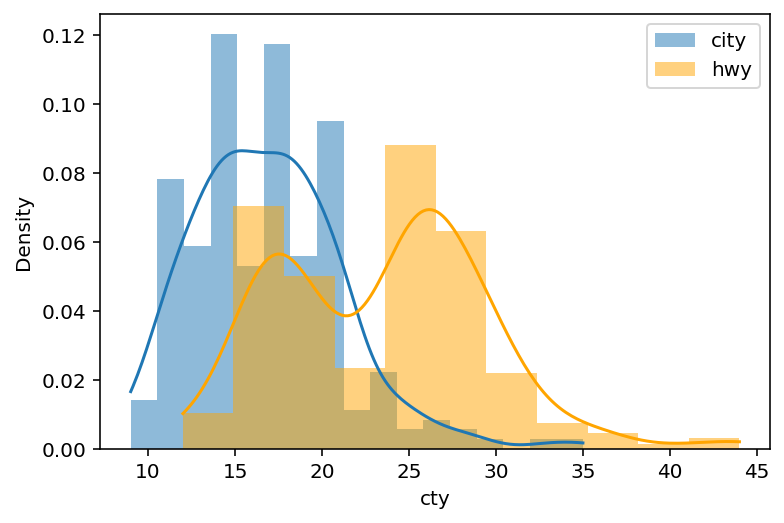

In [25]:
#sns.distplot(df['cty'], label="city")
#sns.distplot(df['hwy'], label="highway")
sns.histplot(df['cty'], kde=True, stat="density", linewidth=0,label="city")
sns.histplot(df['hwy'], kde=True, color='orange',stat="density", linewidth=0,label="hwy")
plt.legend()

## histogram left right


(2,)


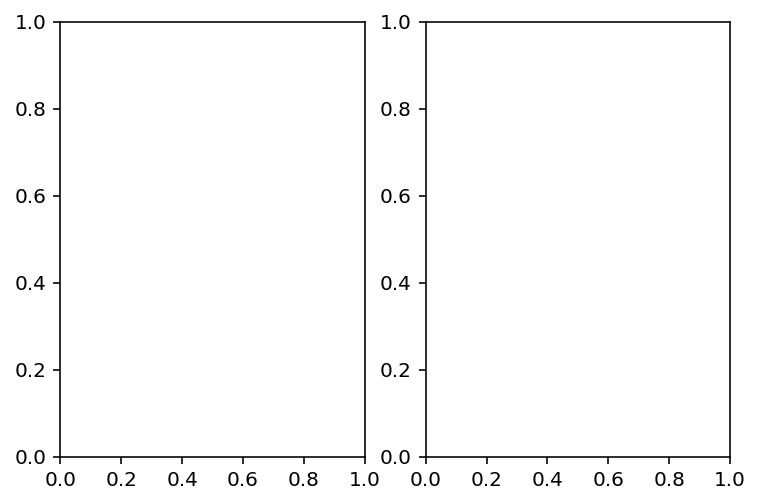

In [26]:
fig, ax = plt.subplots(1, 2)
print(ax.shape)

C:\Users\61307\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hwy'>

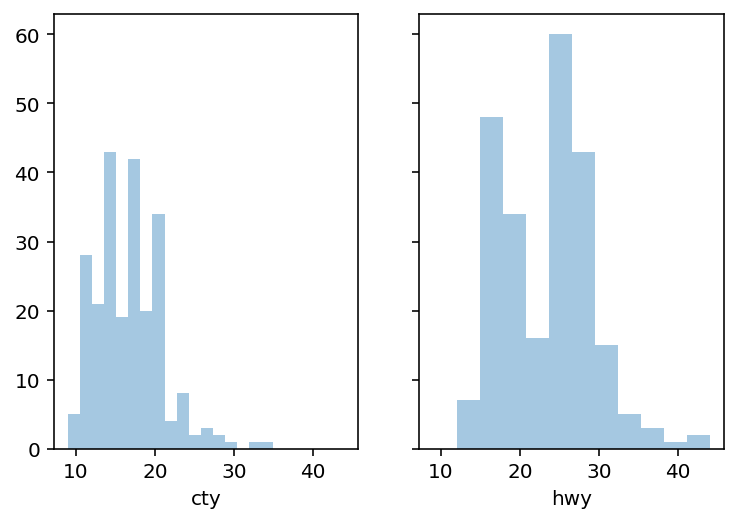

In [27]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
#print(ax.shape)
sns.distplot(df['cty'], kde=False, ax=ax[0])
sns.distplot(df['hwy'], kde=False, ax=ax[1])

# boxplot

<AxesSubplot:>

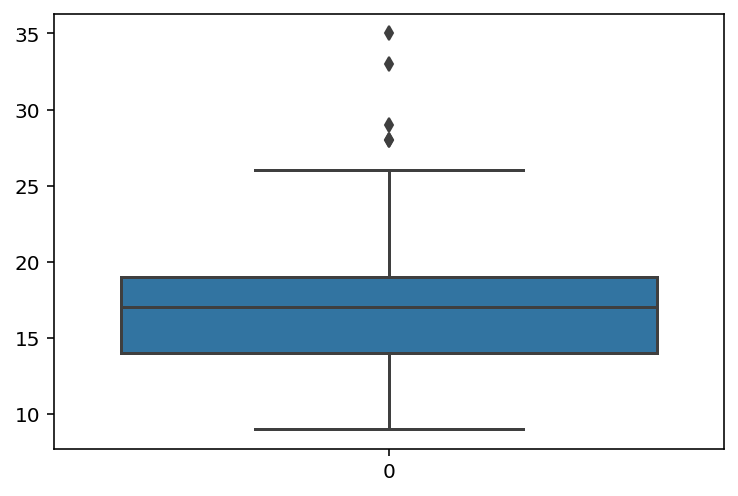

In [28]:
sns.boxplot(data = df['cty'])

<AxesSubplot:>

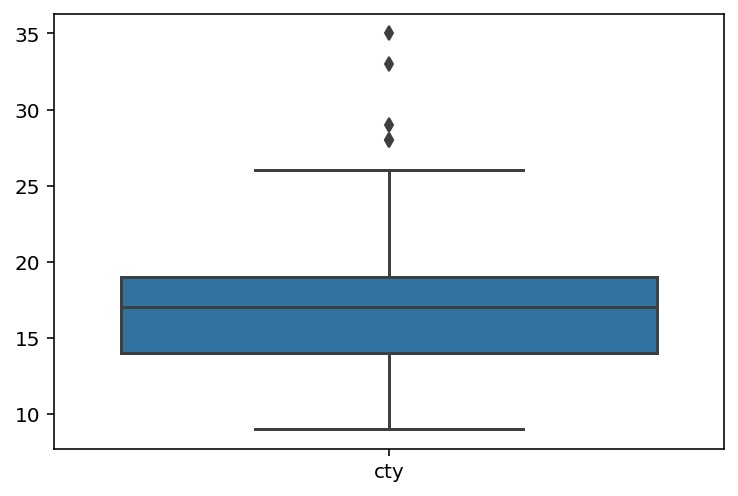

In [29]:
sns.boxplot(data = df[['cty']])

<AxesSubplot:>

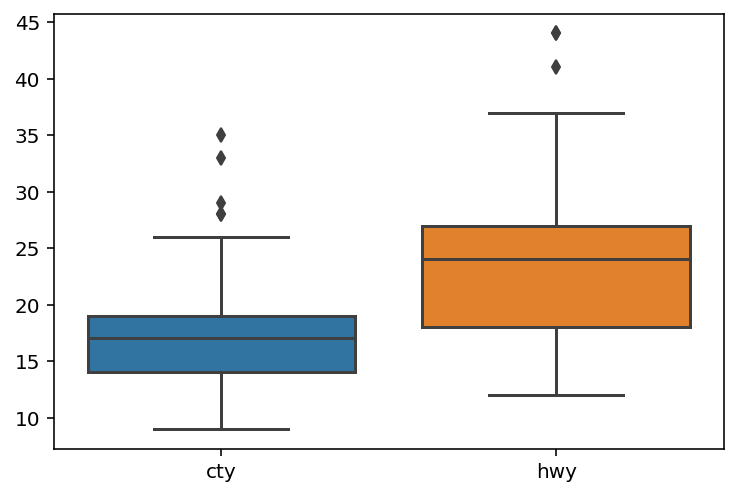

In [30]:
sns.boxplot(data = df[['cty','hwy']])

<AxesSubplot:xlabel='drv', ylabel='cty'>

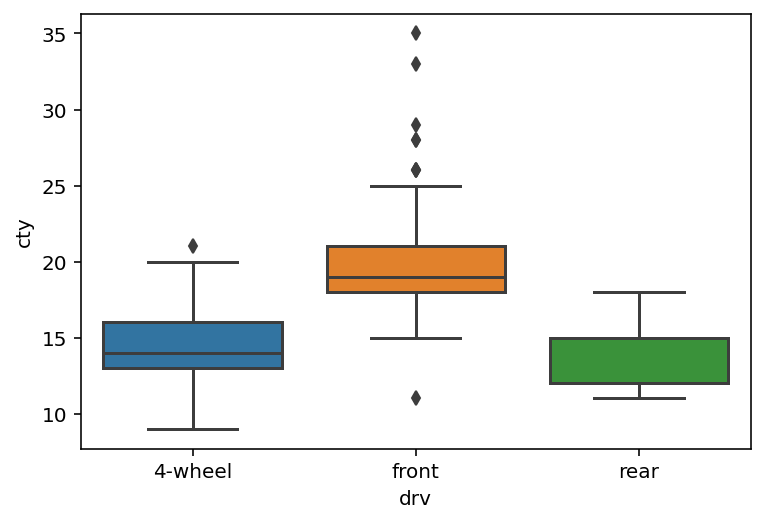

In [31]:
sns.boxplot(x='drv',y='cty',data=df)

<AxesSubplot:xlabel='cty', ylabel='drv'>

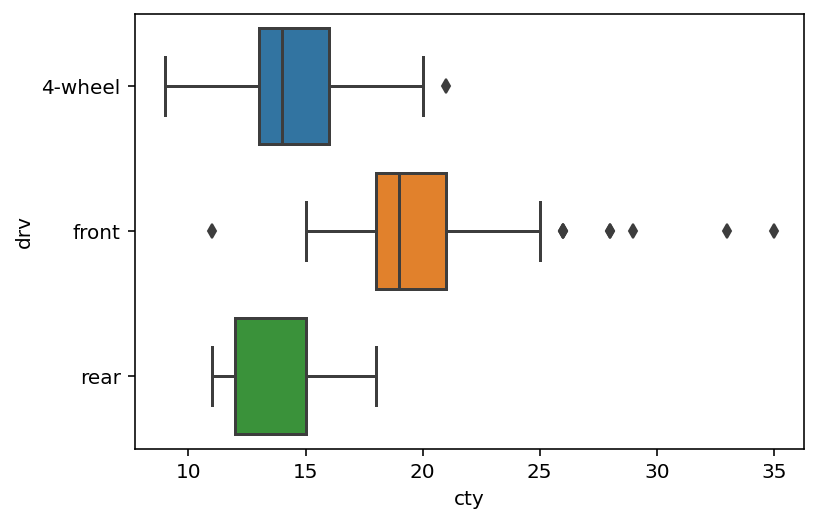

In [32]:
sns.boxplot(y='drv',x='cty',data=df)

<AxesSubplot:xlabel='cty', ylabel='drv'>

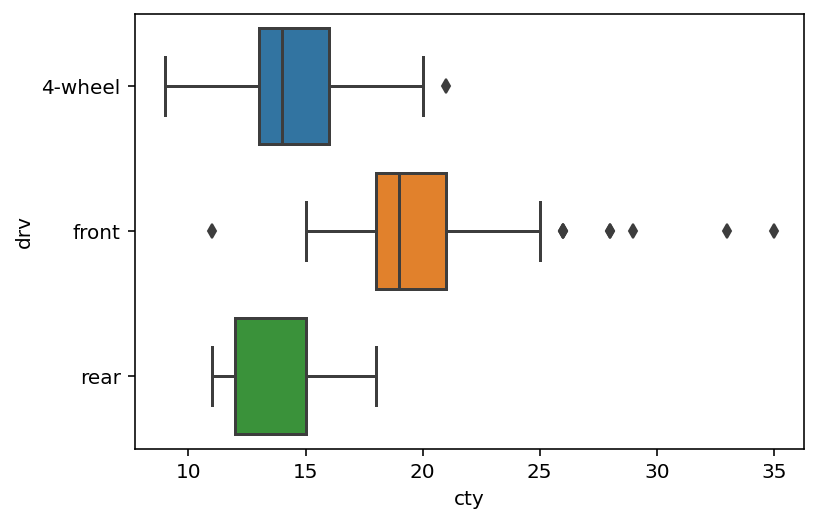

In [33]:
sns.boxplot(y='drv',x='cty',data=df)

<AxesSubplot:xlabel='cty', ylabel='drv'>

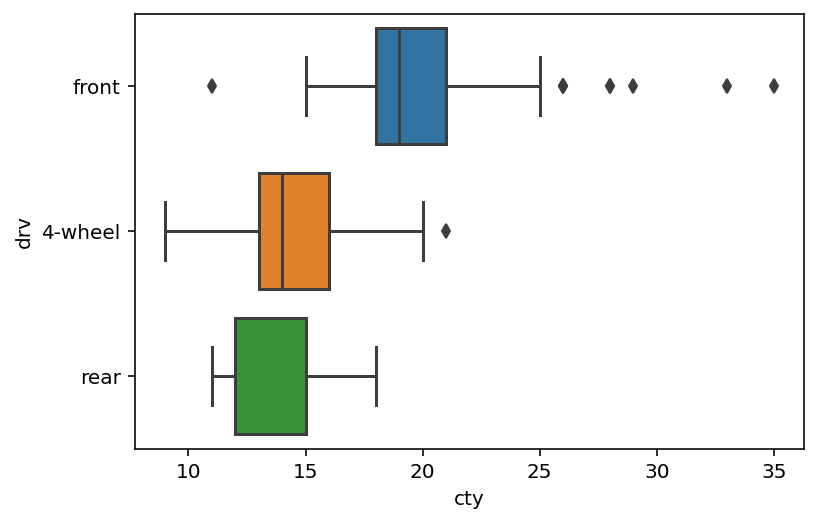

In [34]:
sns.boxplot(y='drv',x='cty',data=df,order=['front', '4-wheel', 'rear'])

Text(0.5, 1.0, 'miles per gallon by driving system')

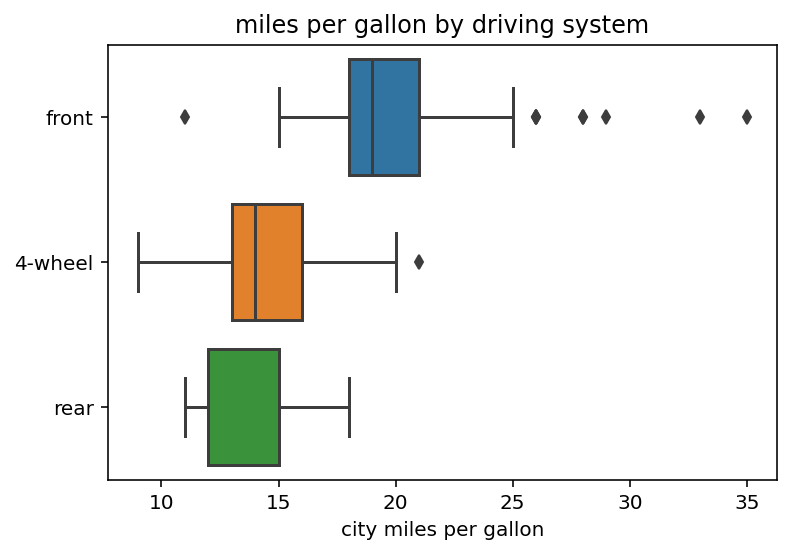

In [35]:
from imp import reload
reload(plt) 
sns.boxplot(y='drv', x='cty', data=df, order=['front', '4-wheel', 'rear'])
plt.ylabel('')
plt.xlabel('city miles per gallon')
plt.title('miles per gallon by driving system')

Text(0.5, 1.0, 'miles per gallon by driving system')

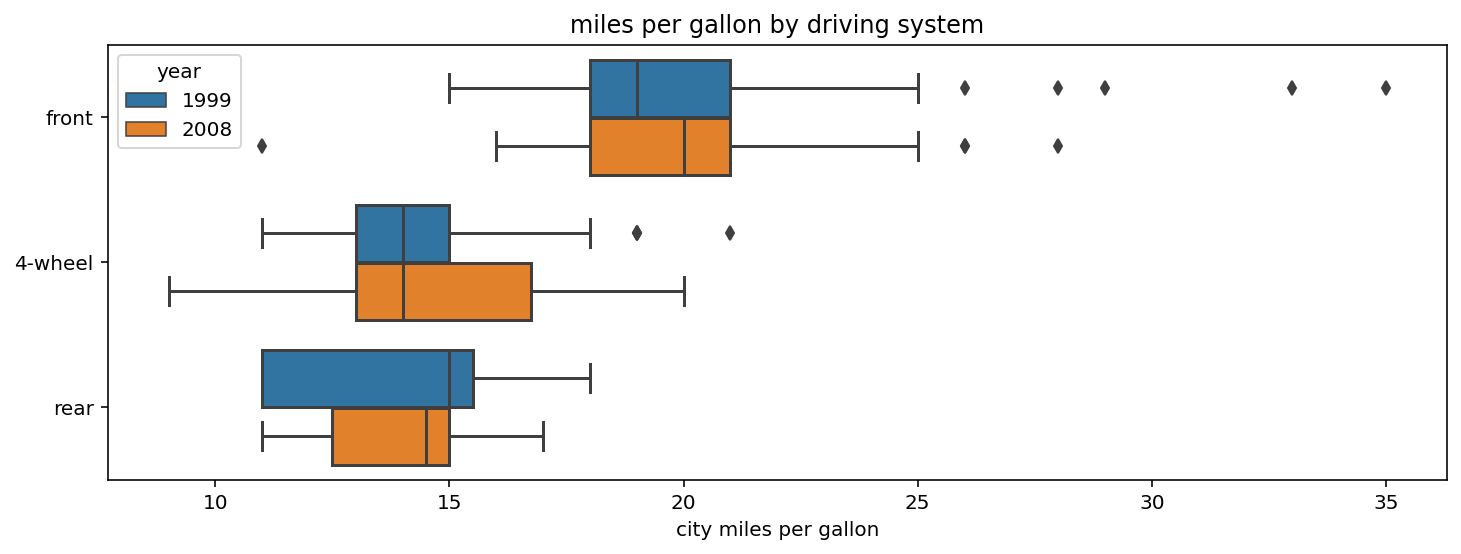

In [36]:
plt.figure(figsize=(12,4))
sns.boxplot(y='drv', x='cty', data=df,
            hue='year',order=['front', '4-wheel', 'rear'])
plt.ylabel('')
plt.xlabel('city miles per gallon')
plt.title('miles per gallon by driving system')

Text(0.5, 1.0, 'miles per gallon by driving system')

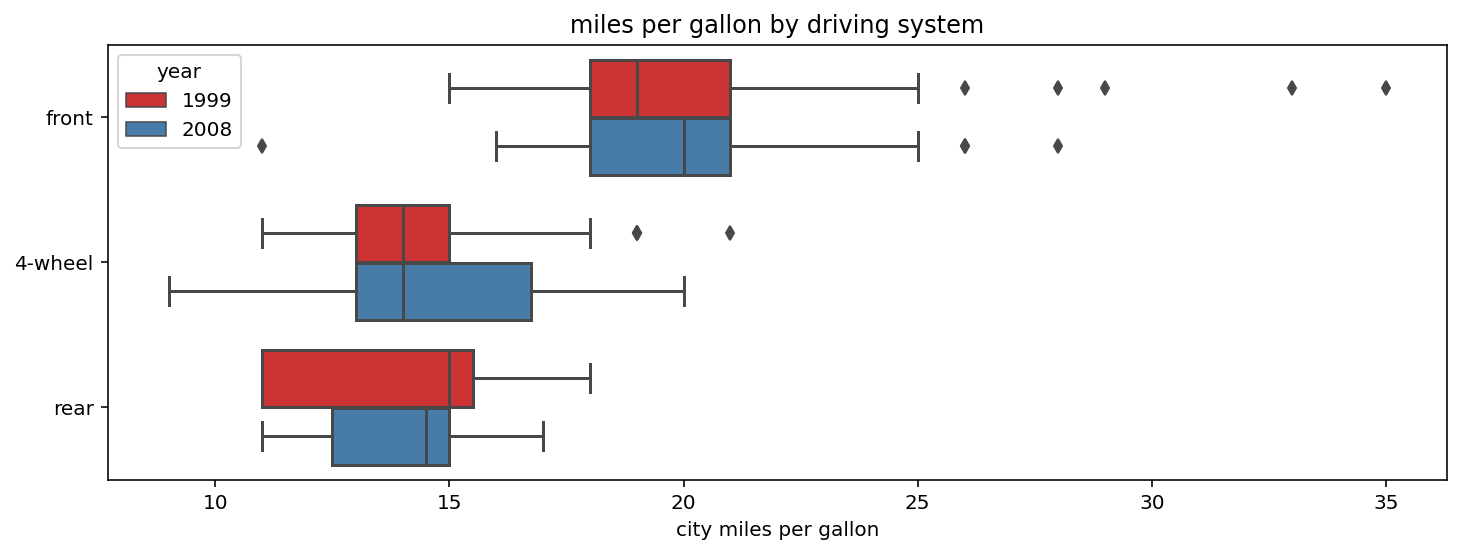

In [37]:
plt.figure(figsize=(12,4))
sns.boxplot(y='drv', x='cty', data=df,
            hue='year',order=['front', '4-wheel', 'rear'],
            palette='Set1')
plt.ylabel('')
plt.xlabel('city miles per gallon')
plt.title('miles per gallon by driving system')

# catplot หลายๆรูป

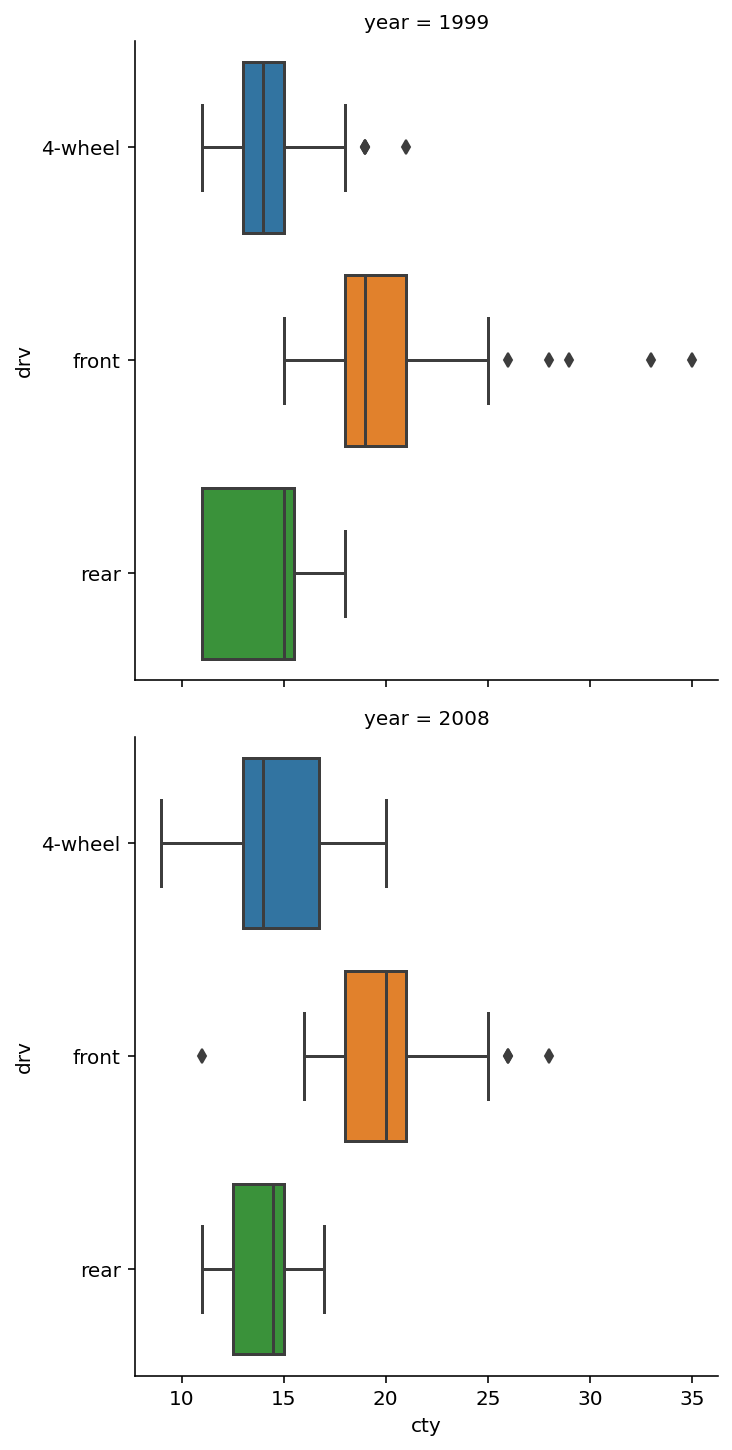

In [38]:
sns.catplot(y='drv', x='cty', data=df,
              kind='box',
              row='year')

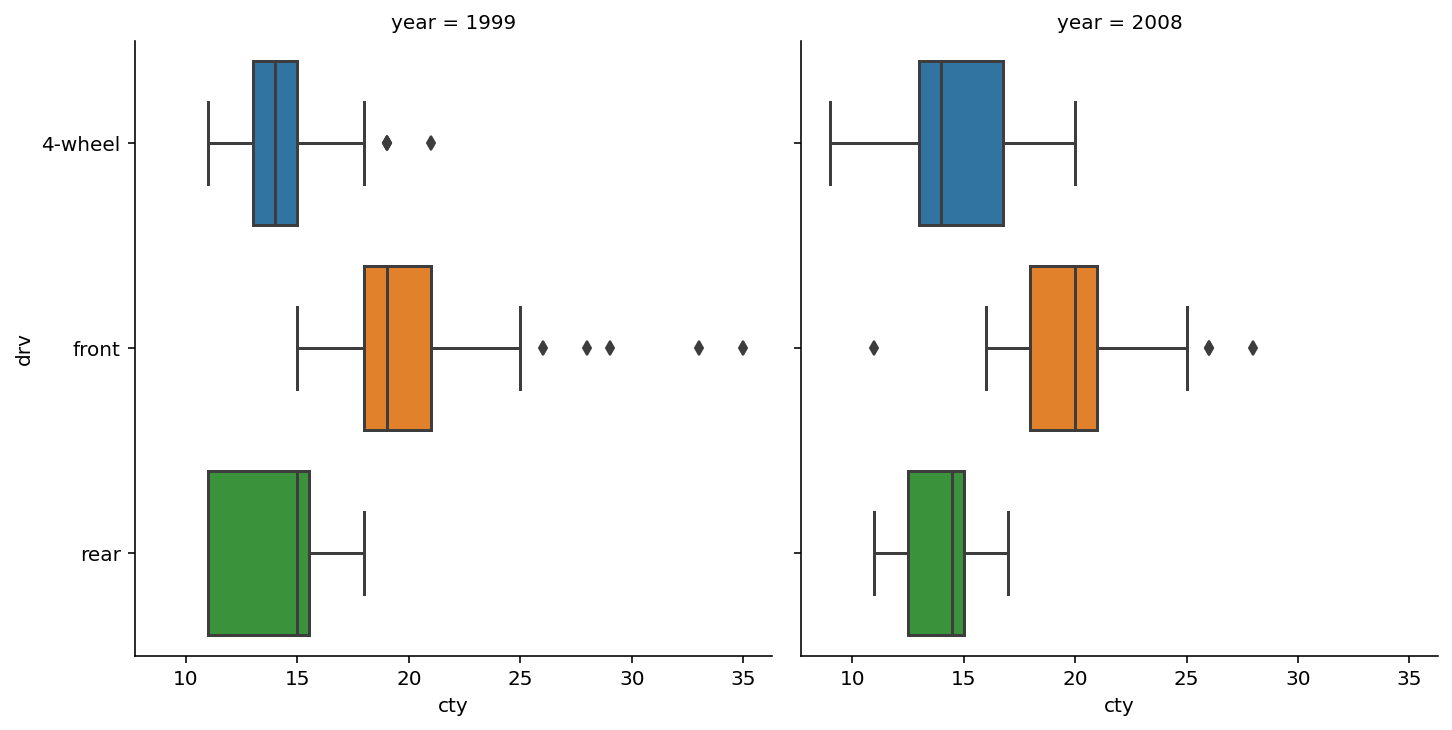

In [39]:
sns.catplot(y='drv', x='cty', data=df,
              kind='box',
              col='year');

# violinplot

<AxesSubplot:>

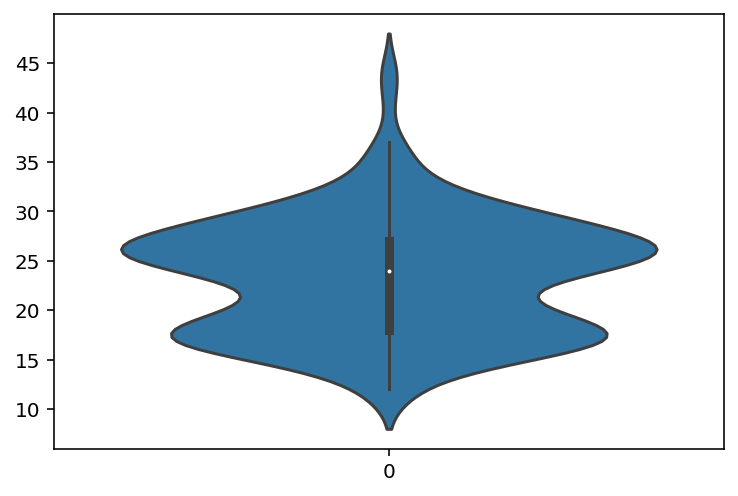

In [40]:
sns.violinplot(data=df['hwy'])

<AxesSubplot:>

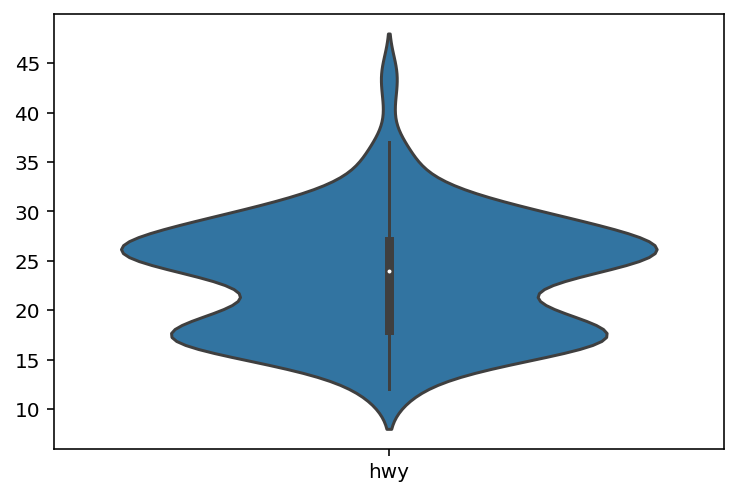

In [41]:
sns.violinplot(data=df[['hwy']])

<AxesSubplot:>

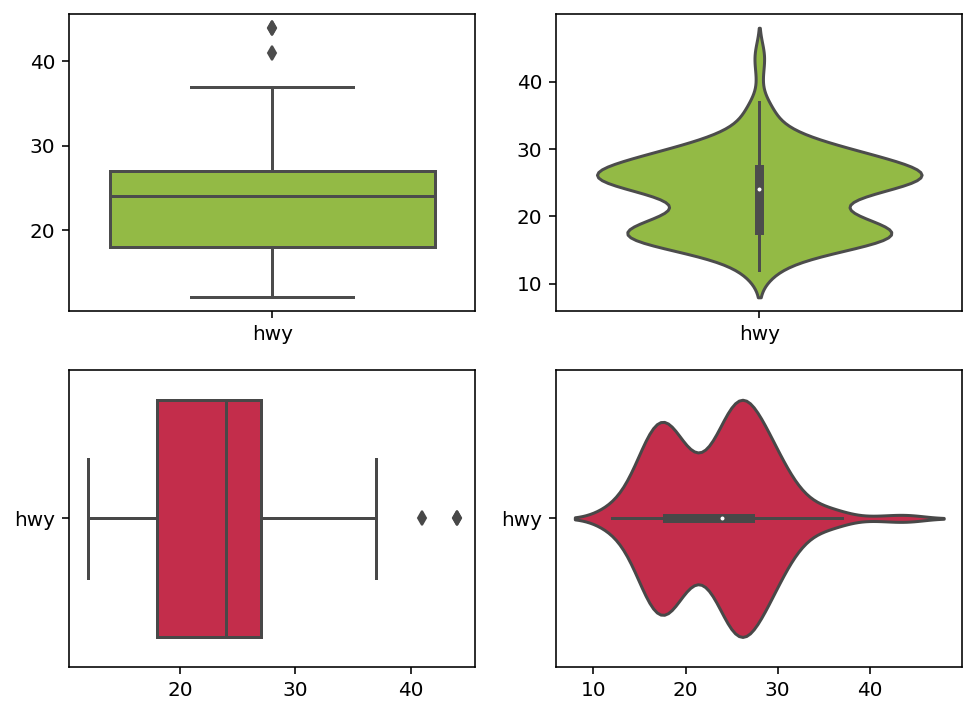

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(8,6))
#print(ax.shape)
sns.boxplot(data=df[['hwy']], orient='v', color='yellowgreen', ax=ax[0, 0])
sns.violinplot(data=df[['hwy']], orient='v', color='yellowgreen', ax=ax[0, 1])
sns.boxplot(data=df[['hwy']], orient='h', color='crimson', ax=ax[1, 0])
sns.violinplot(data=df[['hwy']], orient='h', color='crimson', ax=ax[1, 1])

C:\Users\61307\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hwy', ylabel='Density'>

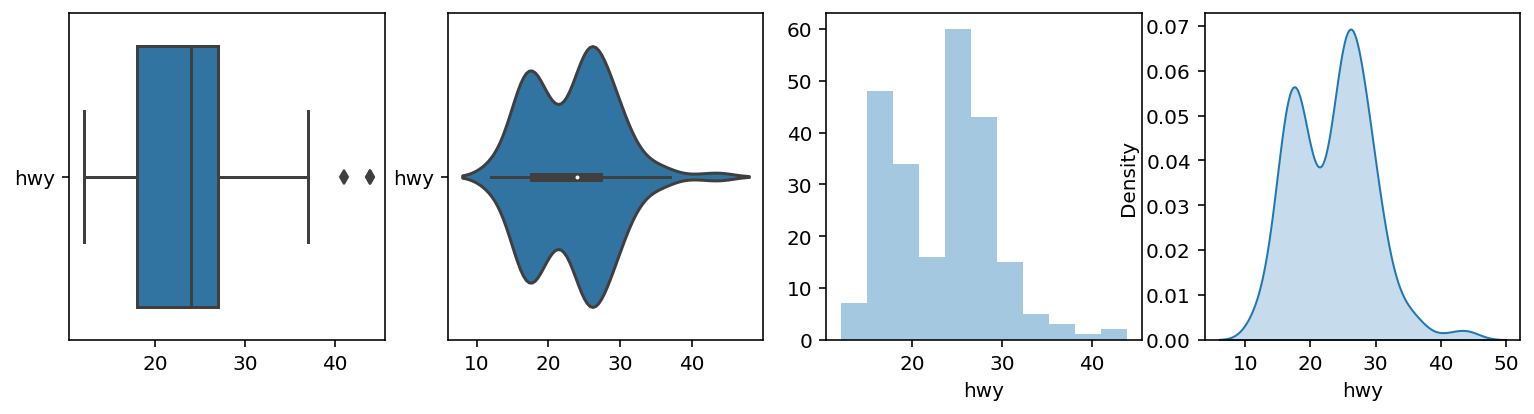

In [43]:
fig, ax = plt.subplots(1, 4, figsize=(13,3))
#print(ax.shape)
sns.boxplot(data=df[['hwy']], orient='h', ax=ax[0])
sns.violinplot(data=df[['hwy']], orient='h', ax=ax[1])
sns.distplot(df['hwy'], kde=False, ax=ax[2])
sns.kdeplot(df['hwy'], shade=True, ax=ax[3])

(2, 2)


C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

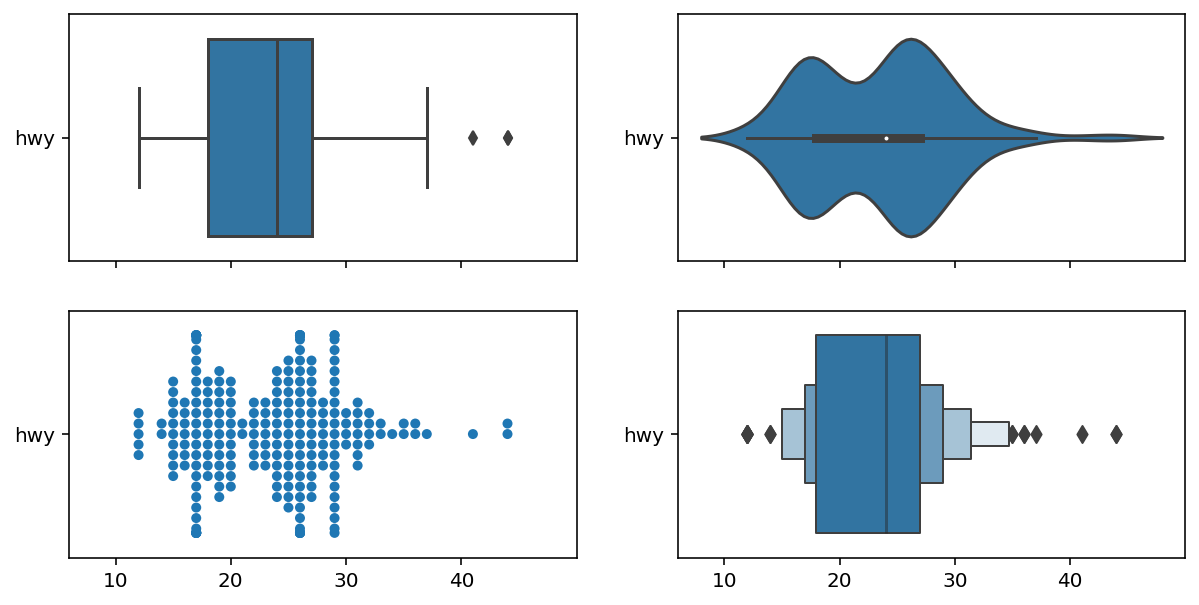

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(10,5), sharex=True)
print(ax.shape)
sns.boxplot(data=df[['hwy']], orient='h', ax=ax[0, 0])
sns.violinplot(data=df[['hwy']], orient='h', ax=ax[0, 1])
sns.swarmplot(data=df[['hwy']], orient='h', ax=ax[1, 0])
sns.boxenplot(data=df[['hwy']], orient='h', ax=ax[1, 1])

<AxesSubplot:>

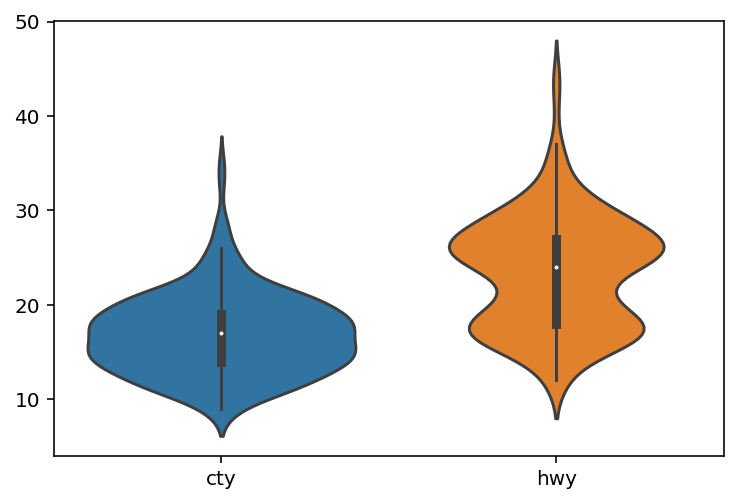

In [45]:
# plt.figure(figsize=(8,5))
sns.violinplot(data=df[['cty', 'hwy']])

## long format data (pass x and y)

In [46]:
df.head() #drv,ctyเป็น long format  drv(เป็นตัวเเบ่ง) cty(ค่า)

manufacturer model  displ  year  cyl       trans    drv  cty  hwy fl  \
0         audi    a4    1.8  1999    4    auto(l5)  front   18   29  p   
1         audi    a4    1.8  1999    4  manual(m5)  front   21   29  p   
2         audi    a4    2.0  2008    4  manual(m6)  front   20   31  p   
3         audi    a4    2.0  2008    4    auto(av)  front   21   30  p   
4         audi    a4    2.8  1999    6    auto(l5)  front   16   26  p   

     class    gear  
0  compact    auto  
1  compact  manual  
2  compact  manual  
3  compact    auto  
4  compact    auto

<AxesSubplot:xlabel='drv', ylabel='cty'>

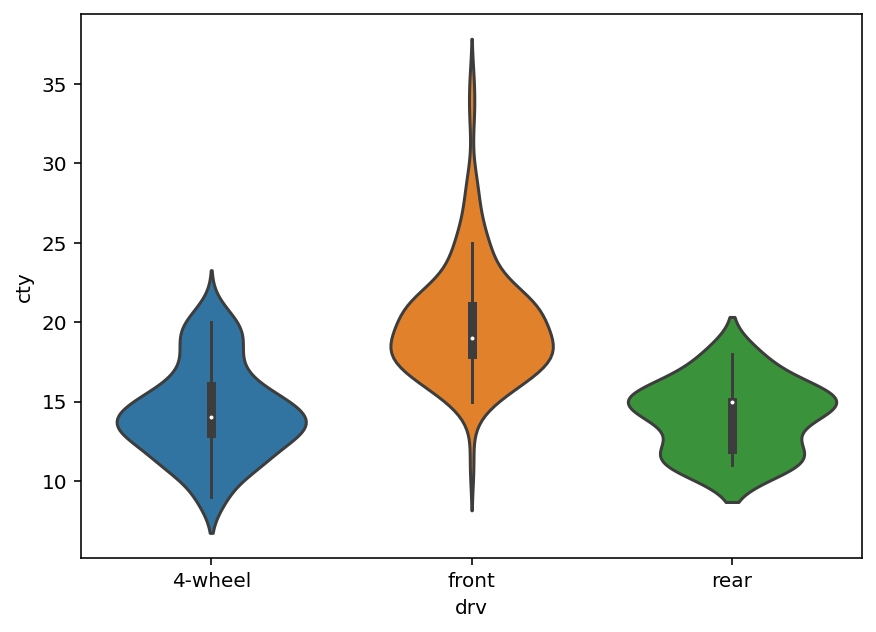

In [47]:
plt.figure(figsize=(7,5))
sns.violinplot(x='drv', y='cty', data=df)

(3,)


<AxesSubplot:xlabel='drv', ylabel='cty'>

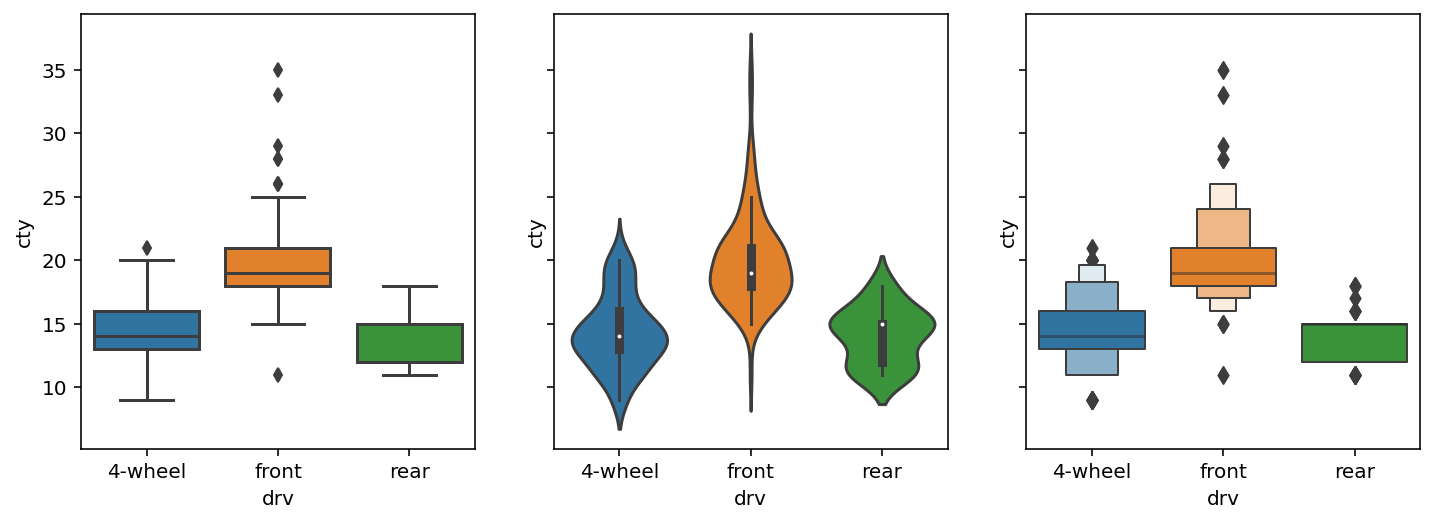

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(12,4), sharey=True, sharex=True)
print(ax.shape)
x_col='drv'
y_col='cty'
sns.boxplot(x=x_col, y=y_col, data=df, ax=ax[0])
sns.violinplot(x=x_col, y=y_col, data=df, ax=ax[1])
sns.boxenplot(x=x_col, y=y_col, data=df, ax=ax[2])

Text(0.5, 1.0, 'miles per gallon by driving system')

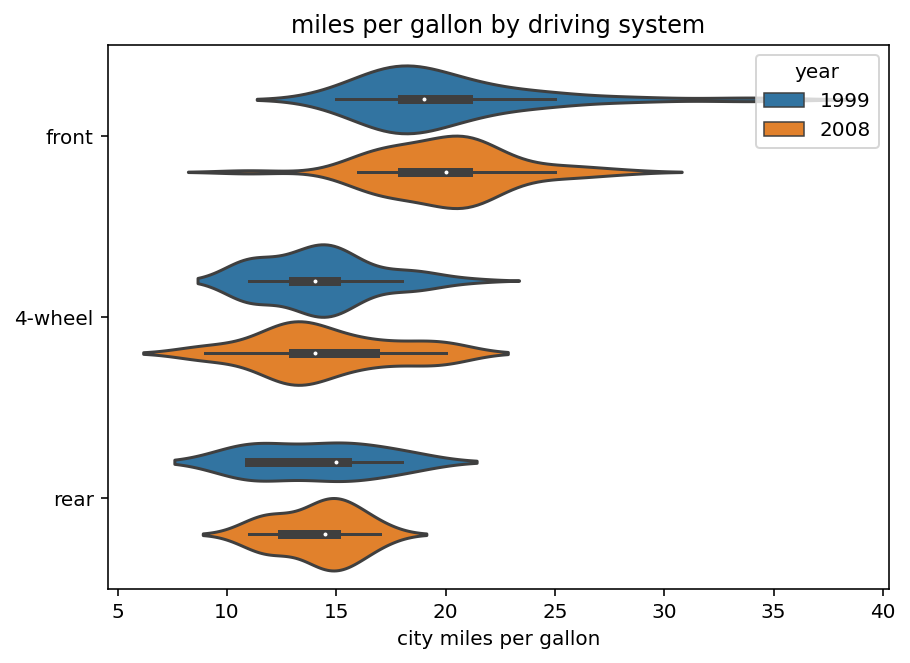

In [49]:
plt.figure(figsize=(7, 5))
sns.violinplot(y='drv', x='cty', data=df,
            hue='year',
            order=['front', '4-wheel', 'rear'])
plt.ylabel('')
plt.xlabel('city miles per gallon')
plt.title('miles per gallon by driving system')

Text(0.5, 1.0, 'miles per gallon by driving system')

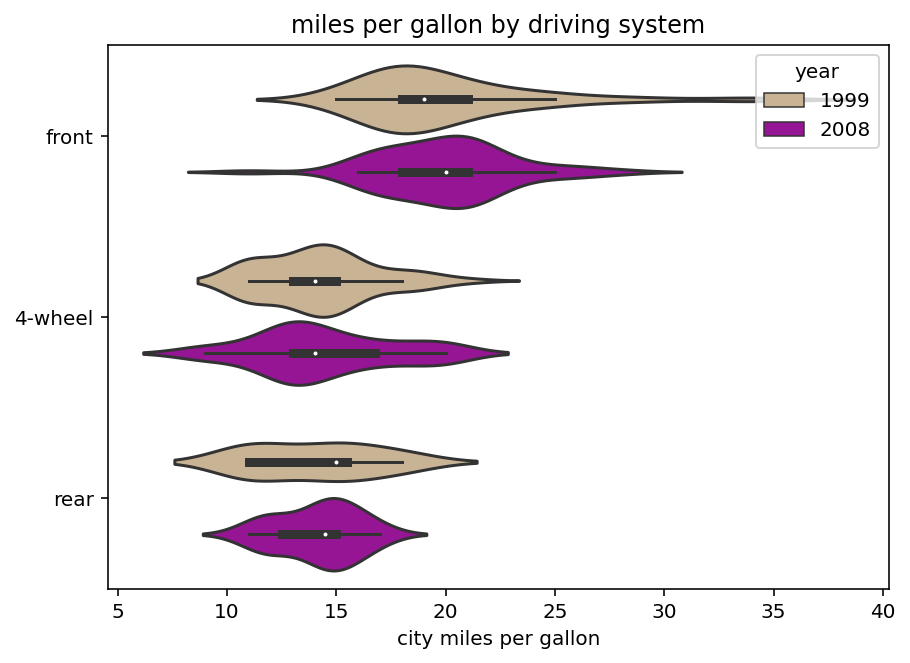

In [50]:
plt.figure(figsize=(7, 5))
sns.violinplot(y='drv', x='cty', data=df,
            hue='year',
#             palette='Set2',
#             palette='muted',
             palette=['tan', '#aa00aa'],
#            palette={1999:'tan', 2008:'yellowgreen'},
            order=['front', '4-wheel', 'rear'])
plt.ylabel('')
plt.xlabel('city miles per gallon')
plt.title('miles per gallon by driving system')

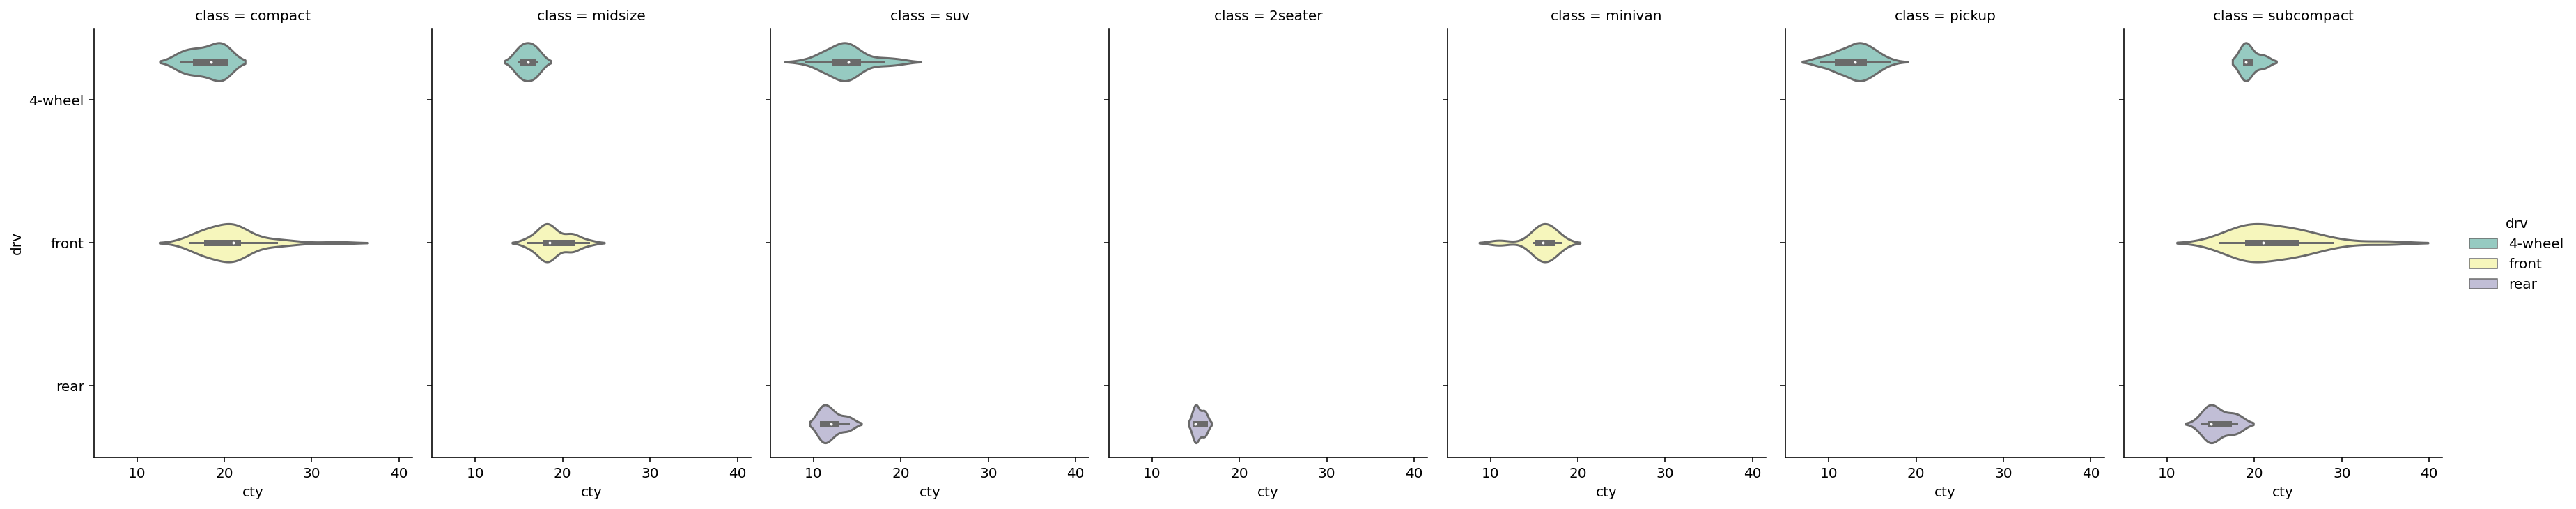

In [51]:
sns.catplot(y='drv', x='cty', data=df,
               hue='drv',
               kind='violin',
               col='class',
               palette='Set3',
               height=5, aspect=.7)

In [52]:
df['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [53]:
dg=df[df['class'].str.match('^(suv|compact|pickup)')]
dg.sample(5)

manufacturer              model  displ  year  cyl       trans      drv  \
14          audi         a4 quattro    3.1  2008    6  manual(m6)  4-wheel   
205       toyota  toyota tacoma 4wd    4.0  2008    6  manual(m6)  4-wheel   
216   volkswagen              jetta    2.0  2008    4  manual(m6)    front   
9           audi         a4 quattro    2.0  2008    4  manual(m6)  4-wheel   
172       subaru        impreza awd    2.5  2008    4  manual(m5)  4-wheel   

     cty  hwy fl    class    gear  
14    15   25  p  compact  manual  
205   15   18  r   pickup  manual  
216   21   29  p  compact  manual  
9     20   28  p  compact  manual  
172   20   27  r  compact  manual

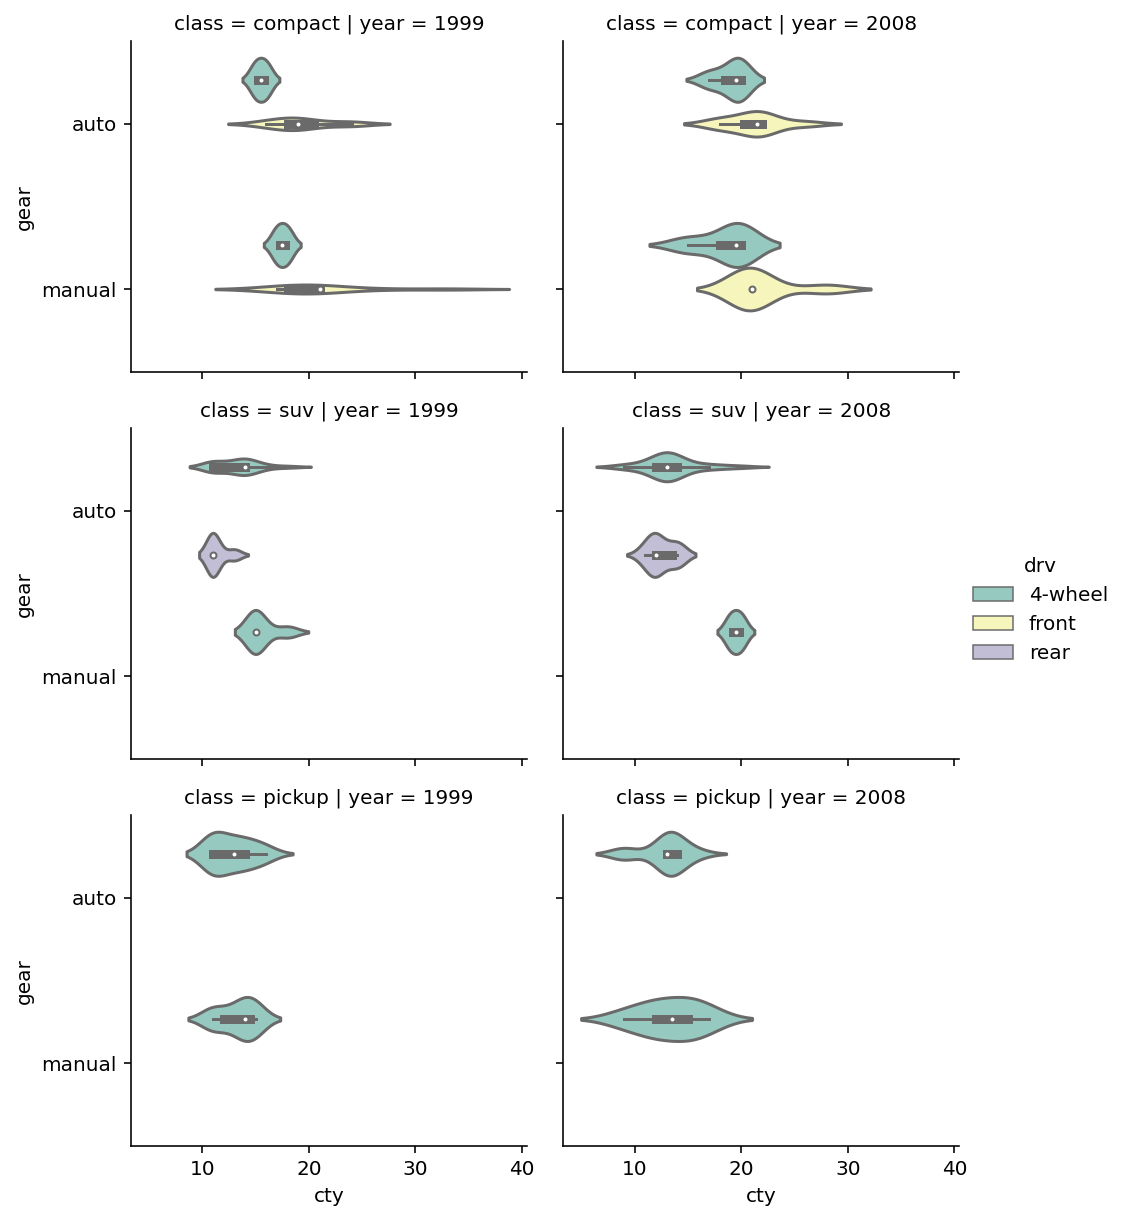

In [54]:
sns.catplot(y='gear', x='cty', data=dg,
               hue='drv',
               kind='violin',
               col='year',
               row='class',
               palette='Set3',
               height=2.8, aspect=1.2)

# boxenplot

<AxesSubplot:>

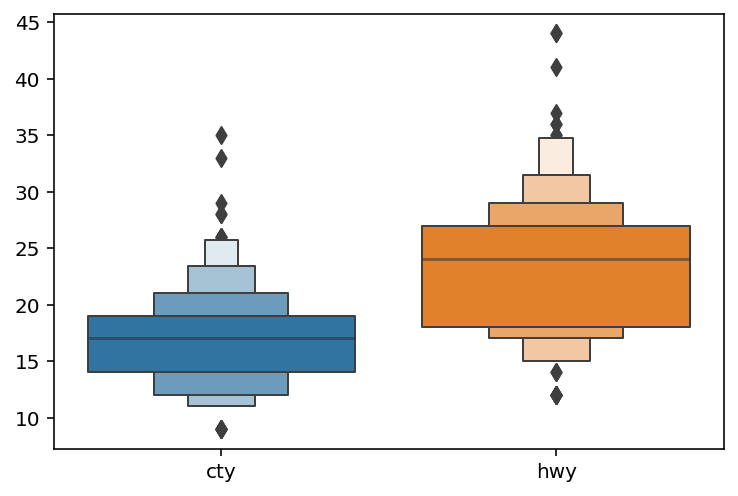

In [55]:
sns.boxenplot(data=df[['cty', 'hwy']])

<AxesSubplot:xlabel='drv', ylabel='cty'>

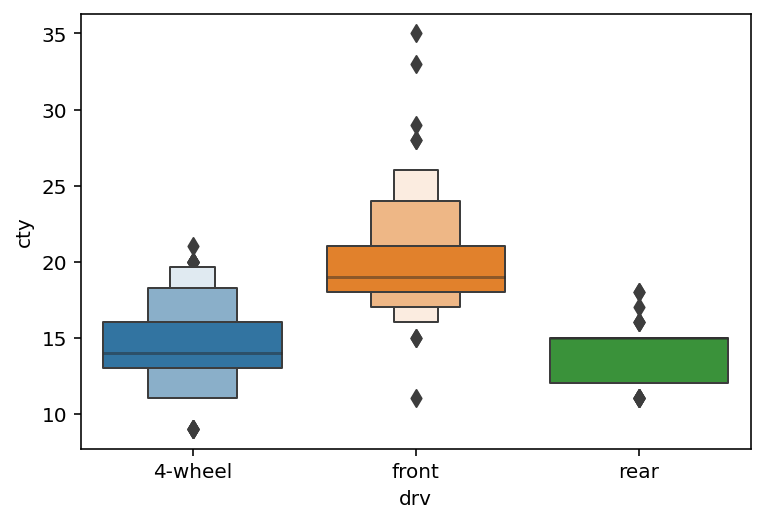

In [56]:
sns.boxenplot(x='drv', y='cty', data=df)

# barplot

<AxesSubplot:>

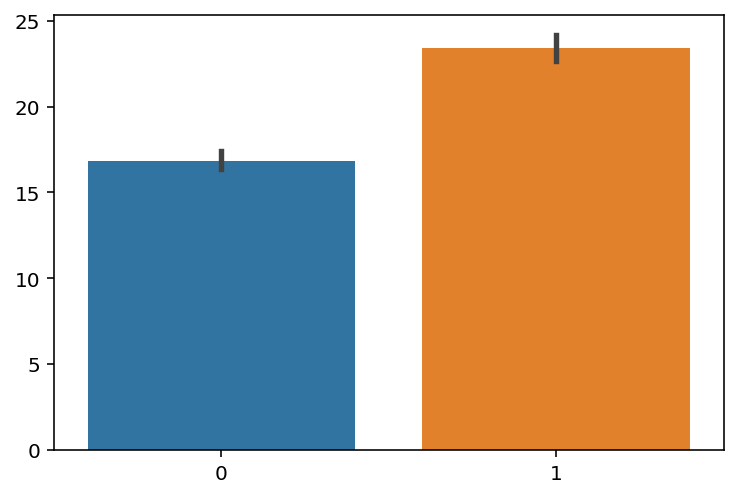

In [57]:
sns.barplot(data=[df.cty, df.hwy])
# notice: no x-axis label

<AxesSubplot:>

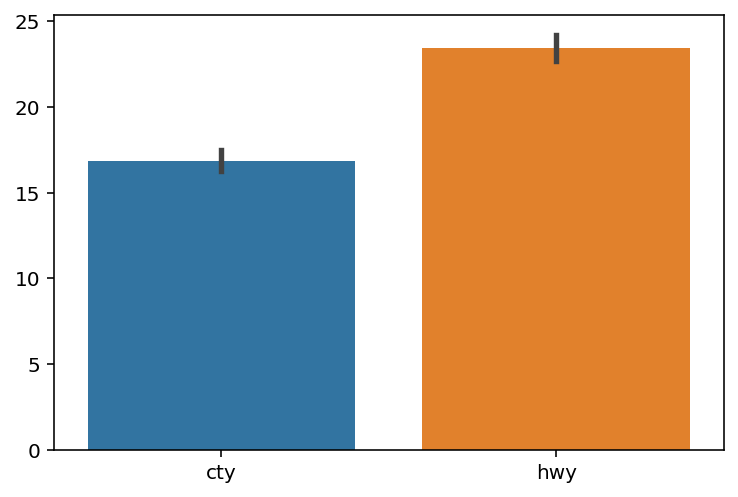

In [58]:
# wide format
sns.barplot(data=df[['cty', 'hwy']]) # with correct x-axis label

<AxesSubplot:>

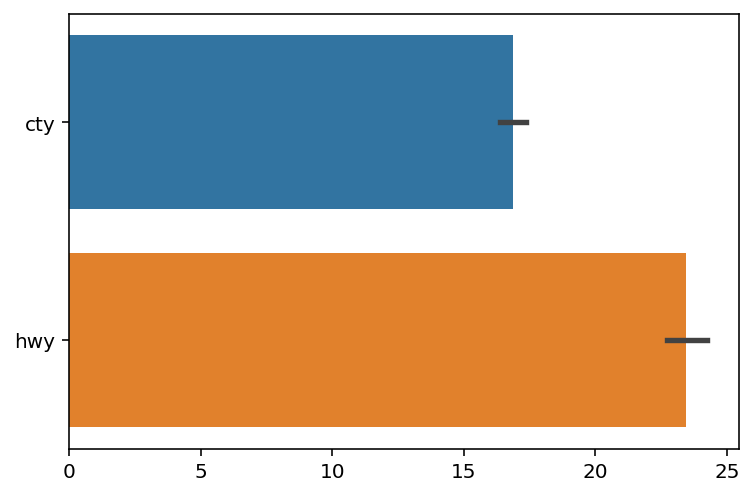

In [59]:
sns.barplot(data=df[['cty', 'hwy']], orient='h') # with correct x-axis label

## long format

<AxesSubplot:xlabel='cty'>

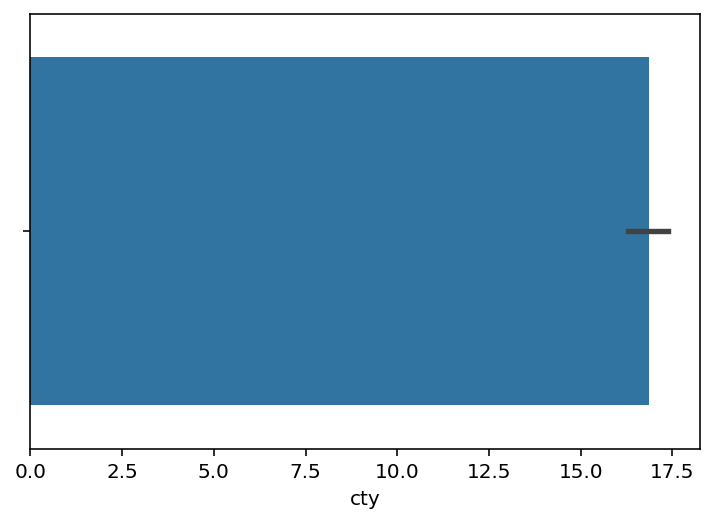

In [60]:
sns.barplot(x='cty', data=df)

<AxesSubplot:ylabel='cty'>

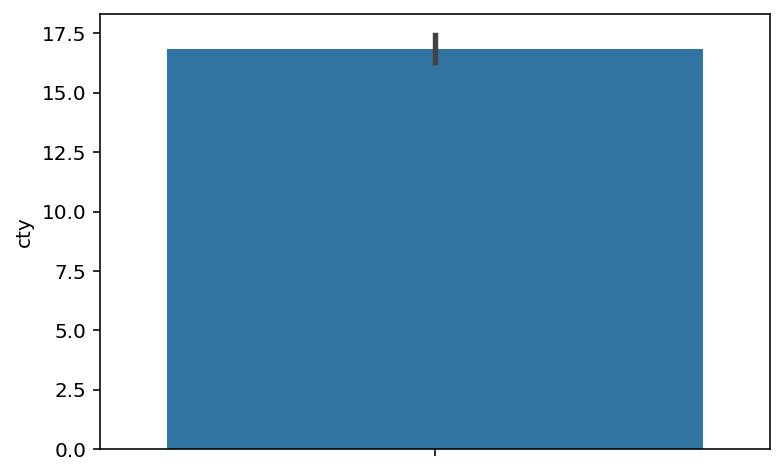

In [61]:
sns.barplot(y='cty', data=df)

<AxesSubplot:xlabel='gear', ylabel='cty'>

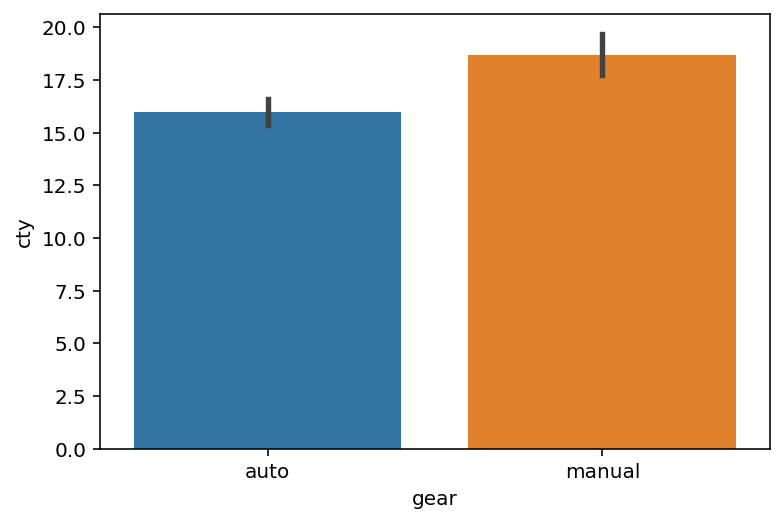

In [62]:
sns.barplot(x='gear', y='cty', data=df)

<AxesSubplot:xlabel='gear', ylabel='cty'>

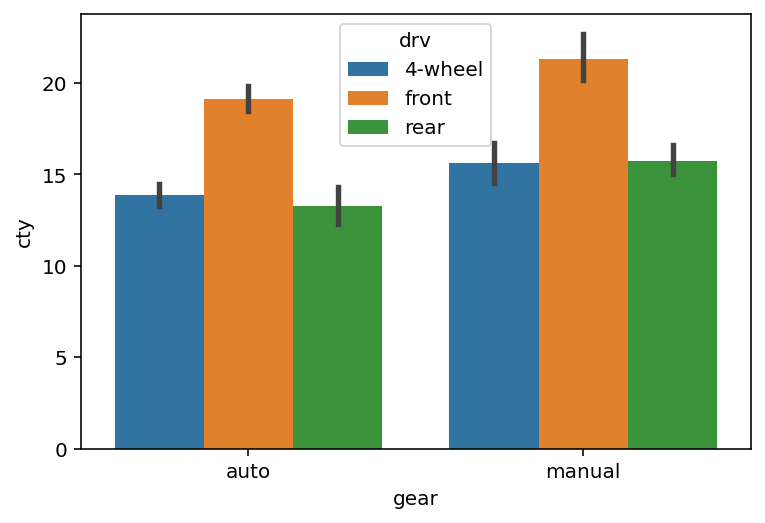

In [63]:
sns.barplot(x='gear', y='cty', data=df,
            hue='drv')

## set 'estimator'

In [64]:
df.groupby('drv')['cty'].describe()

count       mean       std   min   25%   50%   75%   max
drv                                                              
4-wheel  103.0  14.330097  2.874459   9.0  13.0  14.0  16.0  21.0
front    106.0  19.971698  3.626510  11.0  18.0  19.0  21.0  35.0
rear      25.0  14.080000  2.215852  11.0  12.0  15.0  15.0  18.0

<AxesSubplot:xlabel='drv', ylabel='cty'>

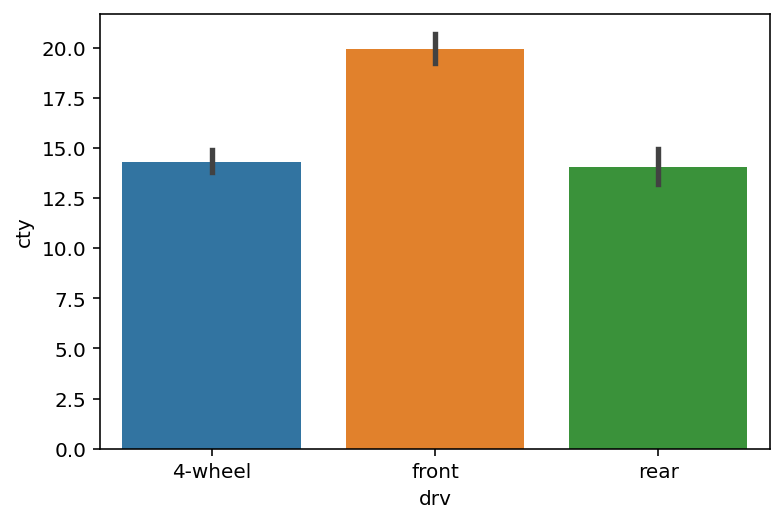

In [65]:
sns.barplot(x='drv', y='cty', data=df)

<AxesSubplot:xlabel='drv', ylabel='cty'>

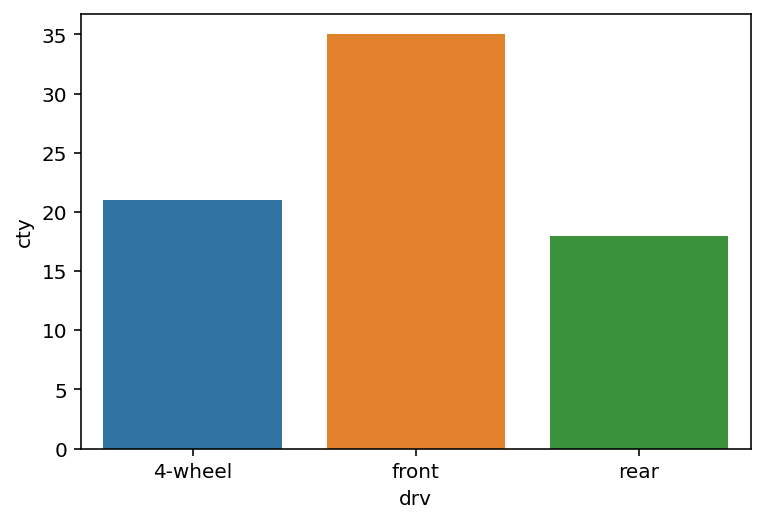

In [66]:
sns.barplot(x='drv', y='cty', data=df,
            estimator=max,
            ci=None)

<AxesSubplot:xlabel='drv', ylabel='cty'>

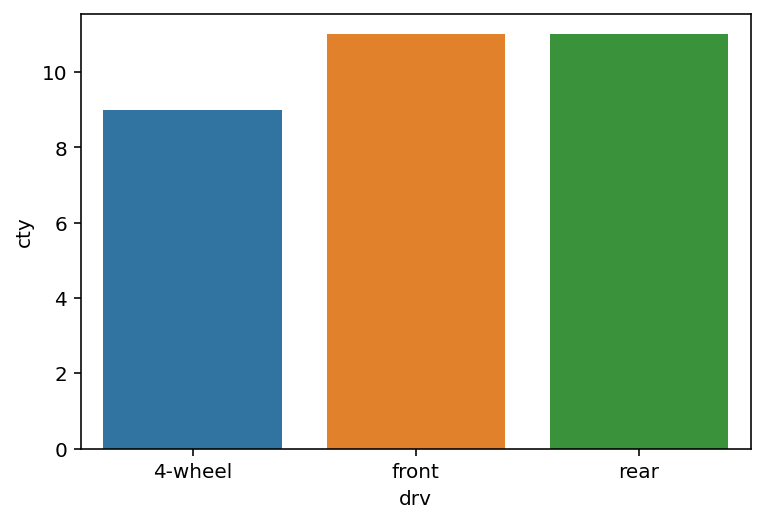

In [67]:
sns.barplot(x='drv', y='cty', data=df,
            estimator=min,
            ci=None)

In [68]:
import numpy as np

<AxesSubplot:xlabel='drv', ylabel='cty'>

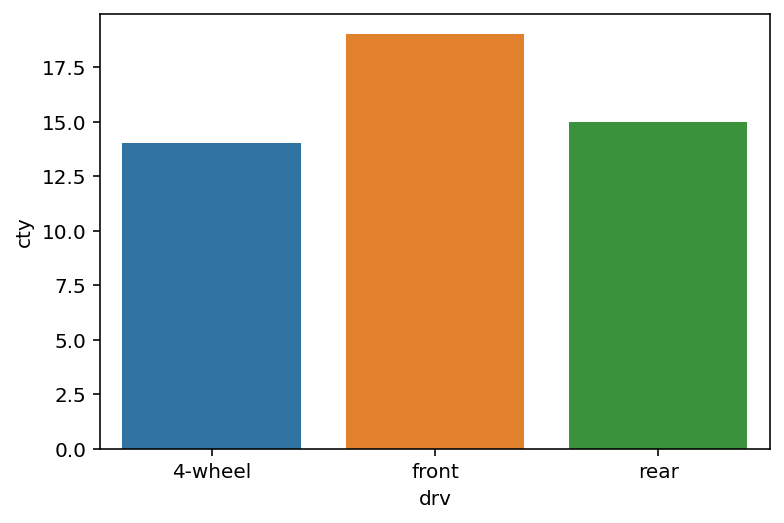

In [69]:
sns.barplot(x='drv', y='cty', data=df,
            estimator=np.median,
            ci=None)

## add an average line

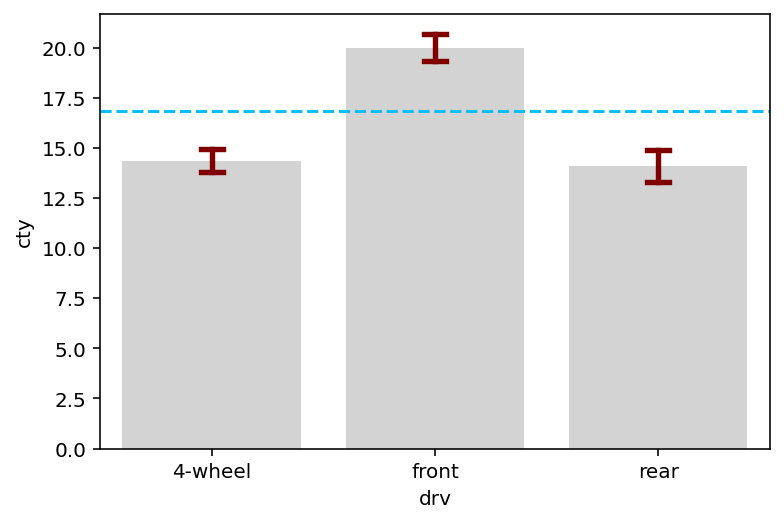

In [70]:
avg=df.cty.mean()
sns.barplot(x='drv', y='cty', data=df, 
            color='lightgray', 
            errcolor='maroon', capsize=.1)
plt.axhline(y=avg, color='deepskyblue', linestyle='--')

## custom order and errorbar (ex. sd)

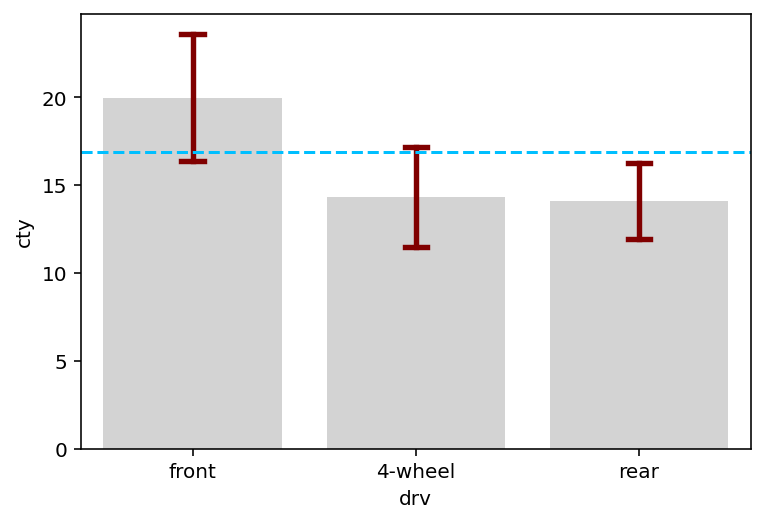

In [71]:
avg=df.cty.mean()
sns.barplot(x='drv', y='cty', data=df, 
            color='lightgray', 
            ci='sd',
            errcolor='maroon', capsize=.1,
            order=['front', '4-wheel', 'rear'])
plt.axhline(y=avg, color='deepskyblue', linestyle='--')

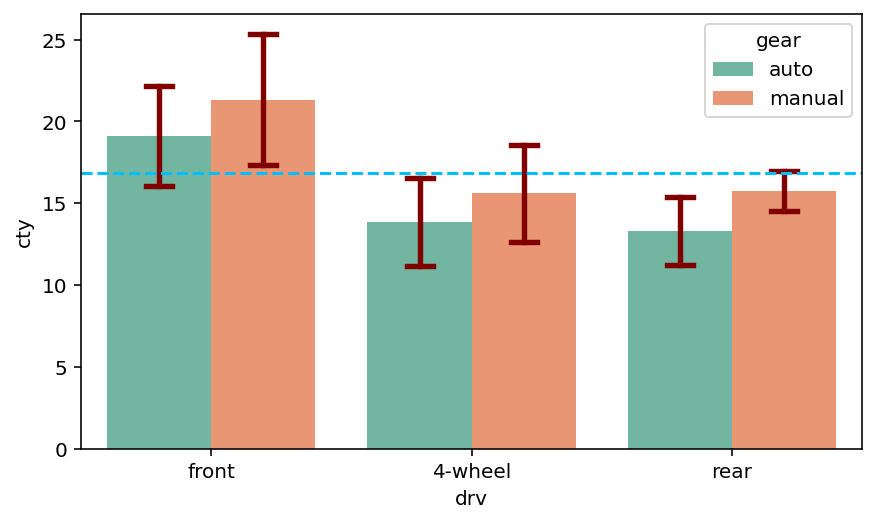

In [72]:
avg=df.cty.mean()
plt.figure(figsize=(7,4))
sns.barplot(x='drv', y='cty', data=df, 
            hue='gear',
            palette='Set2', 
            ci='sd',
            errcolor='maroon', capsize=.1,
            order=['front', '4-wheel', 'rear'],
       )
plt.axhline(y=avg, color='deepskyblue', linestyle='--')
# plt.savefig('bar2.png', dpi=150)
# plt.savefig('bar_a4.pdf', papertype='a4')
# plt.savefig('bar.svg')

<AxesSubplot:xlabel='drv', ylabel='cty'>

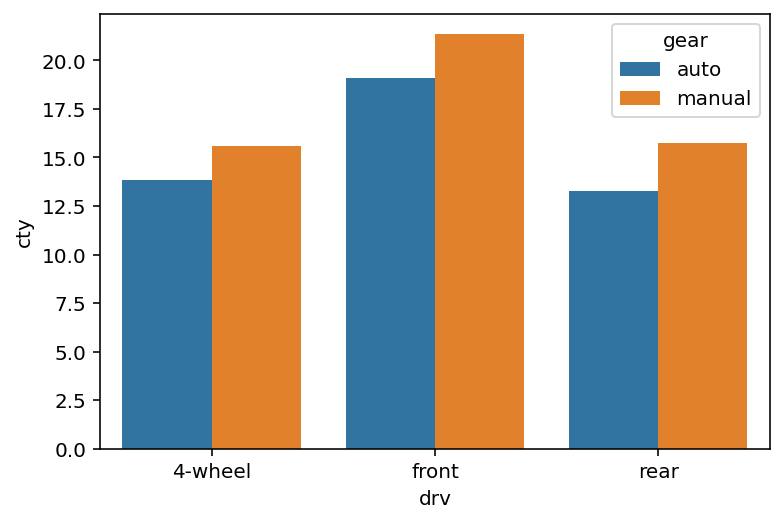

In [73]:
sns.barplot(x='drv', y='cty', data=df,
            hue='gear', ci=None)

## palette

Text(0.5, 1.0, 'fuel efficiency by drive wheels')

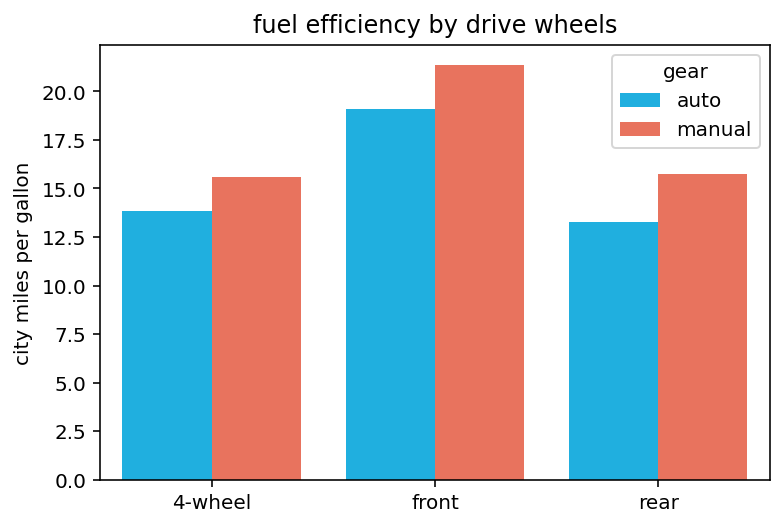

In [74]:
sns.barplot(x='drv', y='cty', data=df,
            hue='gear', 
            ci=None,
            palette=['deepskyblue', 'tomato'])
plt.xlabel('')
plt.ylabel('city miles per gallon')
plt.title('fuel efficiency by drive wheels')

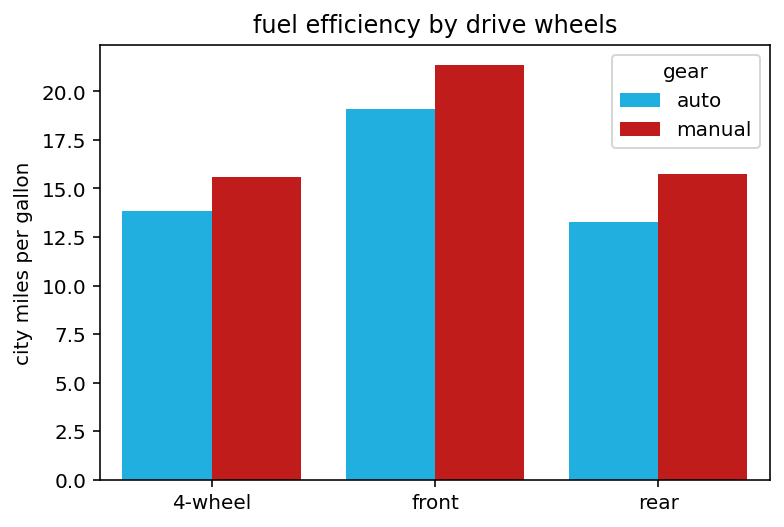

In [75]:
sns.barplot(x='drv', y='cty', data=df,
            hue='gear', 
            ci=None,
            palette={'auto':'deepskyblue', 'manual':'#dd0000'})
plt.xlabel('')
plt.ylabel('city miles per gallon')
plt.title('fuel efficiency by drive wheels');

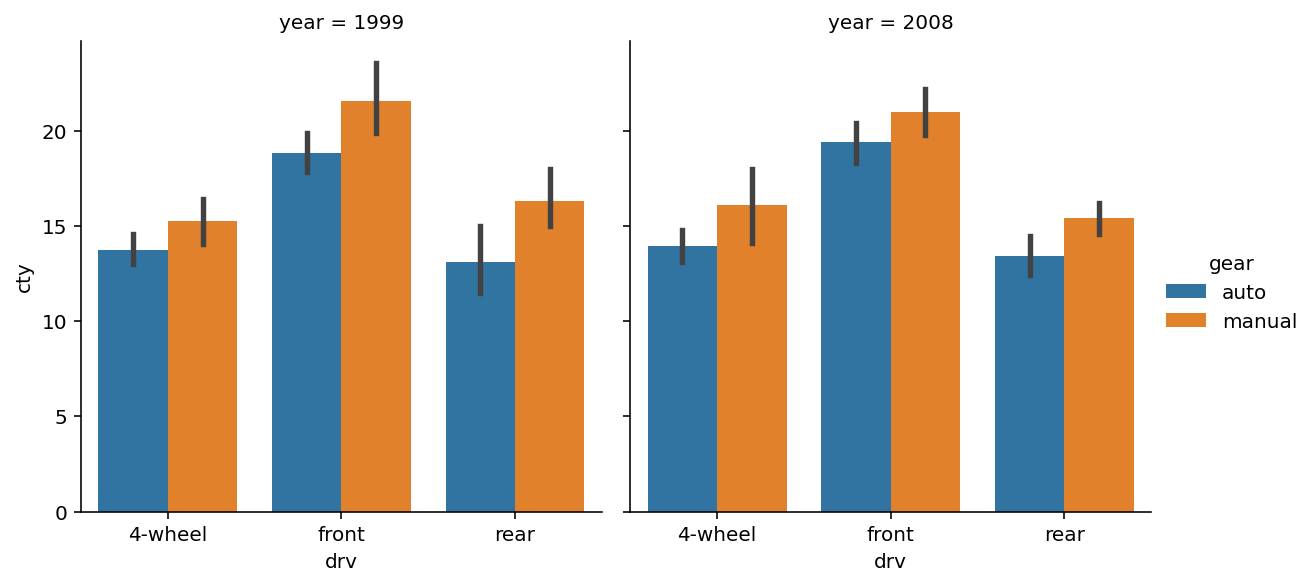

In [76]:
sns.catplot(x='drv', y='cty', data=df,
               hue="gear", 
               col="year",
               kind="bar",
               height=4, aspect=1);

In [77]:
df[df['class'].str.match('compact|suv|midsize')].sample(frac=.05)

manufacturer           model  displ  year  cyl       trans      drv  cty  \
233   volkswagen          passat    3.6  2008    6    auto(s6)    front   17   
133   land rover     range rover    4.6  1999    8    auto(l4)  4-wheel   11   
152       nissan  pathfinder 4wd    4.0  2008    6    auto(l5)  4-wheel   14   
169       subaru     impreza awd    2.5  2008    4    auto(s4)  4-wheel   20   
158      pontiac      grand prix    5.3  2008    8    auto(s4)    front   16   
136      lincoln   navigator 2wd    5.4  2008    8    auto(l6)     rear   12   
14          audi      a4 quattro    3.1  2008    6  manual(m6)  4-wheel   15   
187       toyota    camry solara    2.2  1999    4  manual(m5)    front   21   

     hwy fl    class    gear  
233   26  p  midsize    auto  
133   15  p      suv    auto  
152   20  p      suv    auto  
169   25  p  compact    auto  
158   25  p  midsize    auto  
136   18  r      suv    auto  
14    25  p  compact  manual  
187   29  r  compact  manual

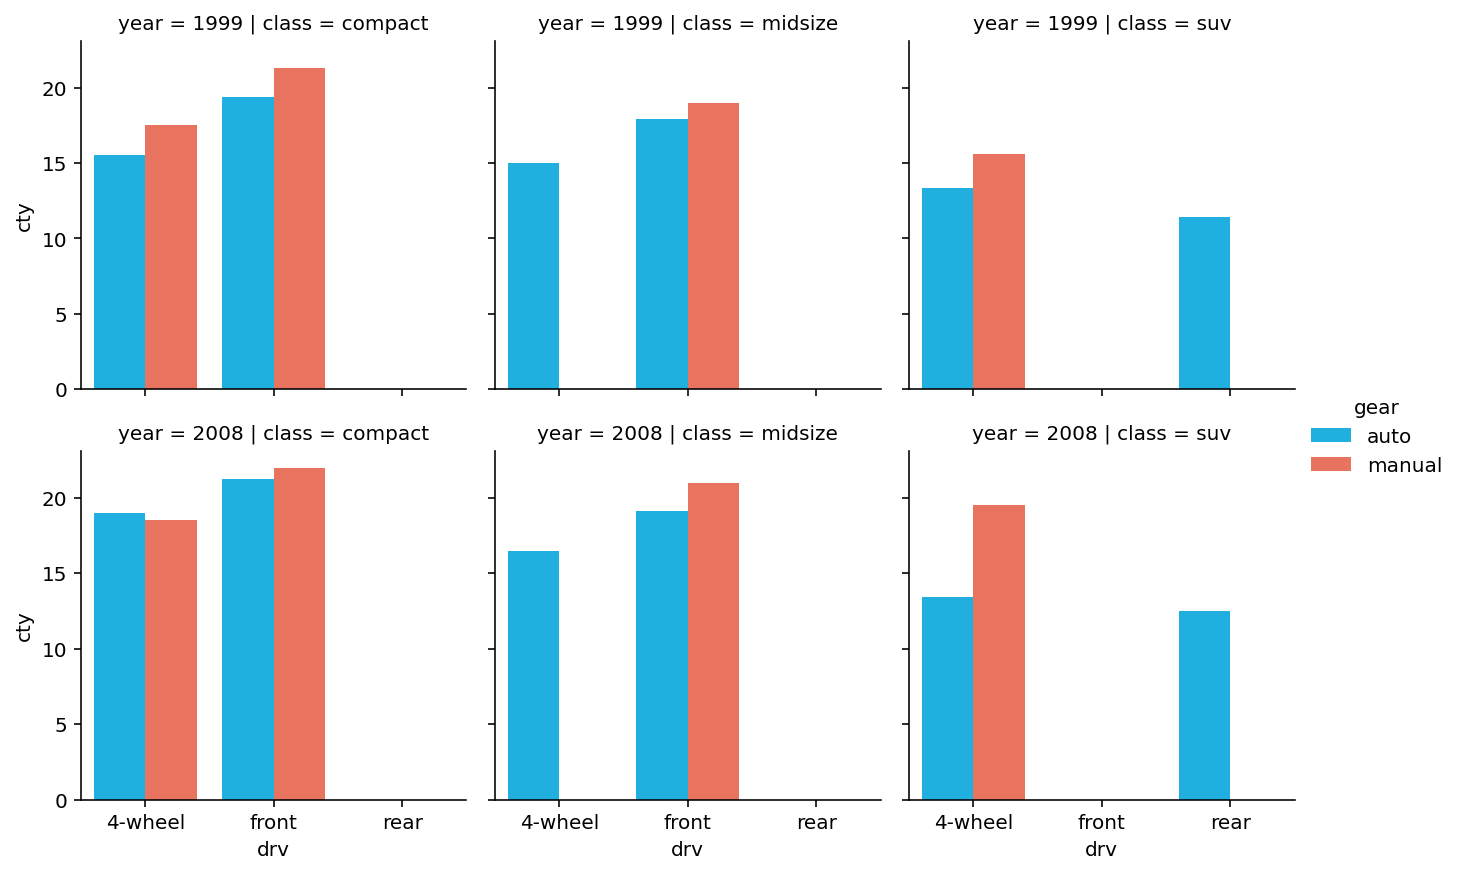

In [78]:
sns.catplot(x='drv', y='cty', data=df[df['class'].str.match('compact|suv|midsize')],
               hue='gear', 
               row='year',
               col='class',
               kind='bar',
               ci=None,
               palette=['deepskyblue', 'tomato'],
               height=3, aspect=1);

# สร้างกราฟจาก pandas.Series

In [79]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/Videogame/videogame_clean.csv')
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_Score  User_Count Developer Rating Platform_type  \
0          51.0        80.0       322.0  Nintendo      E       console   
1           NaN         NaN         NaN       NaN    NaN       console   
2          73.0        83.0       709.0  Nintendo      E       console   
3          73.0        80.0       192.0  Nintendo      E       console   
4           NaN         NaN         NaN       NaN    NaN      handheld   

     User_Rate  Critic_Rate  
0        great        great  
1          NaN          NaN  
2  outstanding  outstanding  
3        great        great  
4          NaN          NaN

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
 16  Platform_type    16719 non-null  object 
 17  User_Rate   

<AxesSubplot:xlabel='count', ylabel='Platform'>

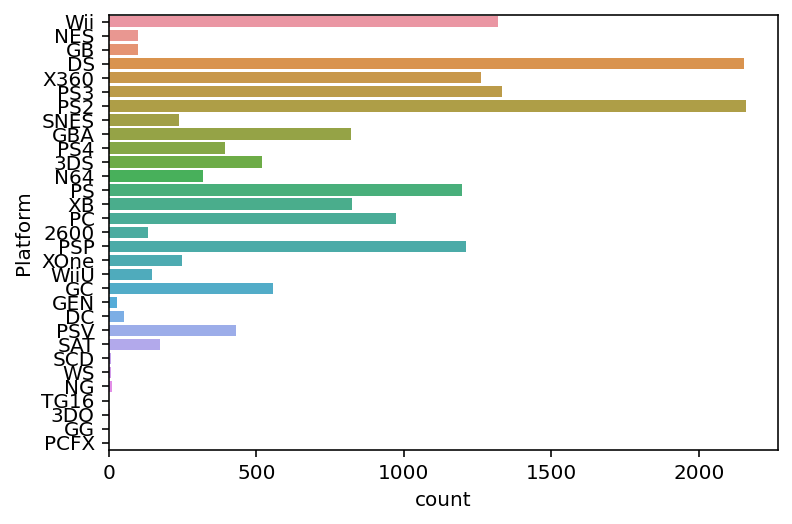

In [81]:
sns.countplot(y=df.Platform, data=df)

In [82]:
df.groupby('Platform').count()

Name  Year_of_Release  Genre  Publisher  NA_Sales  EU_Sales  \
Platform                                                                
2600       133              116    133        133       133       133   
3DO          3                3      3          3         3         3   
3DS        520              512    520        519       520       520   
DC          52               52     52         52        52        52   
DS        2152             2122   2152       2147      2152      2152   
GB          98               97     98         98        98        98   
GBA        822              811    822        796       822       822   
GC         556              542    556        556       556       556   
GEN         27               29     27         29        29        29   
GG           1                1      1          1         1         1   
N64        319              316    319        319       319       319   
NES         98               98     98         98        98        98   
NG          12               12     12         12        12        12   
PC         974              957    974        968       974       974   
PCFX         1                1      1          1         1         1   
PS        1197             1190   1197       1194      1197      1197   
PS2       2161             2127   2161       2159      2161      2161   
PS3       1331             1306   1331       1328      1331      1331   
PS4        393              393    393        393       393       393   
PSP       1209             1193   1209       1207      1209      1209   
PSV        432              431    432        430       432       432   
SAT        173              173    173        173       173       173   
SCD          6                6      6          6         6         6   
SNES       239              239    239        239       239       239   
TG16         2                2      2          2         2         2   
WS           6                6      6          6         6         6   
Wii       1320             1286   1320       1319      1320      1320   
WiiU       147              147    147        147       147       147   
X360      1262             1232   1262       1259      1262      1262   
XB         824              803    824        824       824       824   
XOne       247              247    247        247       247       247   

          JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
Platform                                                                    
2600           133          133           133             0             0   
3DO              3            3             3             0             0   
3DS            520          520           520           168           168   
DC              52           52            52            14            14   
DS            2152         2152          2152           717           717   
GB              98           98            98             0             0   
GBA            822          822           822           438           438   
GC             556          556           556           448           448   
GEN             29           29            29             0             0   
GG               1            1             1             0             0   
N64            319          319           319             0             0   
NES             98           98            98             0             0   
NG              12           12            12             0             0   
PC             974          974           974           715           715   
PCFX             1            1             1             0             0   
PS            1197         1197          1197           200           200   
PS2           2161         2161          2161          1298          1298   
PS3           1331         1331          1331           820           820   
PS4            393          393           393           252 

In [83]:
df.groupby('Platform')['Platform'].count()

Platform
2600     133
3DO        3
3DS      520
DC        52
DS      2152
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      393
PSP     1209
PSV      432
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: Platform, dtype: int64

In [84]:
s1=df.groupby('Platform')['Platform'].count().nlargest(5)
s1

Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
Name: Platform, dtype: int64

In [85]:
s1.index

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360'], dtype='object', name='Platform')

In [86]:
s1.values

array([2161, 2152, 1331, 1320, 1262], dtype=int64)

Text(0, 0.5, '# of games')

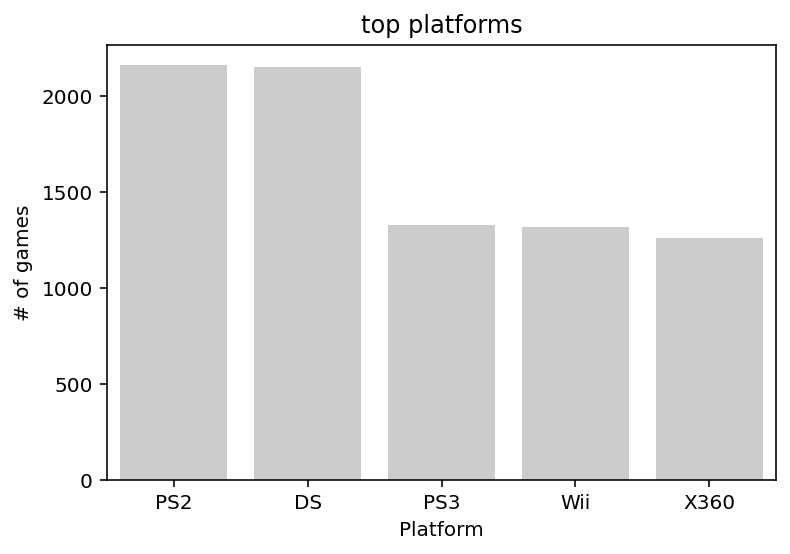

In [87]:
sns.barplot(x=s1.index, y=s1.values, color='.8')
plt.title('top platforms')
plt.ylabel('# of games')

# pointplot

In [88]:
url='https://github.com/prasertcbs/tutorial/raw/master/weightloss.csv'
dat=pd.read_csv(url)
dat.sample(7)

obs    group  wl1  wl2  wl3  se1  se2  se3
15   16     Diet    6    4    2   16   15   18
4     5  Control    5    3    2   16   15   14
5     6  Control    6    5    4   17   18   18
2     3  Control    4    3    1   17   12   16
33   34   DietEx    8    6    1   17   17   17
7     8  Control    5    4    1   13   15   15
0     1  Control    4    3    3   14   13   15

## wide format

In [89]:
#can not use point polot so convert wide format to long format first

<AxesSubplot:>

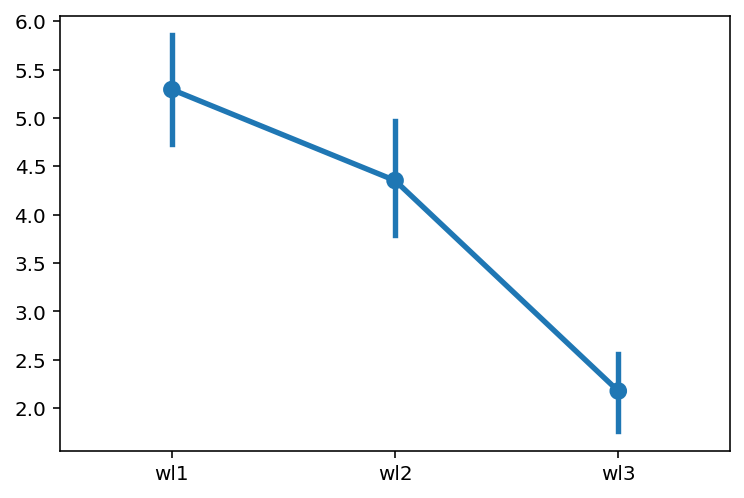

In [90]:
sns.pointplot(data=dat[['wl1', 'wl2', 'wl3']])

## convert wide to long format

In [91]:
#melt ออกมาเเยกเป็นเเต่ละเดือน เอา col to val
df=dat.melt(id_vars=['obs', 'group'], 
            value_vars=['wl1', 'wl2', 'wl3'], 
            var_name='month', 
            value_name='loss')
df.head(4)

obs    group month  loss
0    1  Control   wl1     4
1    2  Control   wl1     4
2    3  Control   wl1     4
3    4  Control   wl1     3

In [307]:
df.sort_values('obs')

KeyError: 'obs'

In [93]:
df['month']=df.month.str.replace('\D', '').astype('int')
df.head()

<ipython-input-93-d155b6be3514>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['month']=df.month.str.replace('\D', '').astype('int')


obs    group  month  loss
0    1  Control      1     4
1    2  Control      1     4
2    3  Control      1     4
3    4  Control      1     3
4    5  Control      1     5

# pointplot

<AxesSubplot:xlabel='group', ylabel='loss'>

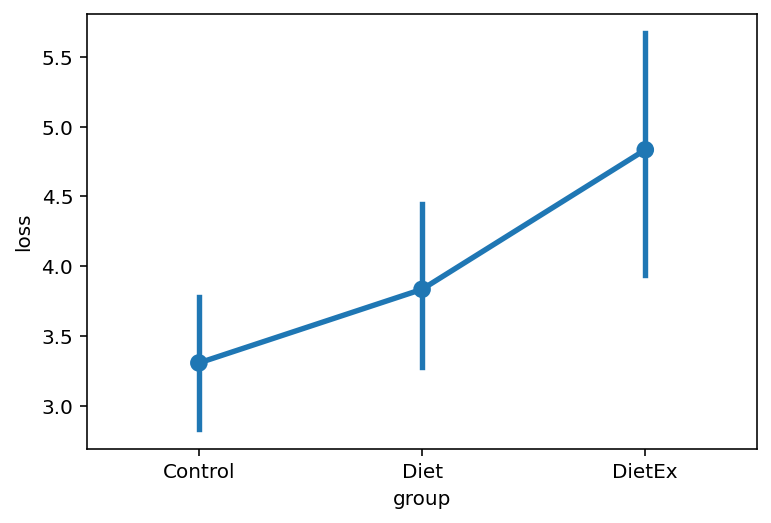

In [94]:
sns.pointplot(x='group', y='loss', data=df)

In [95]:
df.groupby('group')['loss'].mean()

group
Control    3.305556
Diet       3.833333
DietEx     4.833333
Name: loss, dtype: float64

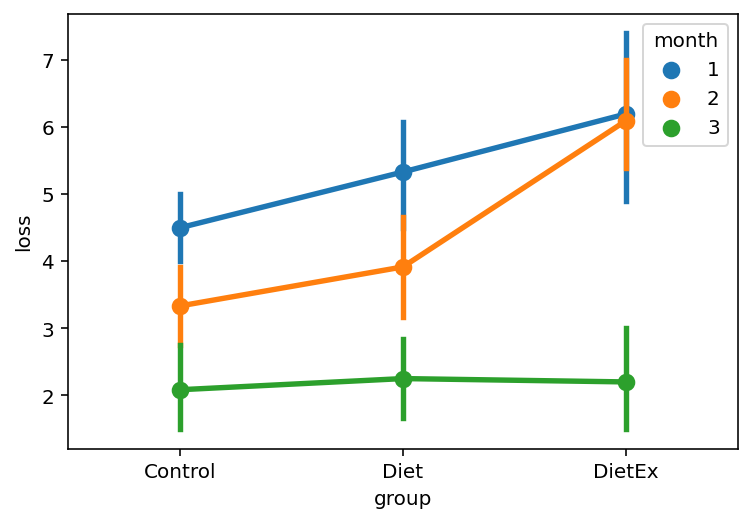

In [96]:
sns.pointplot(x='group', y='loss', data=df, hue='month');

In [97]:
df.groupby(['group', 'month'])['loss'].mean()

group    month
Control  1        4.500000
         2        3.333333
         3        2.083333
Diet     1        5.333333
         2        3.916667
         3        2.250000
DietEx   1        6.200000
         2        6.100000
         3        2.200000
Name: loss, dtype: float64

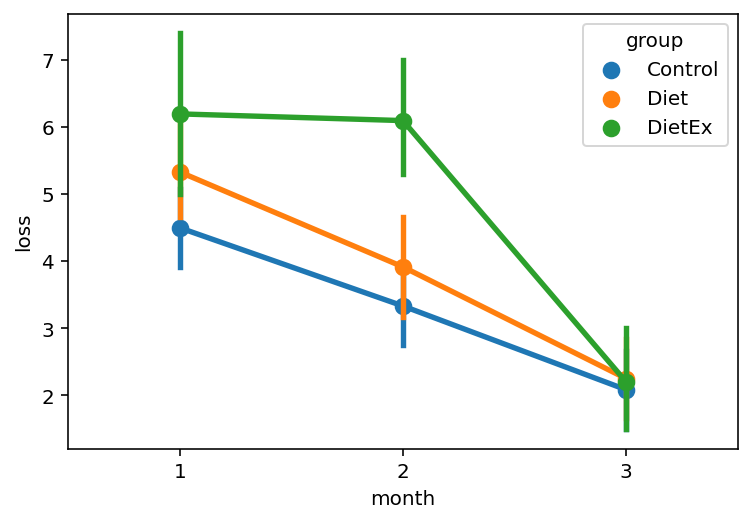

In [98]:
sns.pointplot(x='month', y='loss', data=df, hue='group');

<AxesSubplot:xlabel='group', ylabel='loss'>

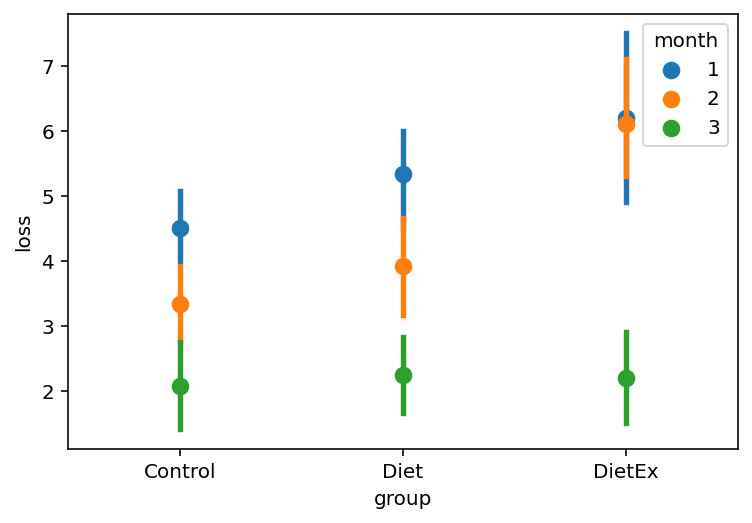

In [99]:
sns.pointplot(x='group', y='loss', data=df, hue='month', join=False)

## set 'estimator'

<AxesSubplot:xlabel='group', ylabel='loss'>

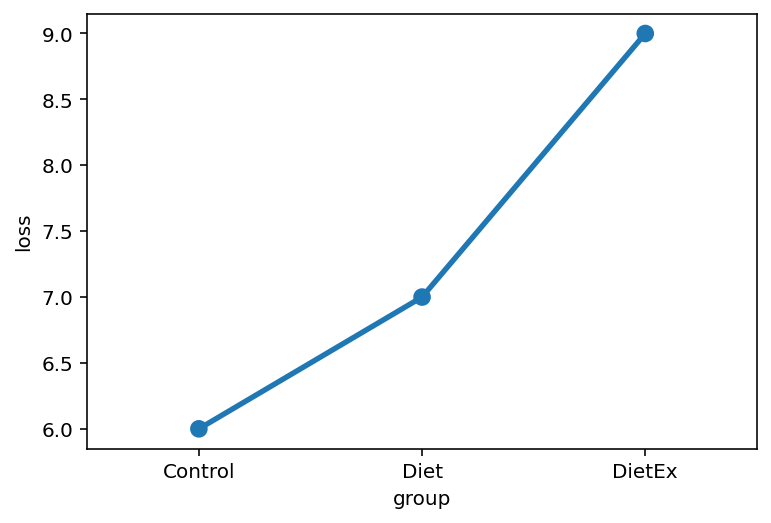

In [100]:
sns.pointplot(x='group', y='loss', data=df,
             estimator=max, ci=False)

## palette

Text(0.5, 1.0, 'weight loss experiment')

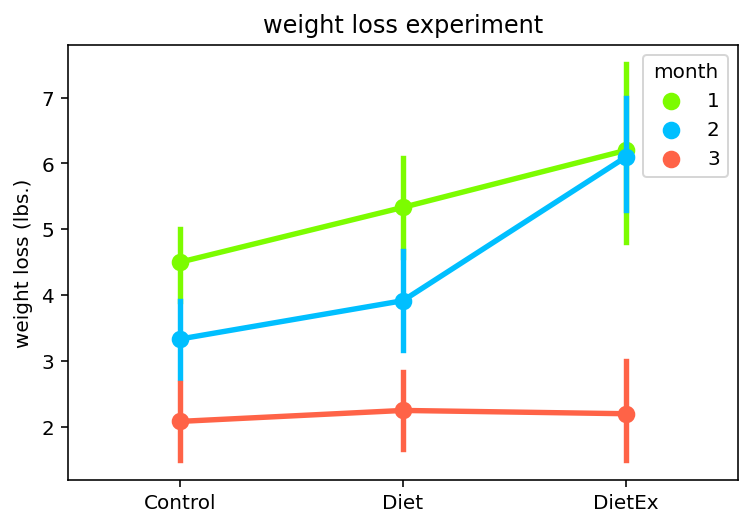

In [101]:
sns.pointplot(x='group', y='loss', data=df,
            hue='month', 
            palette=['lawngreen', 'deepskyblue', 'tomato'])
plt.xlabel('')
plt.ylabel('weight loss (lbs.)')
plt.title('weight loss experiment')

Text(0.5, 1.0, 'weight loss experiment')

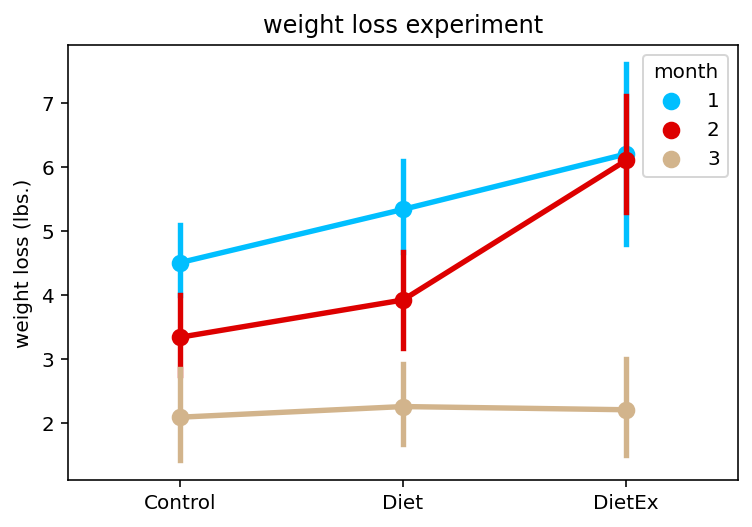

In [102]:
sns.pointplot(x='group', y='loss', data=df,
            hue='month', 
            palette={1:'deepskyblue', 2:'#dd0000', 3:'tan'})
plt.xlabel('')
plt.ylabel('weight loss (lbs.)')
plt.title('weight loss experiment')

# factorplot

C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


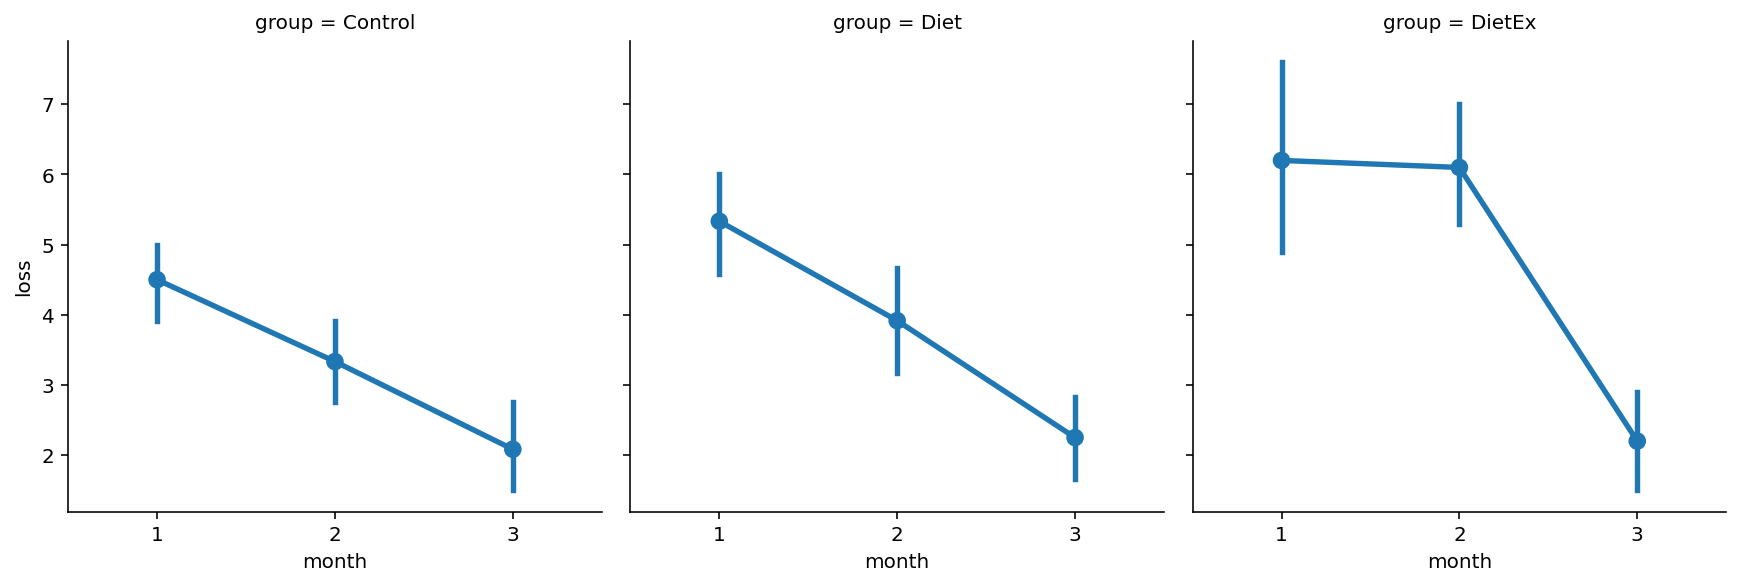

In [103]:
sns.factorplot(x='month', y='loss', data=df,
               col='group',
               kind='point',
               size=4, aspect=1);

C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


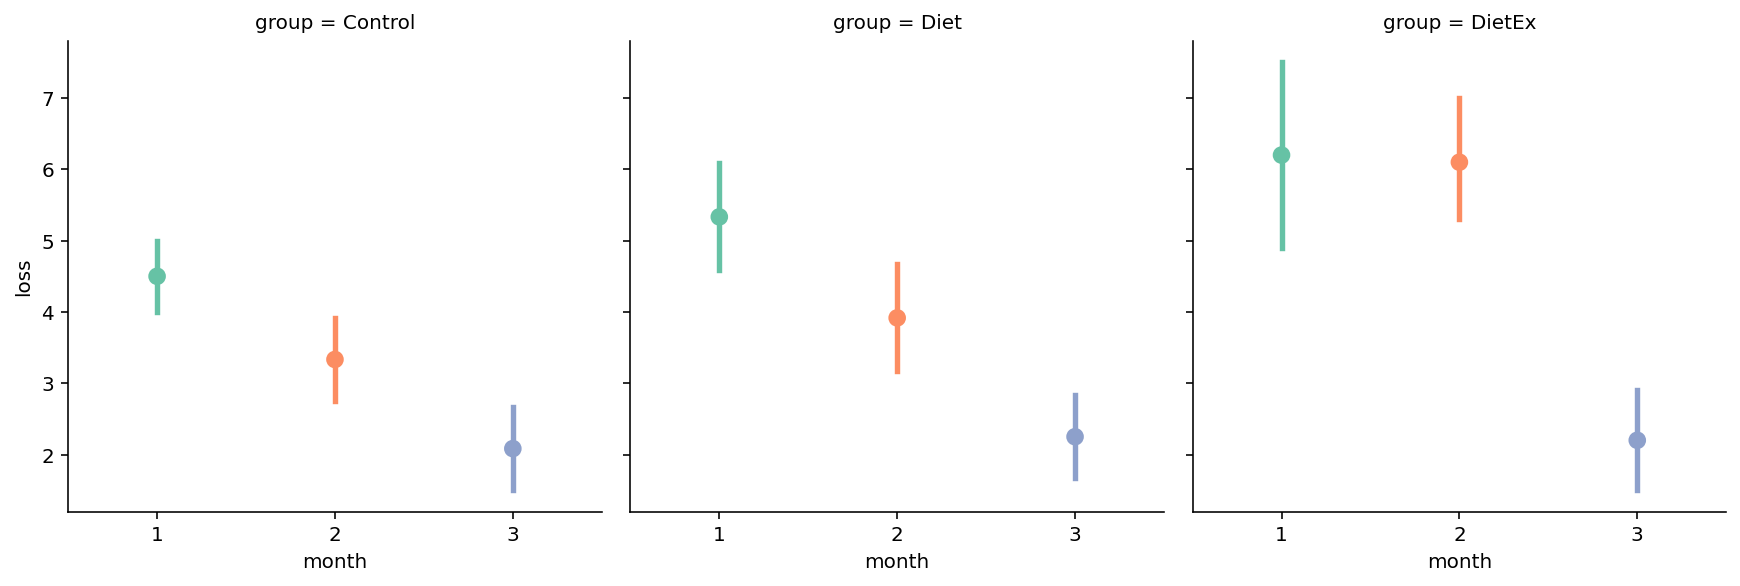

In [104]:
# set palette
sns.factorplot(x='month', y='loss', data=df,
               col='group',
               kind='point',
               palette='Set2',
               size=4, aspect=1);

## scatter plot  relplotดูได้เยอะกว่า


In [105]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

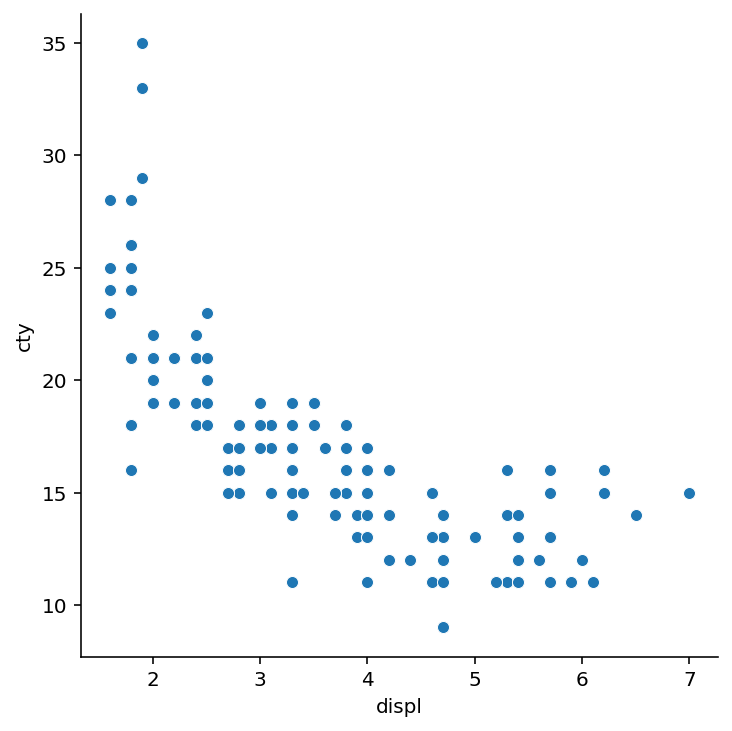

In [106]:
sns.relplot(x="displ", y="cty", data=df)

<AxesSubplot:xlabel='displ', ylabel='cty'>

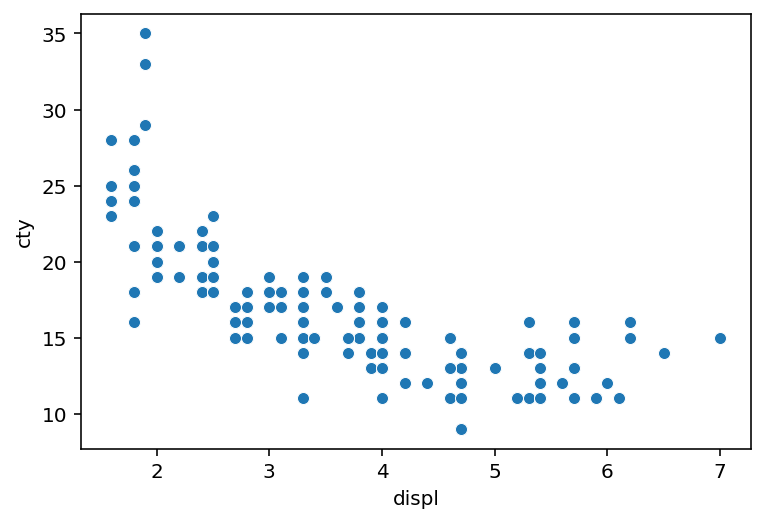

In [107]:
sns.scatterplot(x="displ", y="cty", data=df)

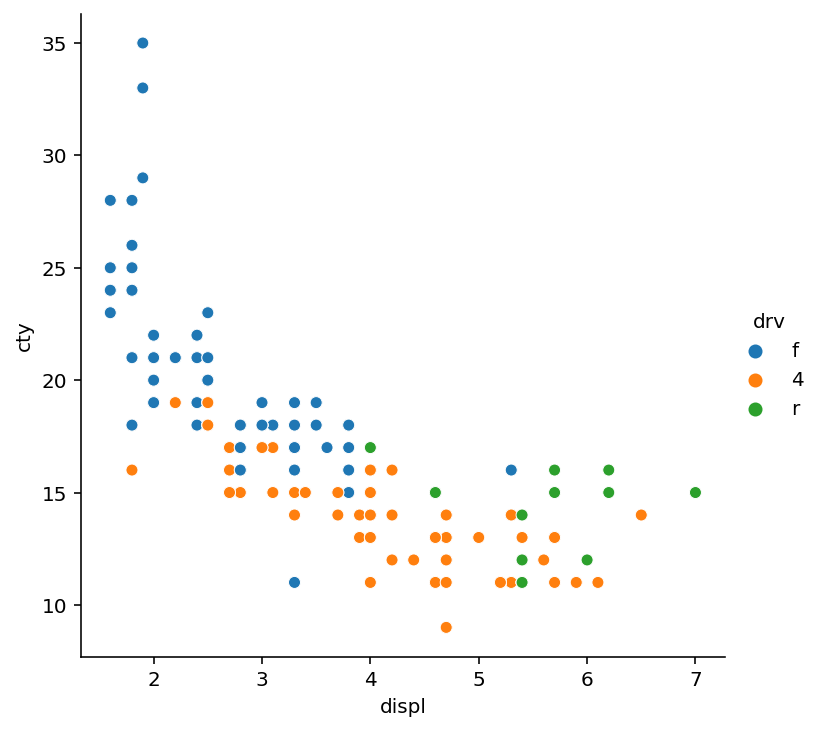

In [108]:
sns.relplot(x="displ", y="cty", hue="drv", data=df)

<AxesSubplot:xlabel='displ', ylabel='cty'>

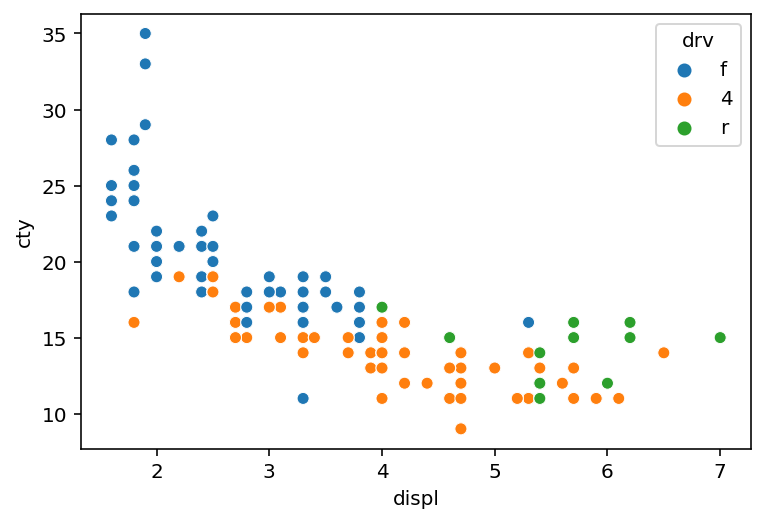

In [109]:
sns.scatterplot(x="displ", y="cty", hue="drv", data=df)

In [110]:
df['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

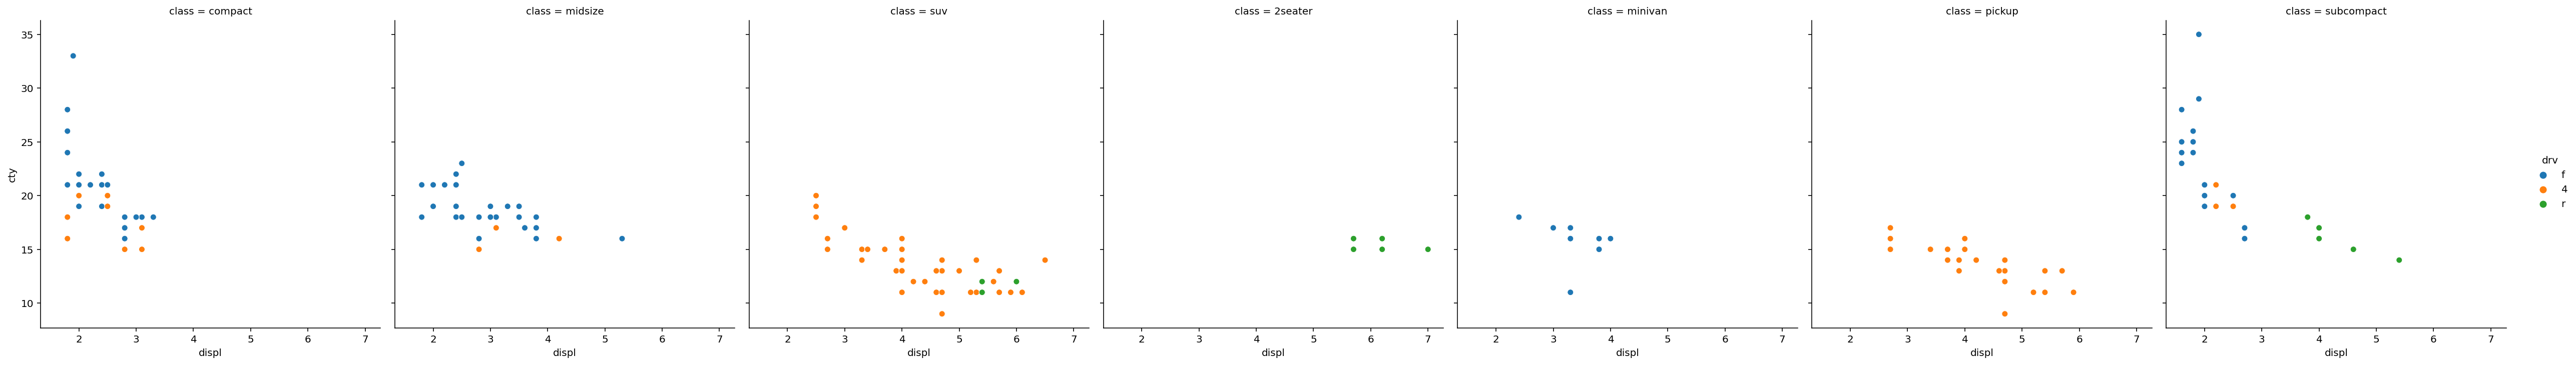

In [111]:
g = sns.relplot(x="displ", y="cty", hue="drv", col="class", 
                data=df)

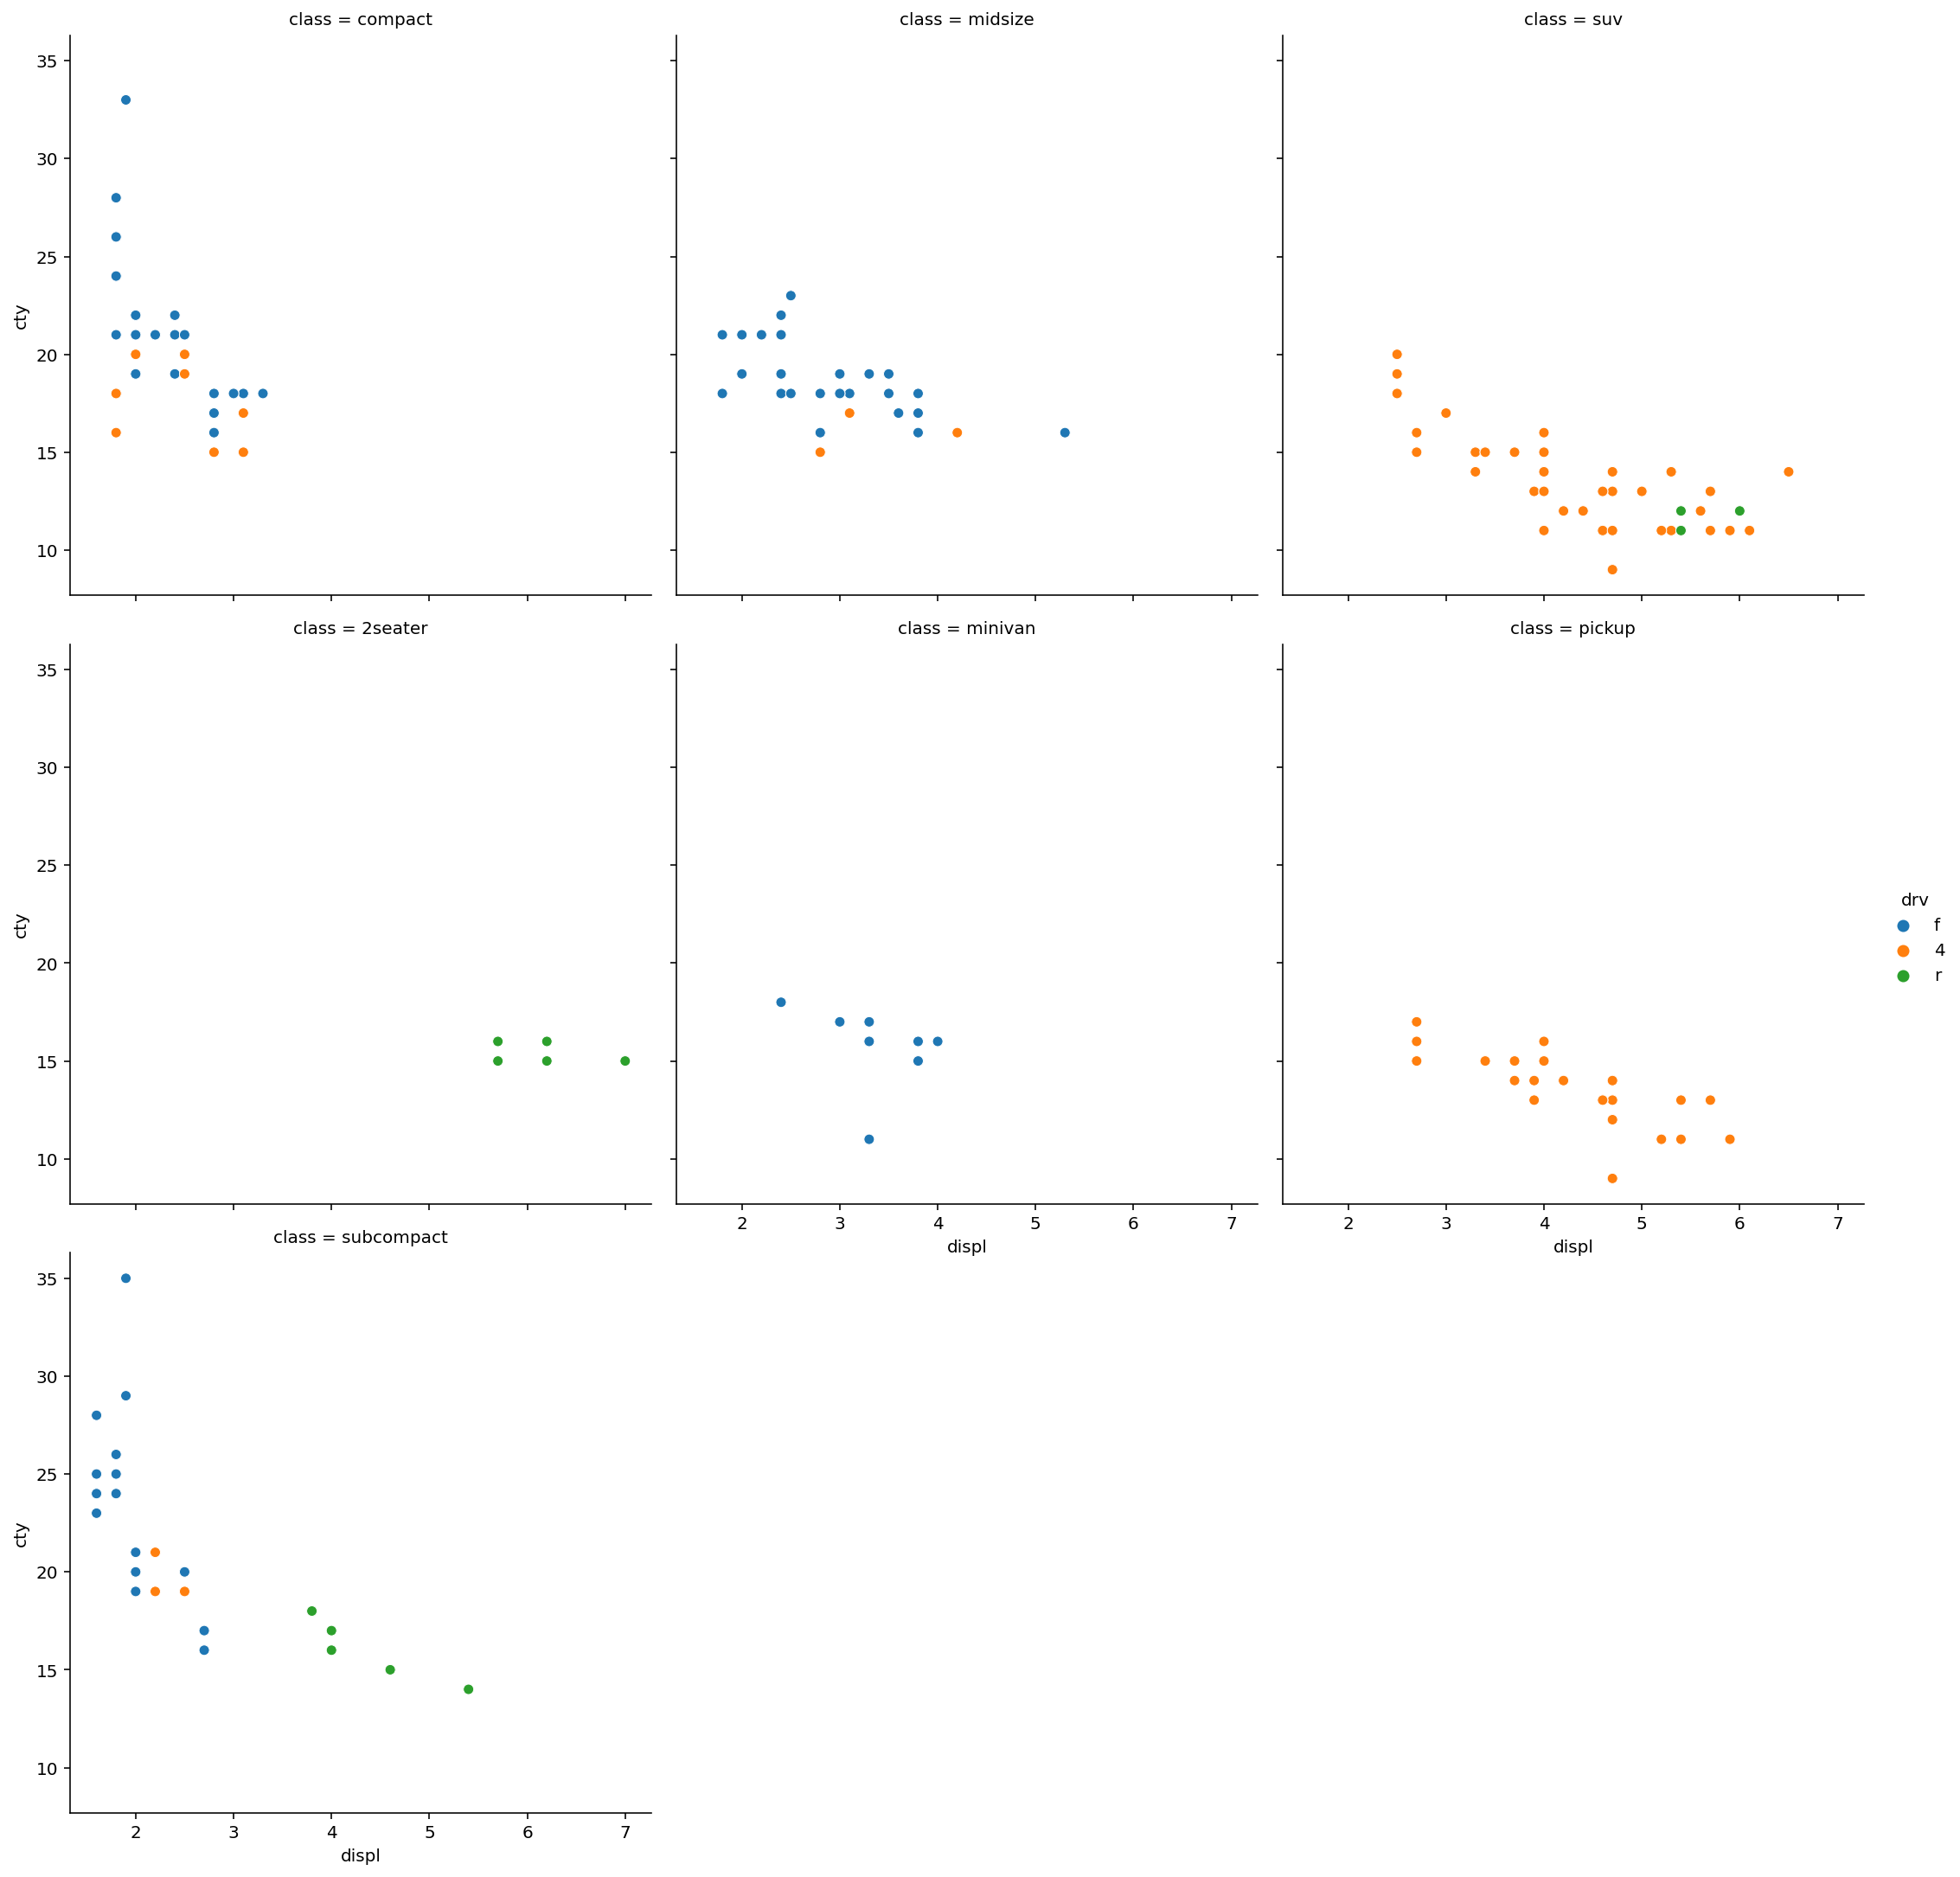

In [112]:
g = sns.relplot(x="displ", y="cty", hue="drv", col="class", col_wrap=3,
                data=df)

In [113]:
df[df['class'].str.match('compact|midsize', case=False)]

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       ...  
229  midsize  
230  midsize  
231  midsize  
232  midsize  
233  midsize  

[88 rows x 11 columns]

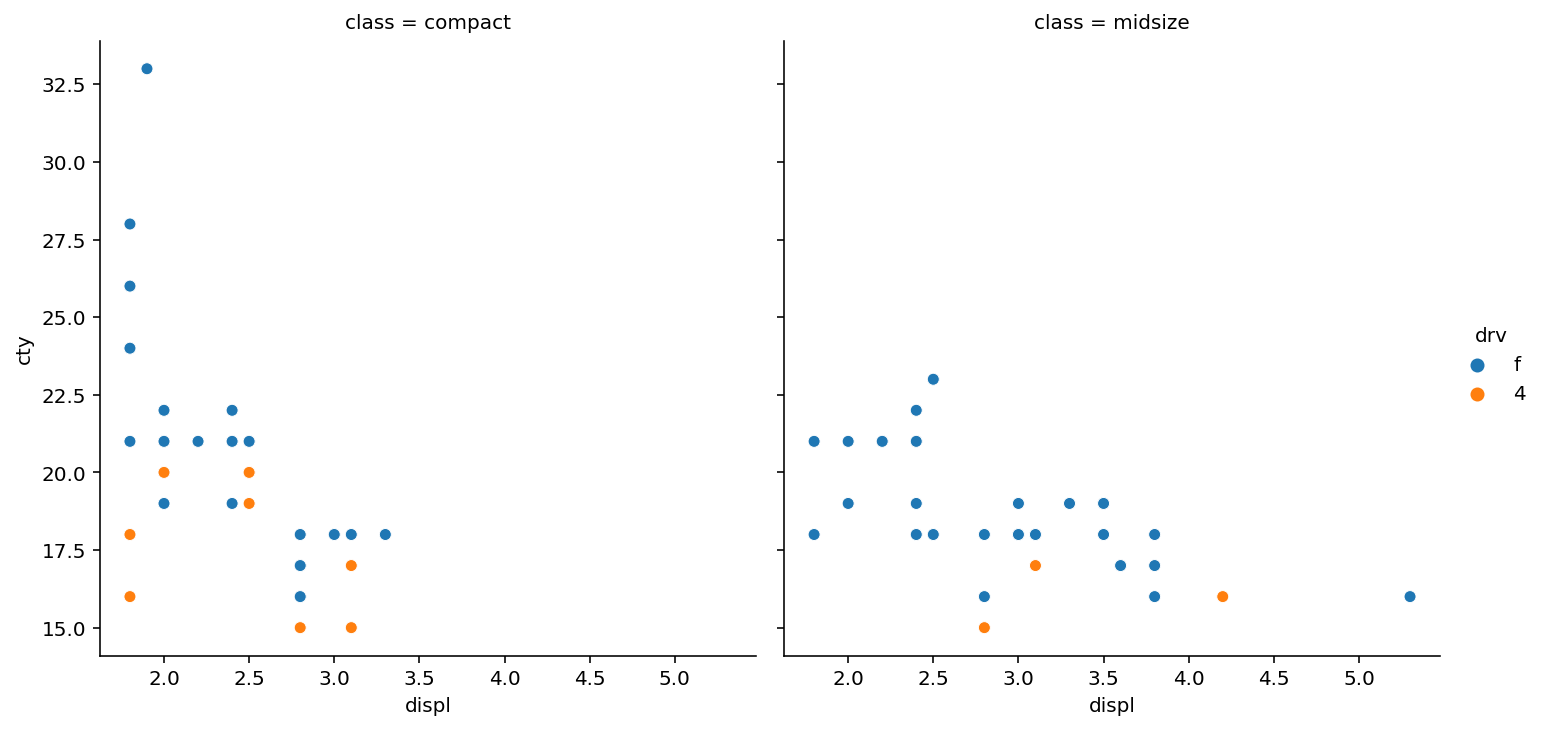

In [114]:
g = sns.relplot(x="displ", y="cty", hue="drv", col="class", 
                data=df[df['class'].str.match('compact|midsize', case=False)])

In [115]:
df['trans_type']=df.trans.str[0].map({'a': 'auto', 'm': 'manual'})
df.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class  \
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact   
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact   
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact   
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact   
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact   

  trans_type  
0       auto  
1     manual  
2     manual  
3       auto  
4       auto

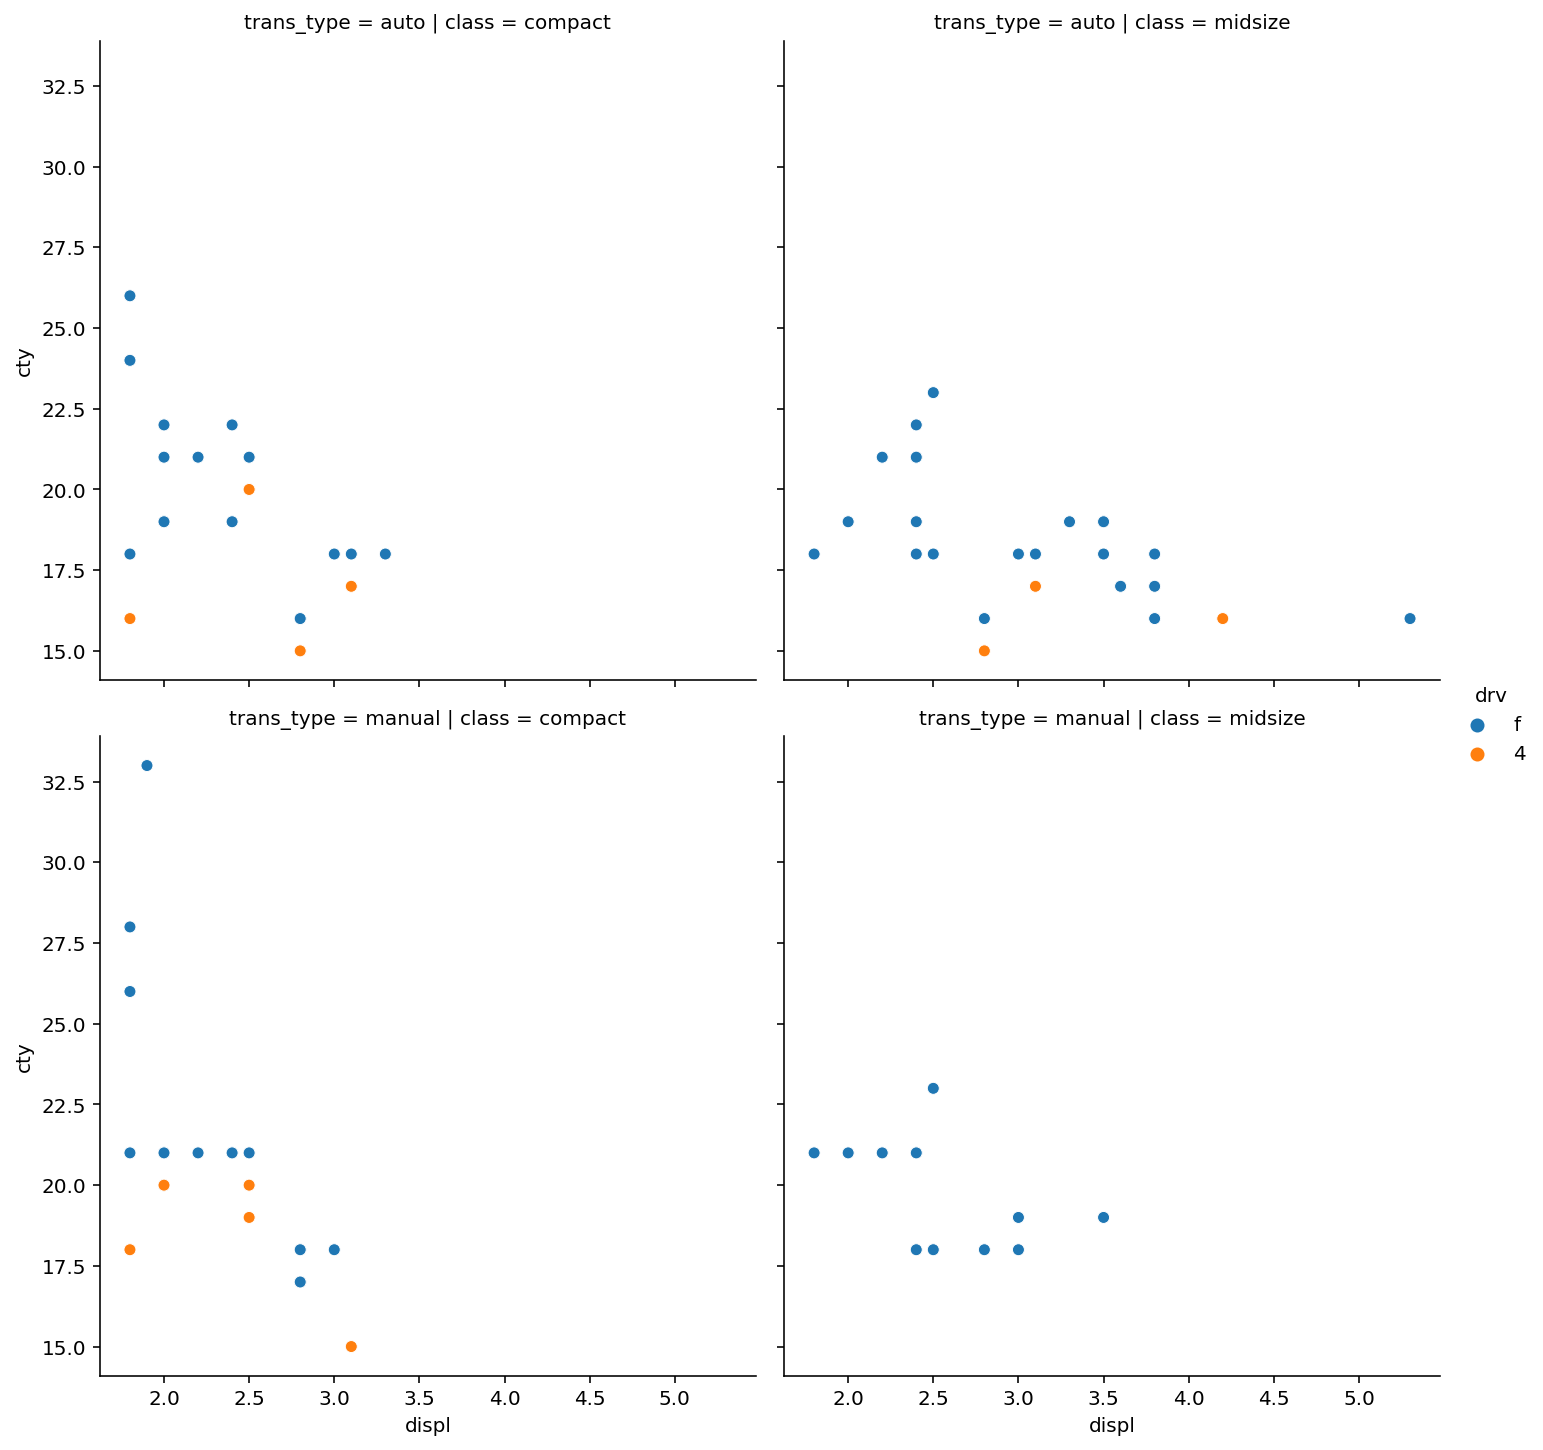

In [116]:
g = sns.relplot(x="displ", y="cty", hue="drv", 
                col="class", row='trans_type',
                data=df[df['class'].str.match('compact|midsize', case=False)])

## add  regression (linear & logistic)

In [117]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.head()

manufacturer model  displ  year  cyl       trans    drv  cty  hwy fl  \
0         audi    a4    1.8  1999    4    auto(l5)  front   18   29  p   
1         audi    a4    1.8  1999    4  manual(m5)  front   21   29  p   
2         audi    a4    2.0  2008    4  manual(m6)  front   20   31  p   
3         audi    a4    2.0  2008    4    auto(av)  front   21   30  p   
4         audi    a4    2.8  1999    6    auto(l5)  front   16   26  p   

     class trans_type    gear  
0  compact       auto    auto  
1  compact     manual  manual  
2  compact     manual  manual  
3  compact       auto    auto  
4  compact       auto    auto

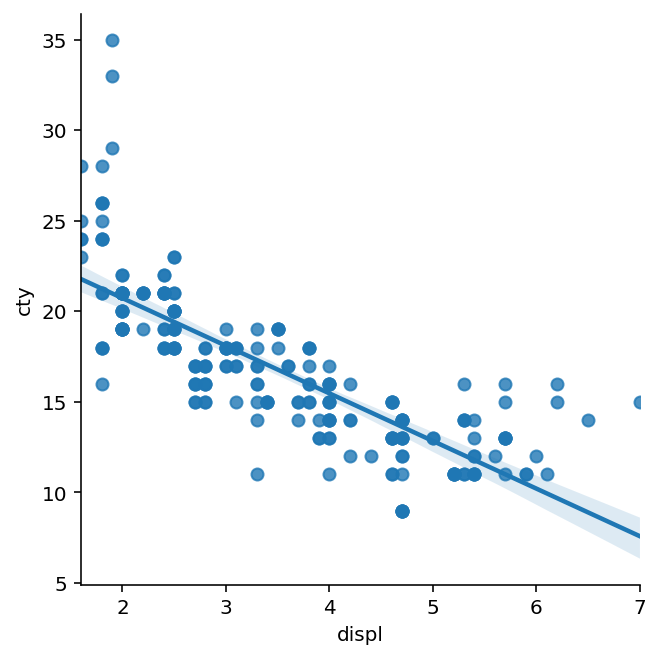

In [118]:
sns.lmplot(x='displ', y='cty', data=df, height=4.5)

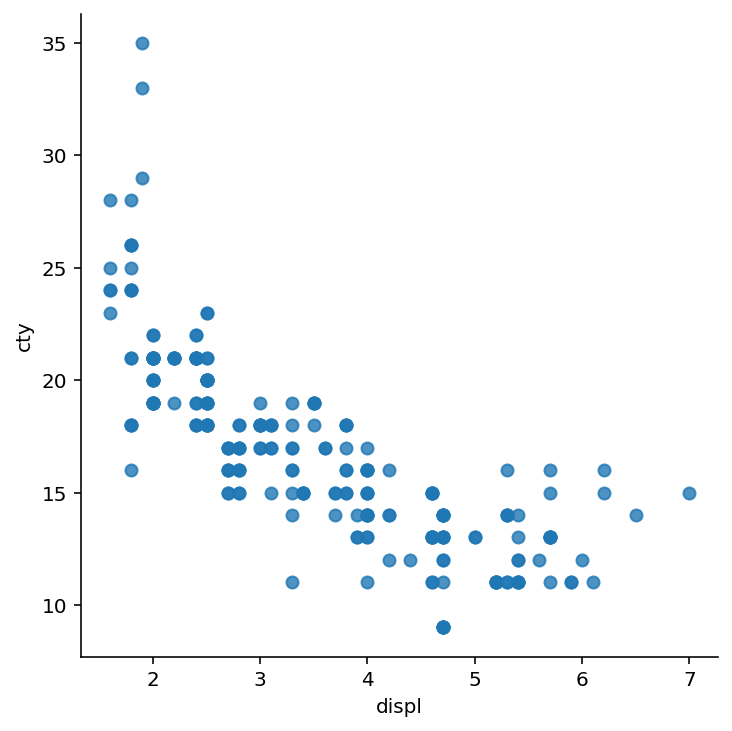

In [119]:
#gvk regression ออก
sns.lmplot(x='displ', y='cty', data=df,
           fit_reg=False)

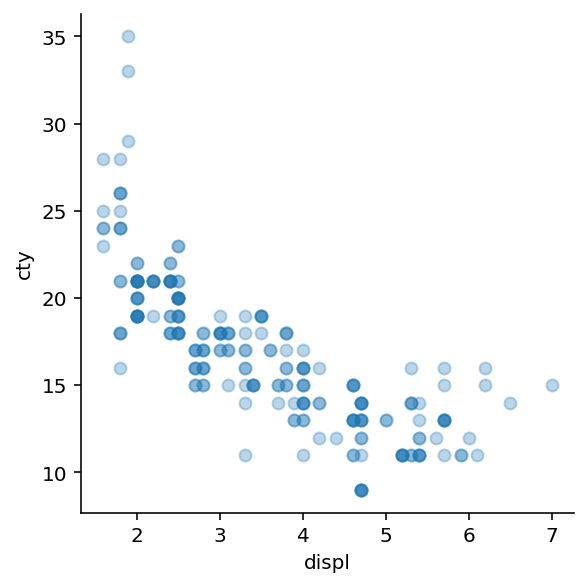

In [120]:
sns.lmplot(x='displ', y='cty', data=df,
           height=4,
           fit_reg=False,
           scatter_kws={'alpha':.3})

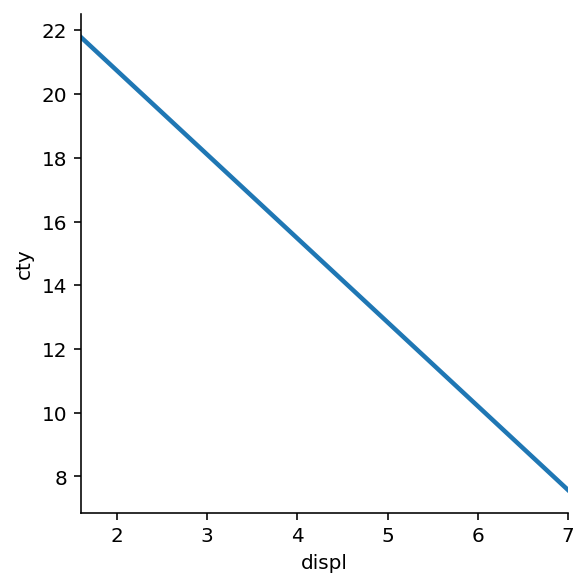

In [121]:
sns.lmplot(x='displ', y='cty', data=df,
           height=4,
           fit_reg=True,
           ci=False,
           scatter=False)

## add hue

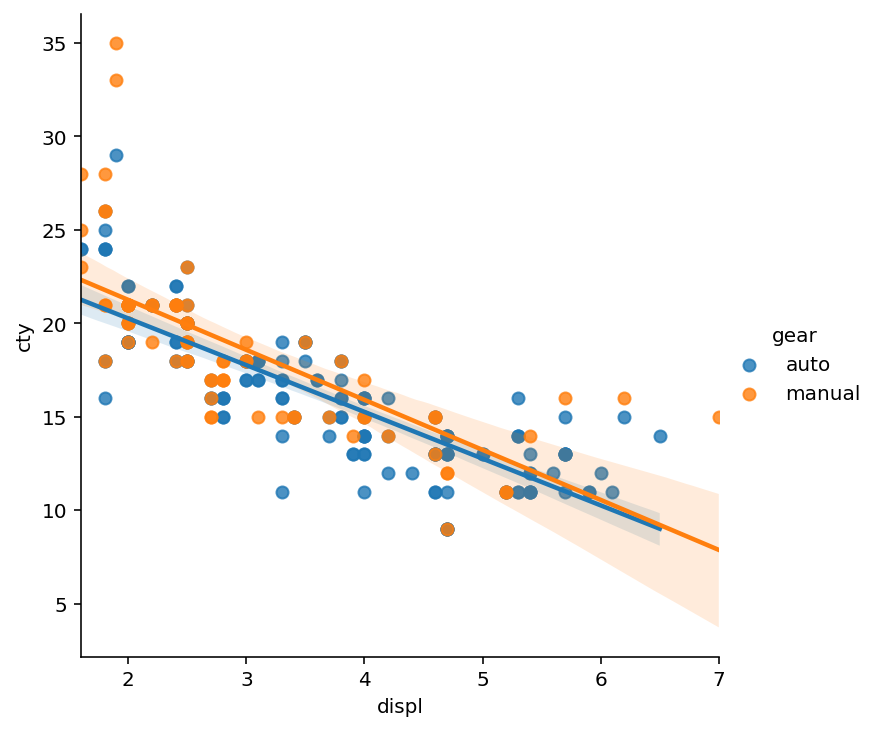

In [122]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='gear')

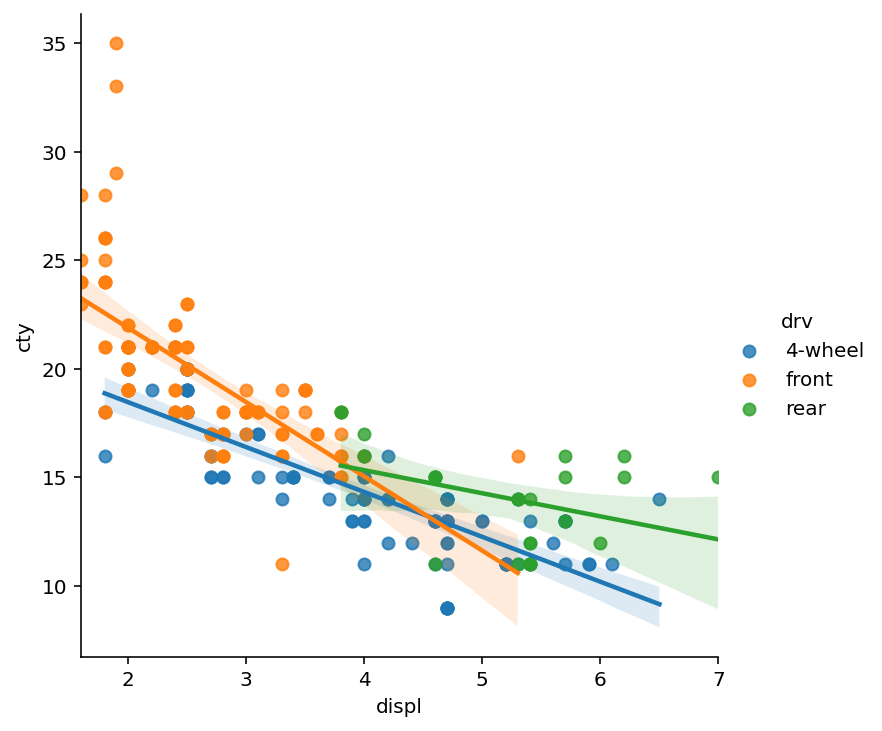

In [123]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='drv')

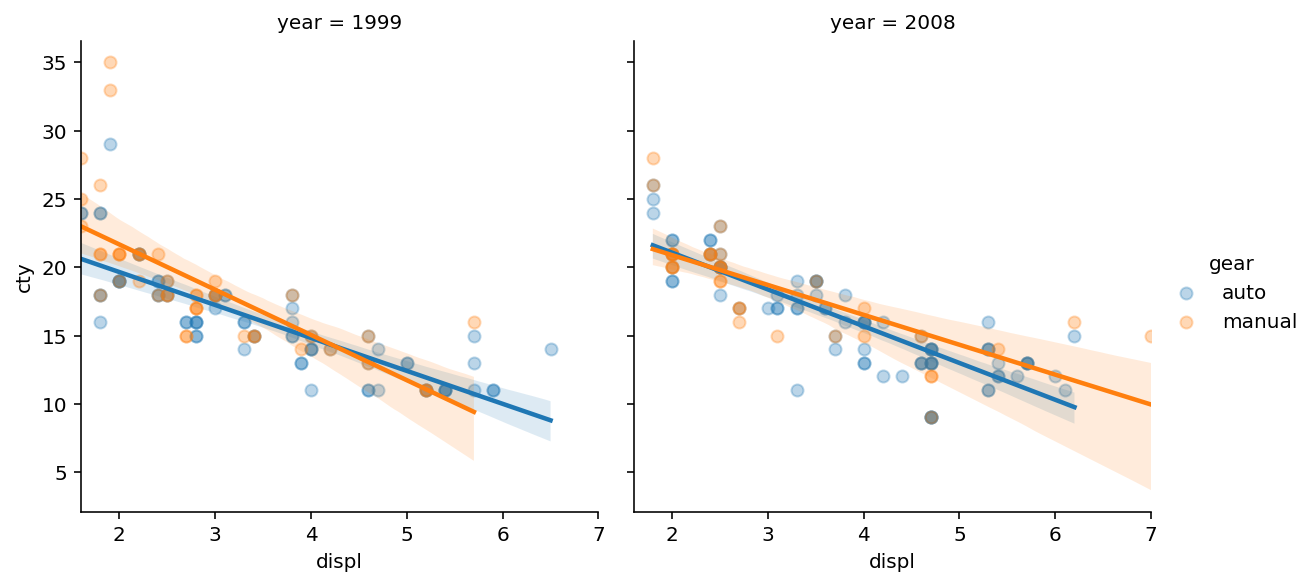

In [124]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='gear',
           col='year',
           height=4,
           scatter_kws={'alpha':.3})

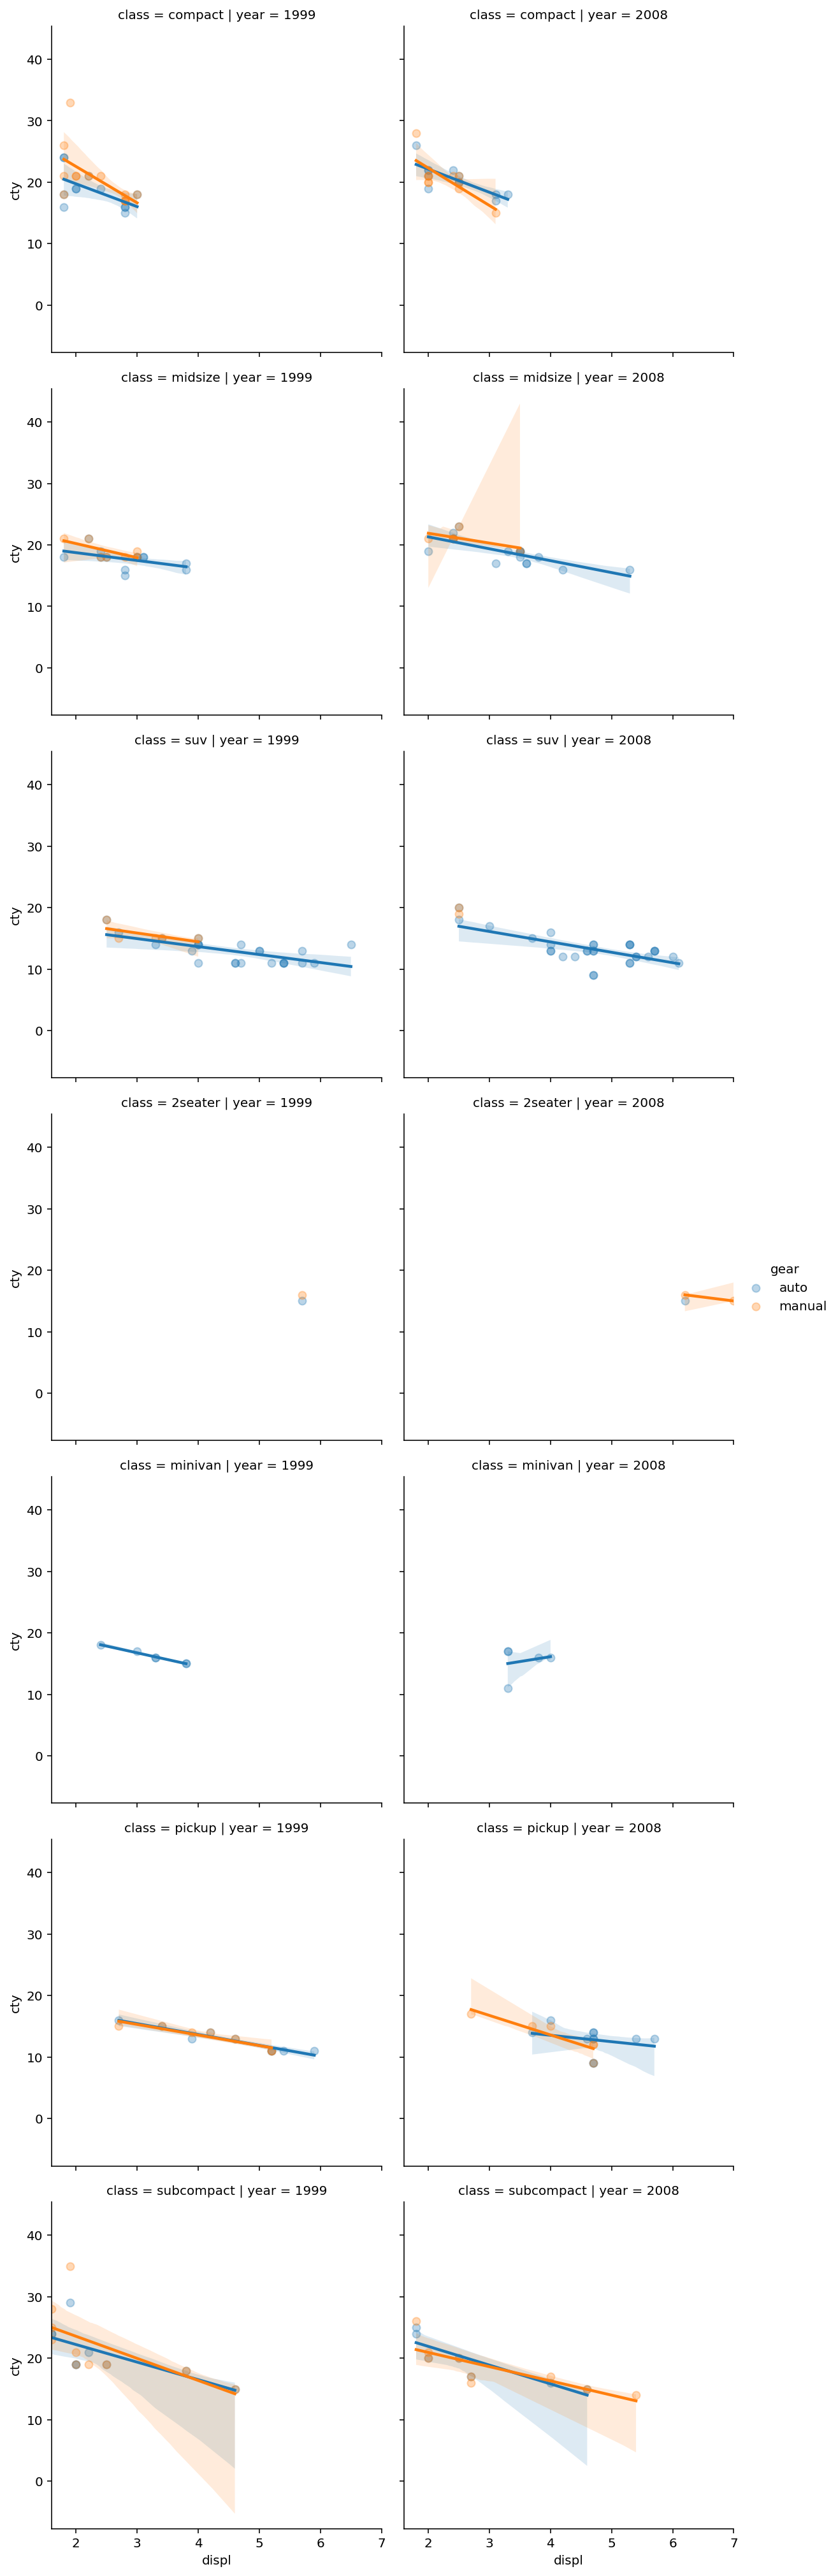

In [125]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='gear',
           col='year',
           row='class',
           height=4,
           scatter_kws={'alpha':.3})

## only regression line

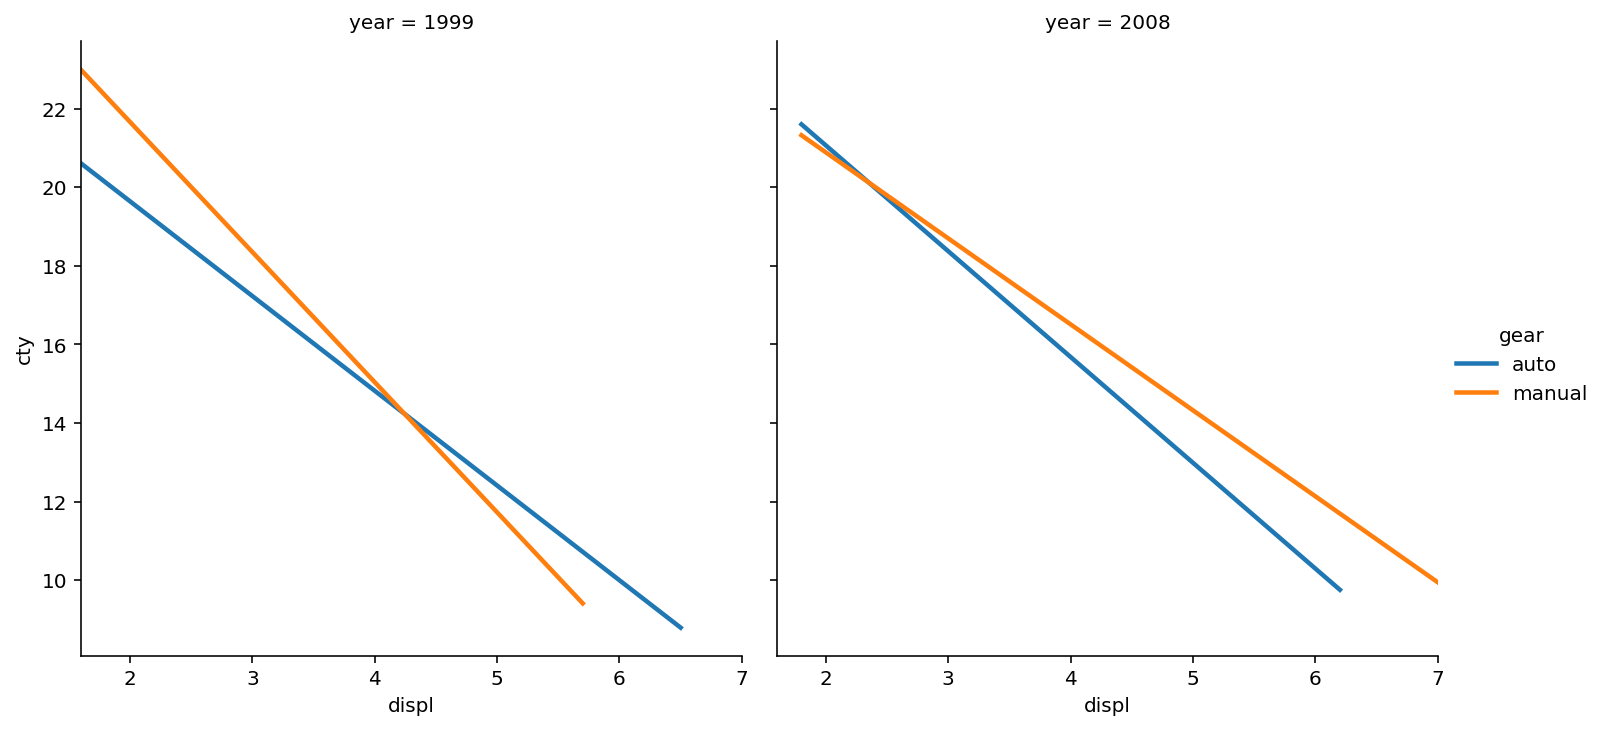

In [126]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='gear',
           col='year',
           ci=False,
           scatter=False)

In [127]:
from IPython.display import IFrame
IFrame('https://matplotlib.org/api/markers_api.html', width=640, height=240)

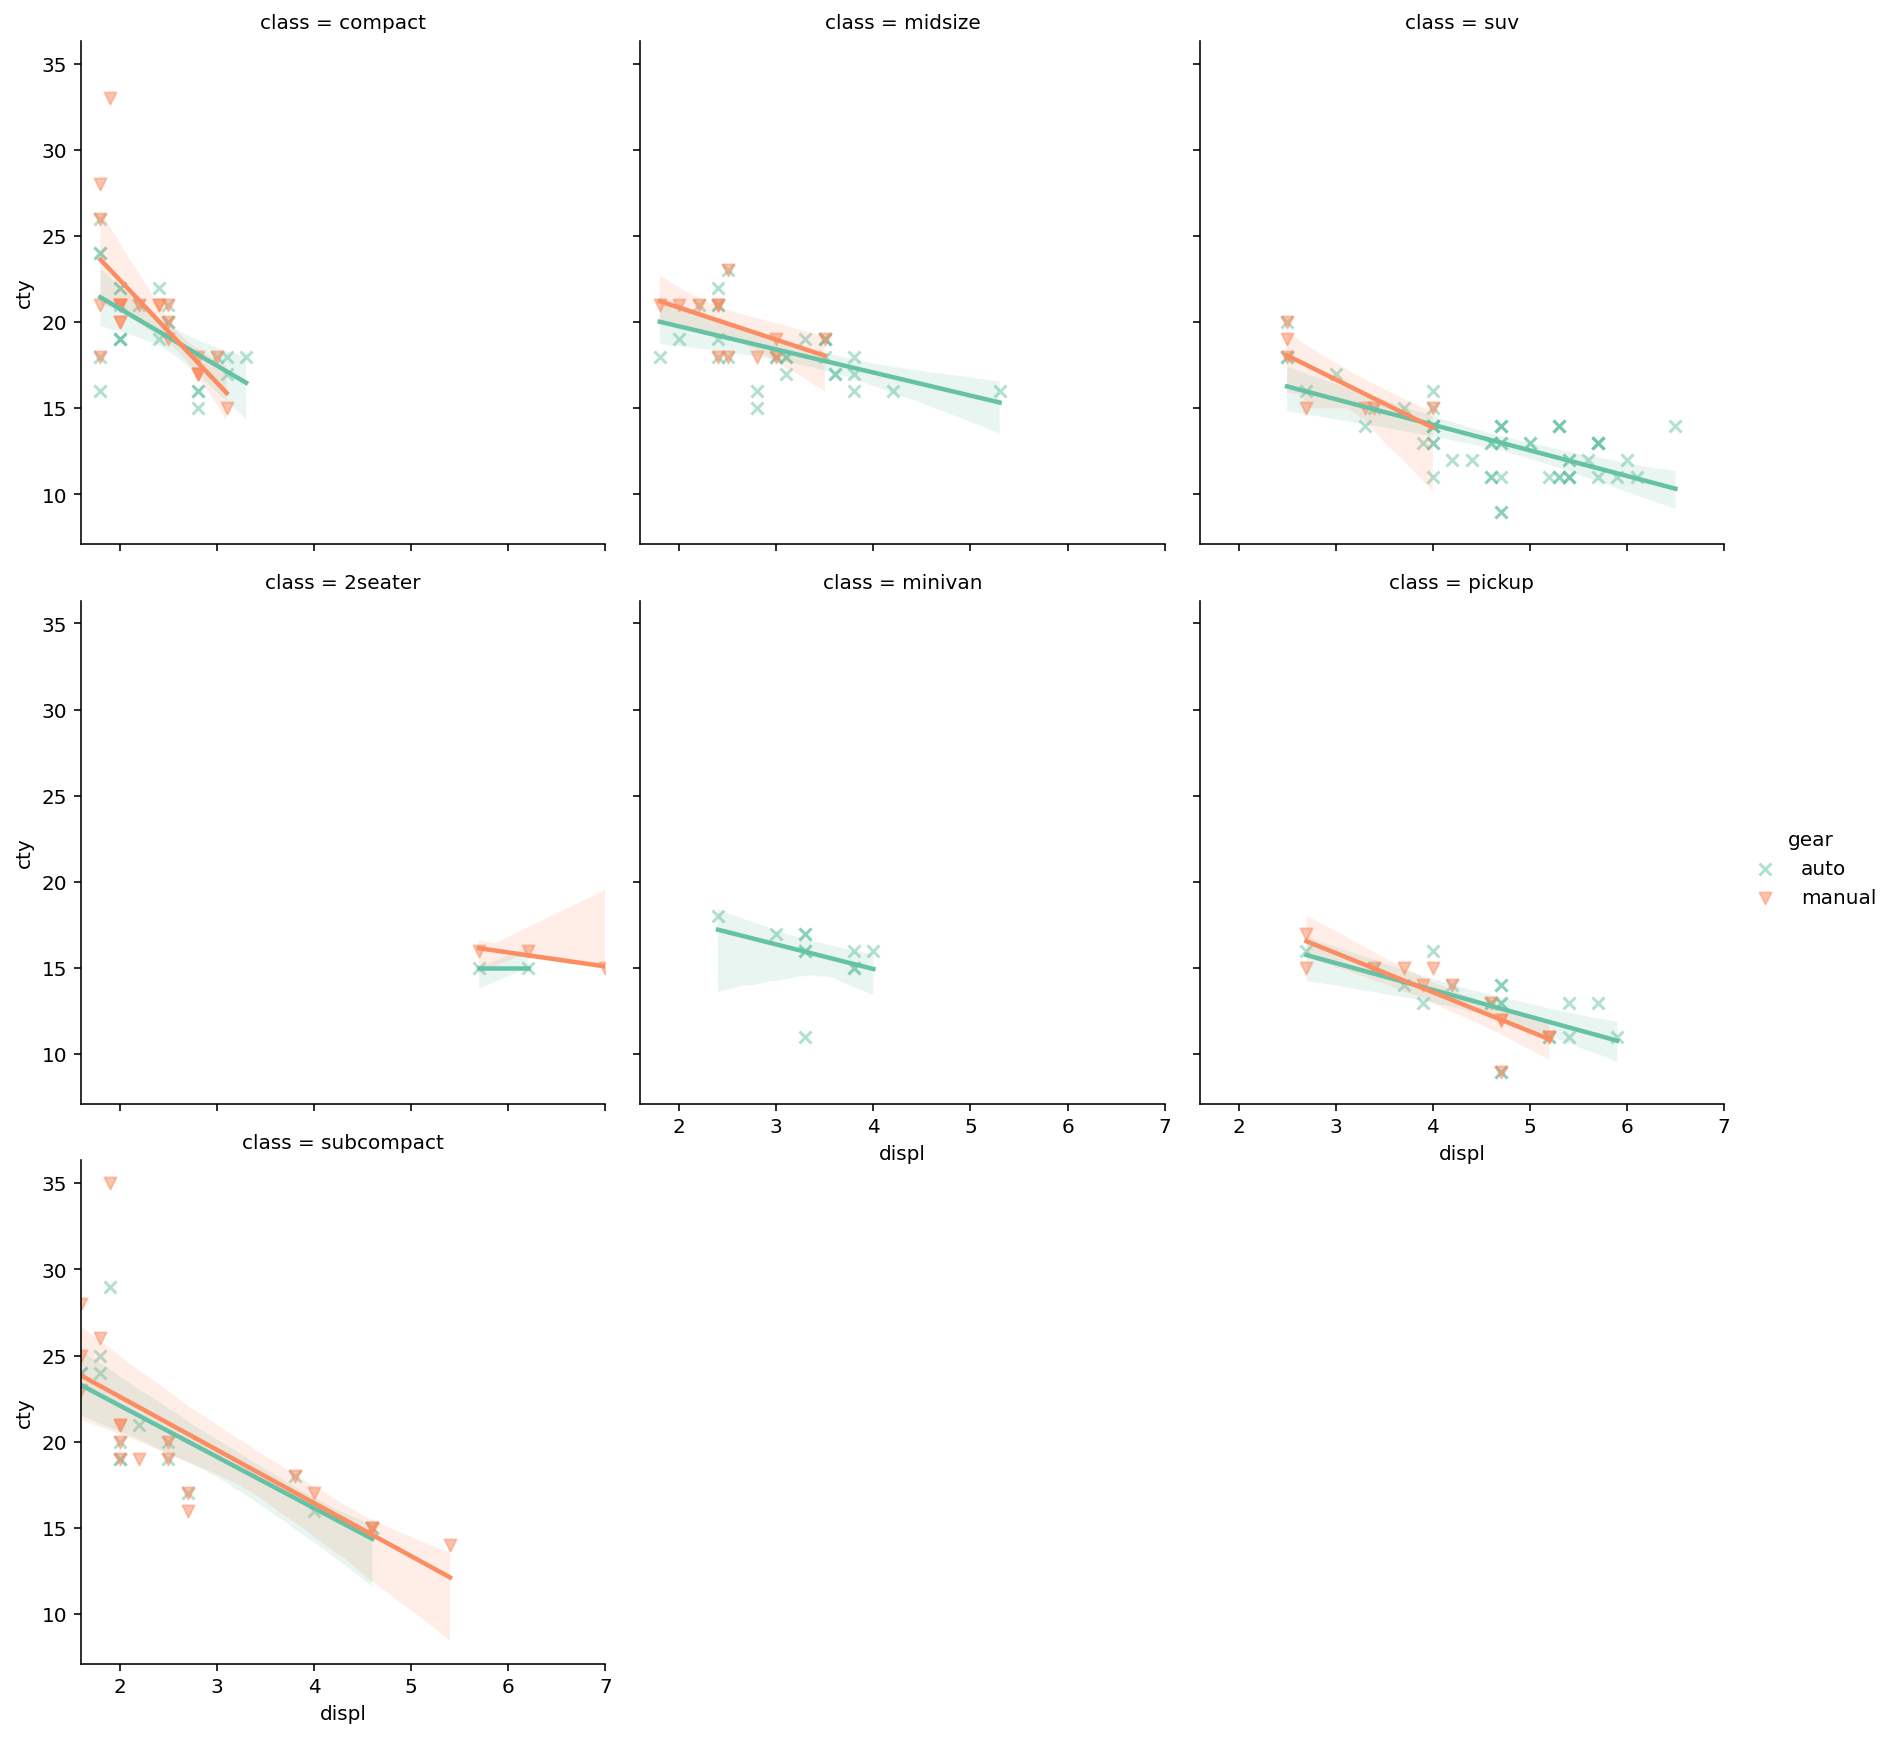

In [128]:
sns.lmplot(x='displ', y='cty', data=df, 
           hue='gear',
           markers=["x", "v"], 
           col='class',
           col_wrap=3,
           height=4,
           palette="Set2",
           scatter_kws={'alpha':.5})

## logistic

In [129]:
IFrame("https://en.wikipedia.org/wiki/Logistic_regression", width=640, height=240)

In [130]:
df2=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv')
df2.sample(5)

Hours  Pass
8    2.25     1
12   3.25     1
5    1.75     0
10   2.75     1
11   3.00     0

C:\Users\61307\python\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\61307\python\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


Text(6.800000000000004, 0.5, 'Probability of passing exam')

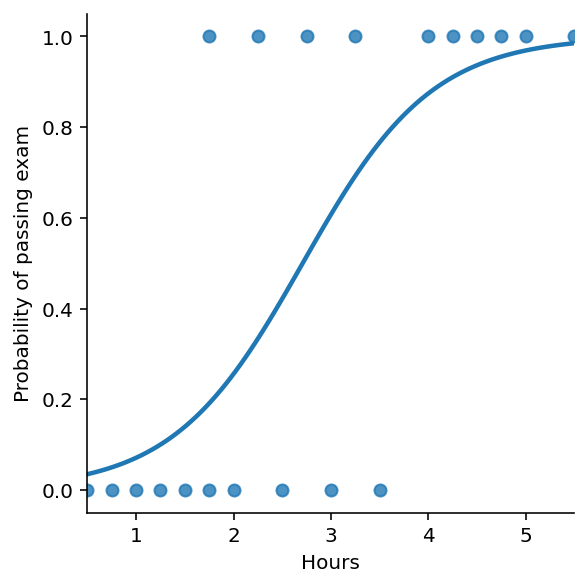

In [131]:
sns.lmplot(x='Hours', y='Pass', data=df2,
           logistic=True, size=4)
plt.ylabel('Probability of passing exam')

# Jointplot

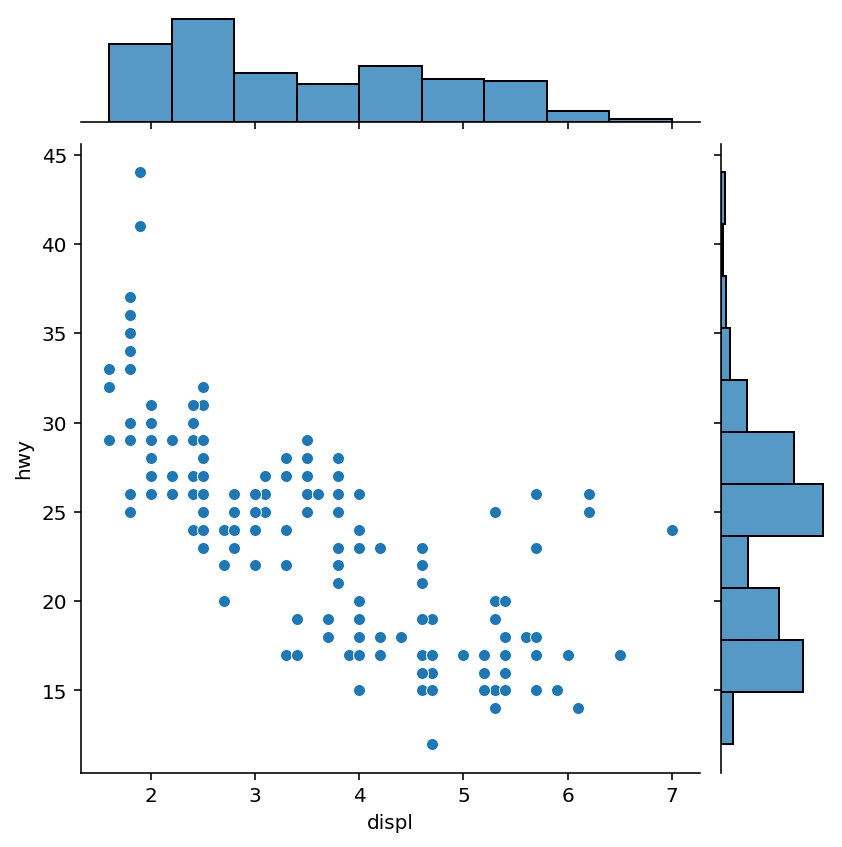

In [132]:
sns.jointplot(data=df, x='displ', y='hwy');

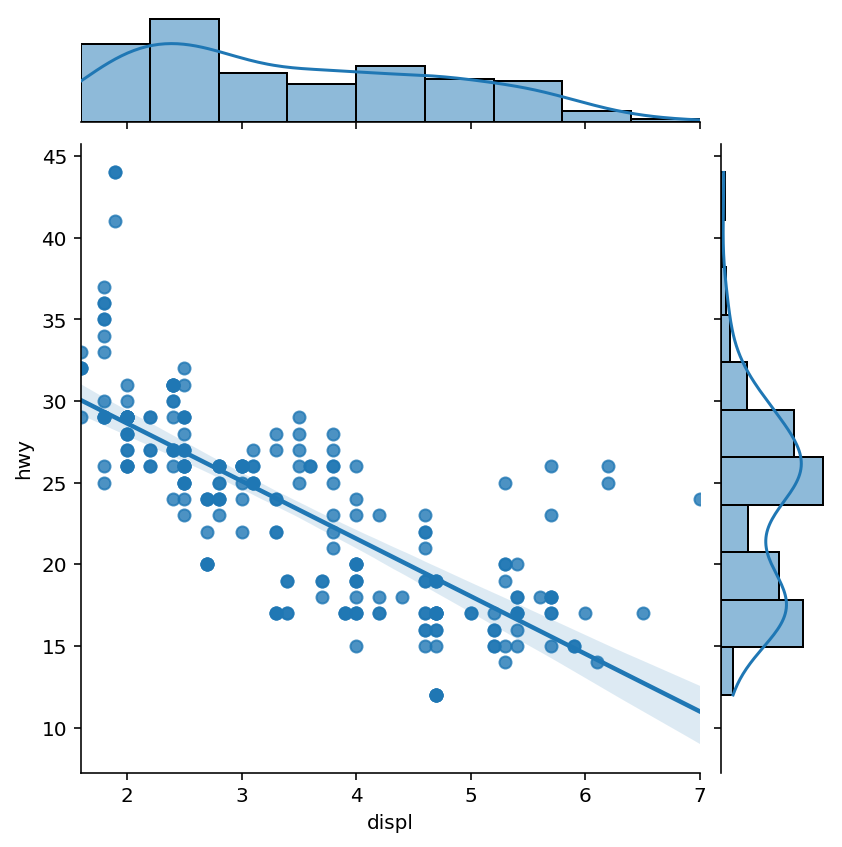

In [133]:
sns.jointplot(data=df, x='displ', y='hwy', kind='reg');

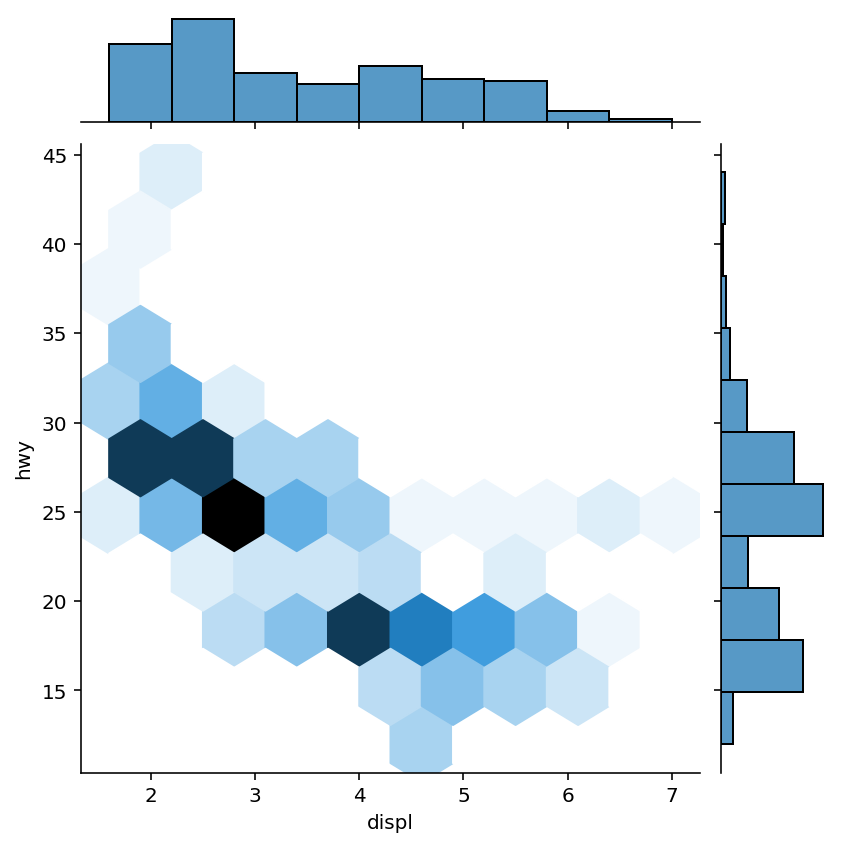

In [134]:
sns.jointplot(data=df, x='displ', y='hwy', kind='hex');

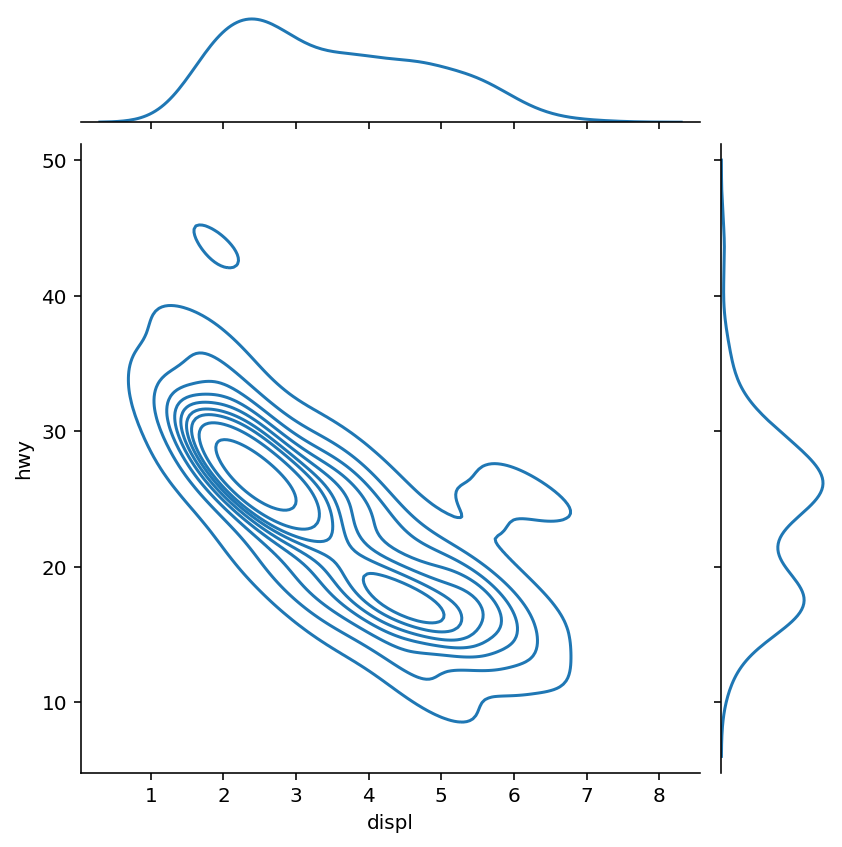

In [135]:
sns.jointplot(data=df, x='displ', y='hwy', kind='kde');

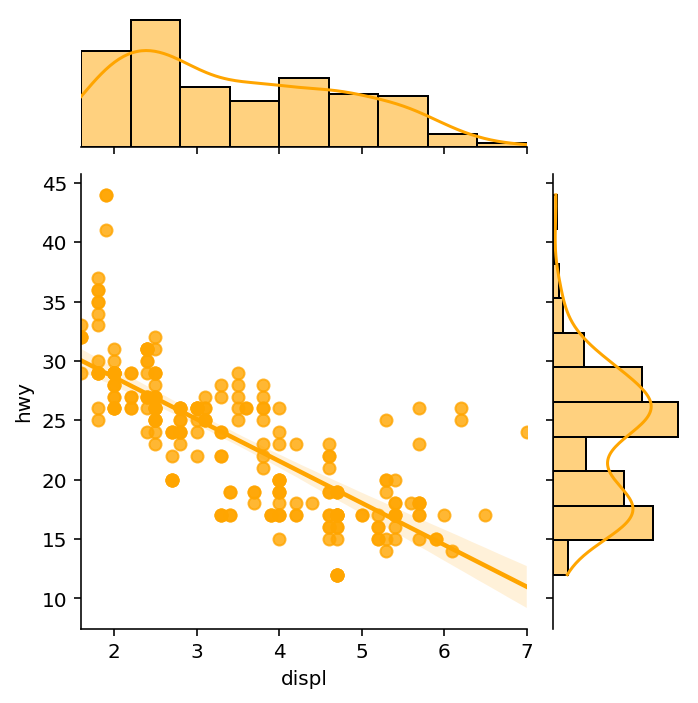

In [136]:
sns.jointplot(data=df, x='displ', y='hwy', kind='reg', 
              color='orange',
              height=5, ratio=3);

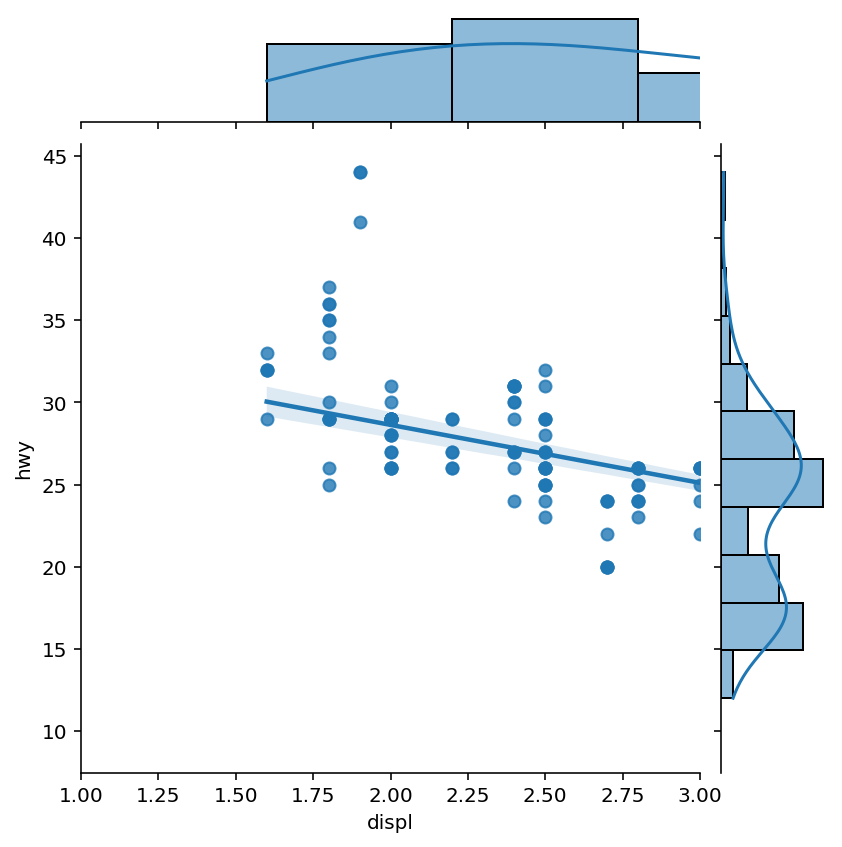

In [137]:
sns.jointplot(data=df, x='displ', y='hwy', kind='reg', xlim=(1, 3));

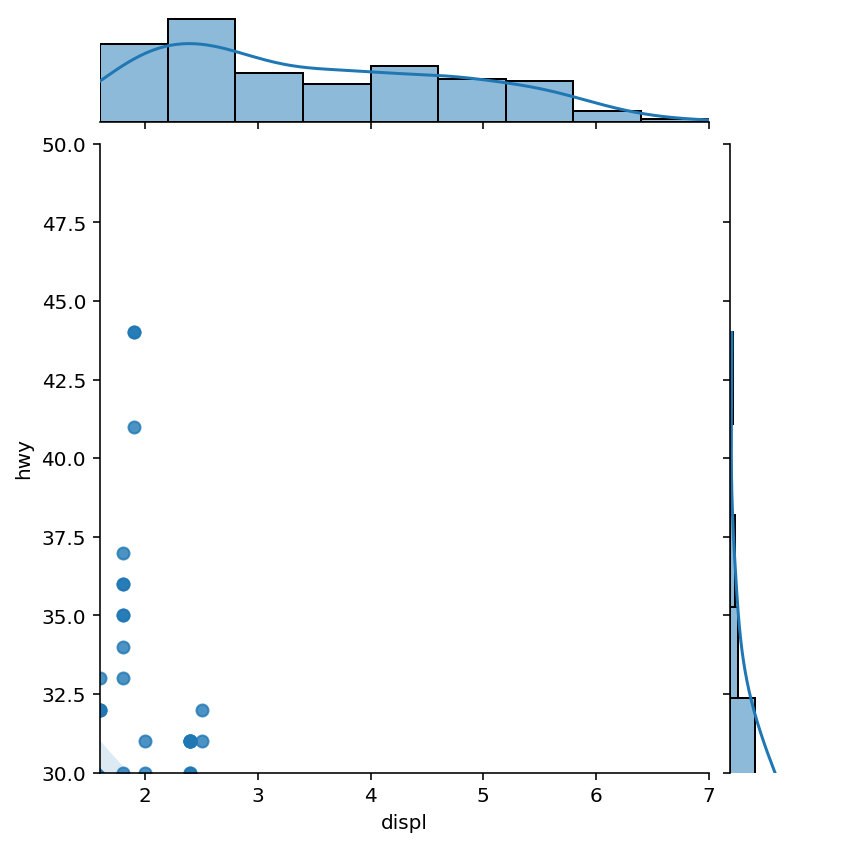

In [138]:
sns.jointplot(data=df, x='displ', y='hwy', kind='reg', ylim=(30, 50));

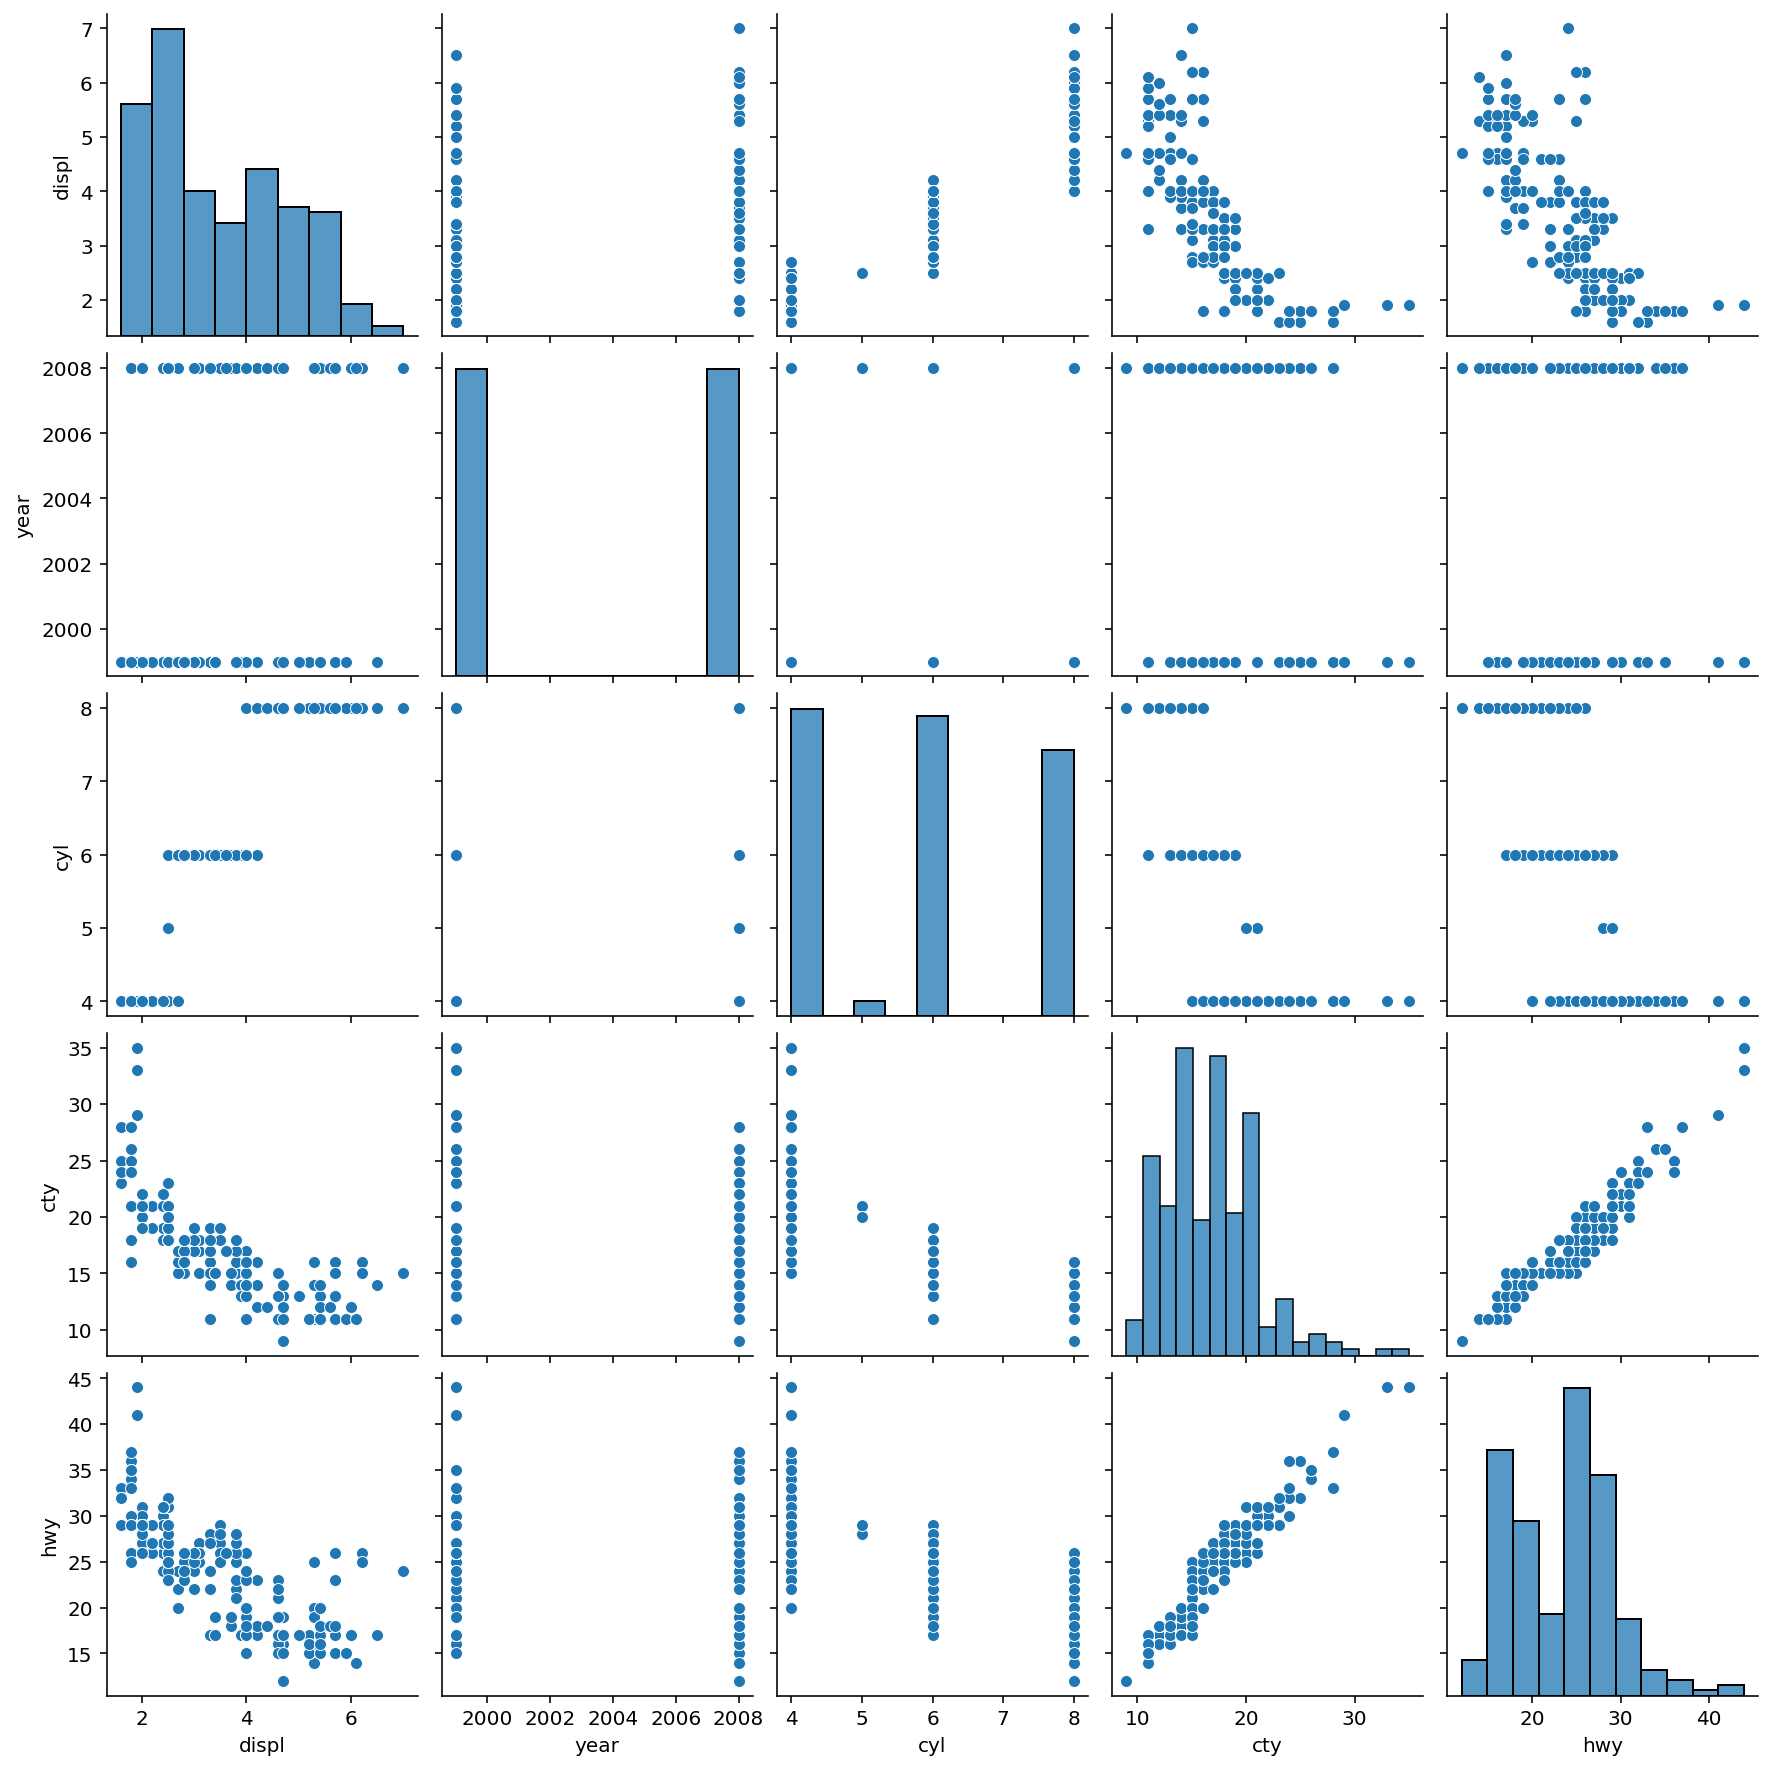

In [139]:
sns.pairplot(df);

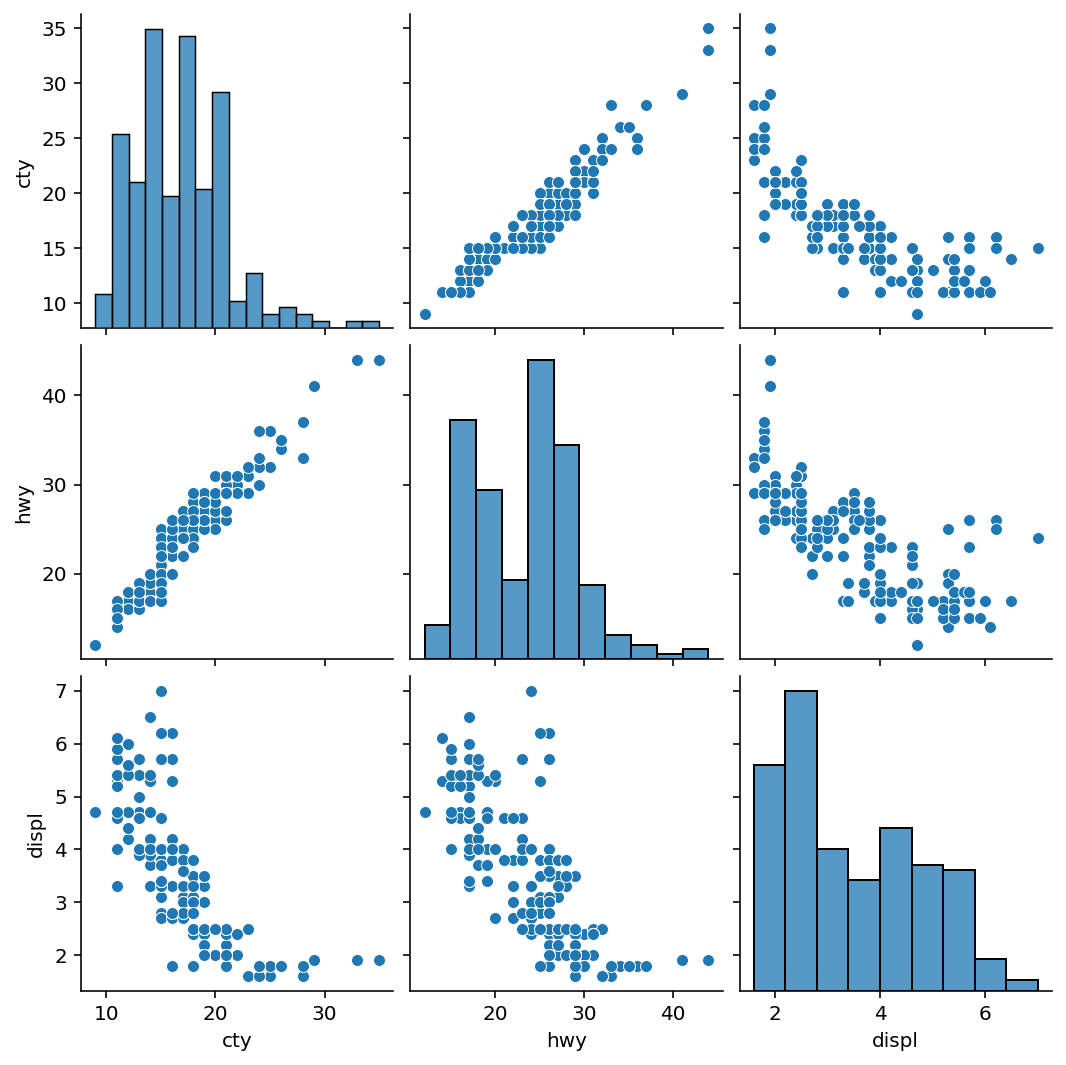

In [140]:
sns.pairplot(df, vars=["cty", "hwy", "displ"]);

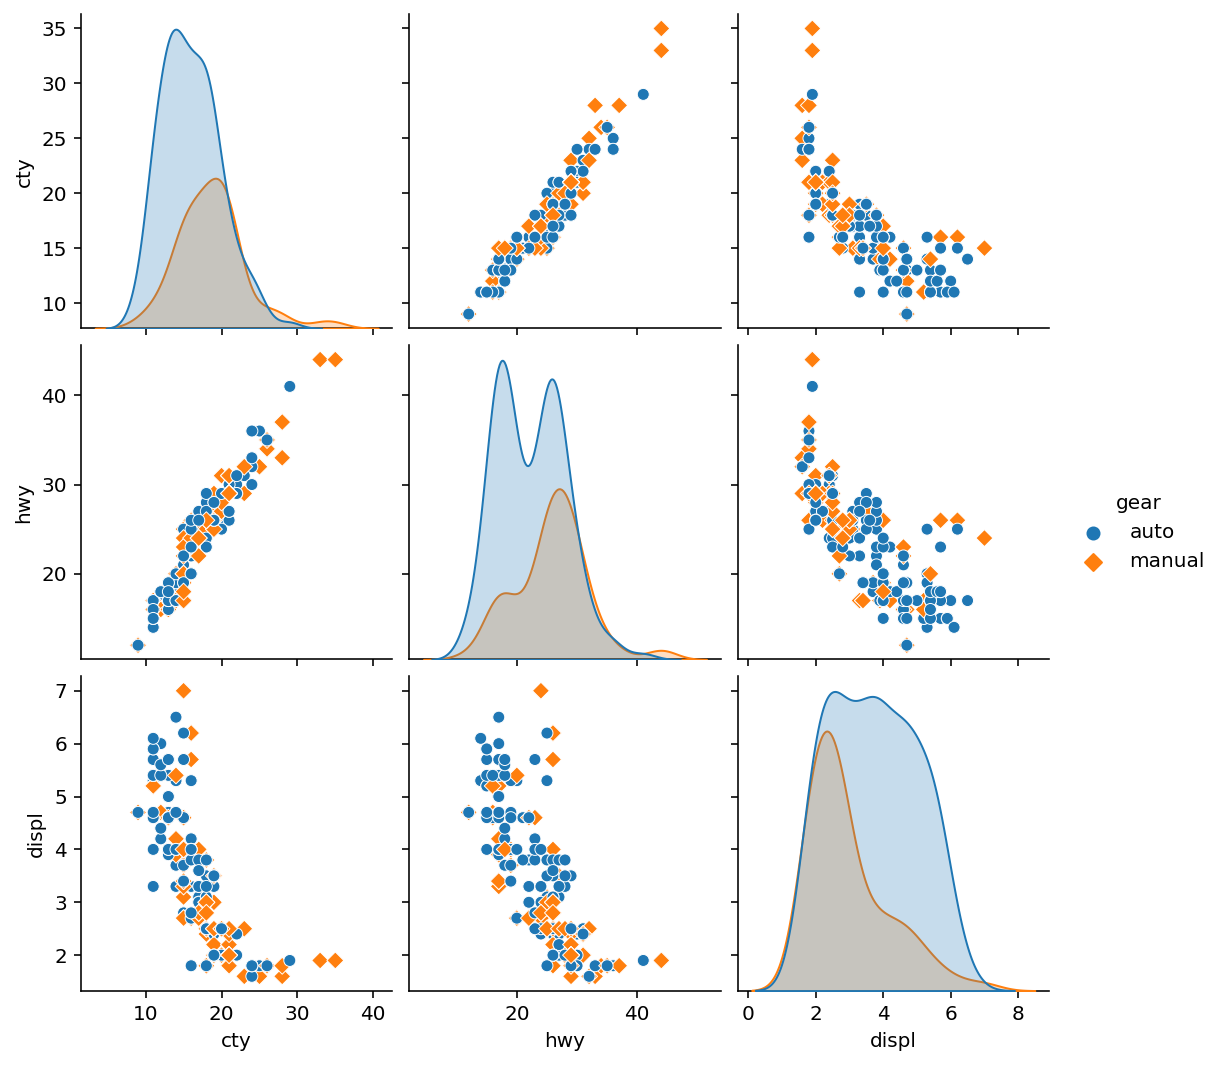

In [141]:
sns.pairplot(df, vars=["cty", "hwy", "displ"], 
             hue="gear", 
             markers=["o", "D"]);

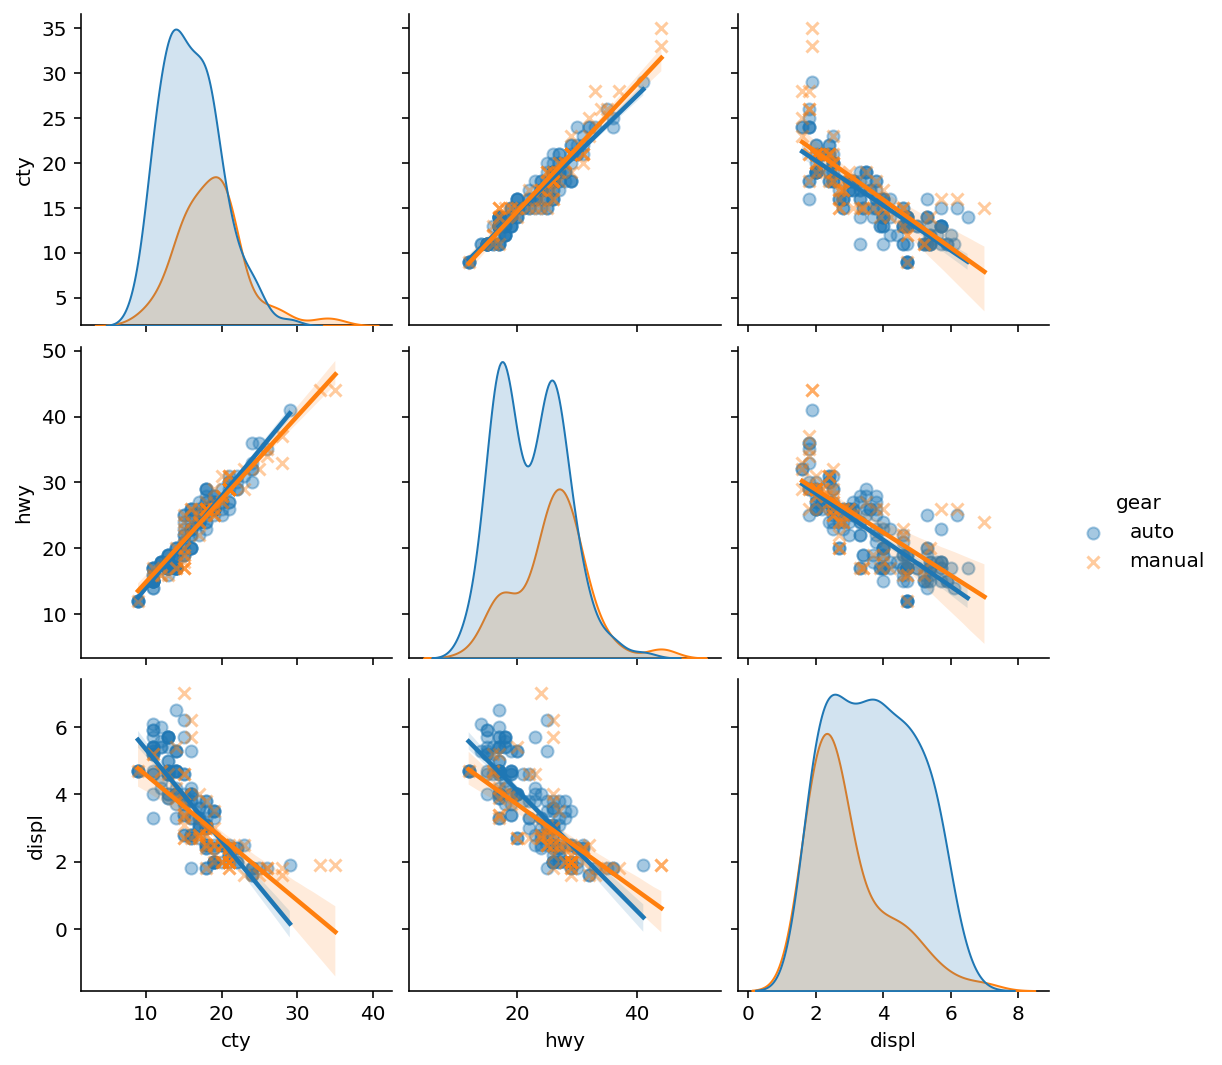

In [142]:
sns.pairplot(df, vars=["cty", "hwy", "displ"], 
             hue="gear", markers=["o", "x"], 
             kind='reg', 
             height=2.5,
             plot_kws={'scatter_kws': {'alpha': 0.4}},
             diag_kws={'alpha':.2});

# heatmap 

In [143]:
df=pd.read_excel('https://github.com/prasertcbs/basic-dataset/raw/master/plastic_cards_in_Thailand.xlsx',
                index_col='Card')
df

2553      2554      2555      2556      2557      2558 
Card                                                              
Credit  14187815  15328291  16870025  18548754  20303751  21762275
ATM     18562689  16201587  15171998  14699210  14215370  13397755
Debit   33367315  37363365  40678603  42343959  44823517  46989719

<AxesSubplot:ylabel='Card'>

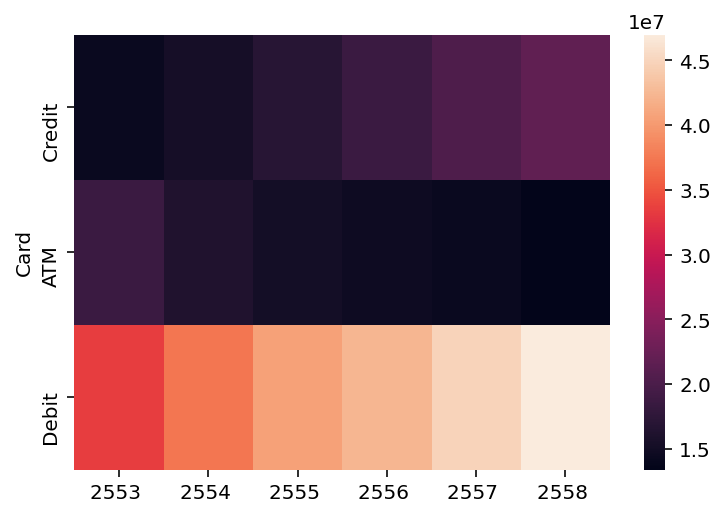

In [144]:
sns.heatmap(df)

<AxesSubplot:ylabel='Card'>

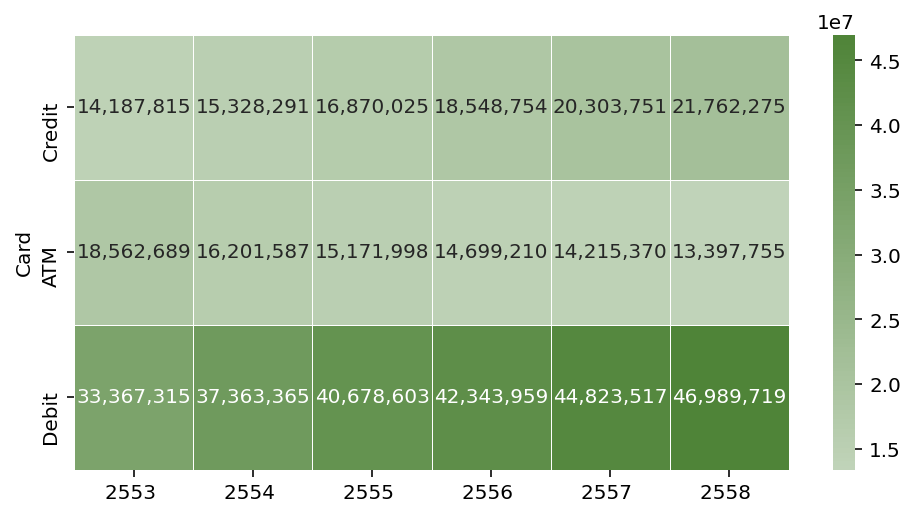

In [145]:
plt.figure(figsize=(8,4))
cmap = sns.diverging_palette(h_neg=0, h_pos=120, as_cmap=True) # hue
sns.heatmap(df,
            center=0,
            annot=True, fmt=',.0f',#คอมม่าเเละทศนิยม 3 ตำ่เเหน่ง
            linewidths=.5,
            cmap=cmap)

In [146]:
IFrame("https://en.wikipedia.org/wiki/Hue", width=640, height=240) #กำหนดสี

In [147]:
df=df.applymap(lambda n: n / 1e6).round(1)

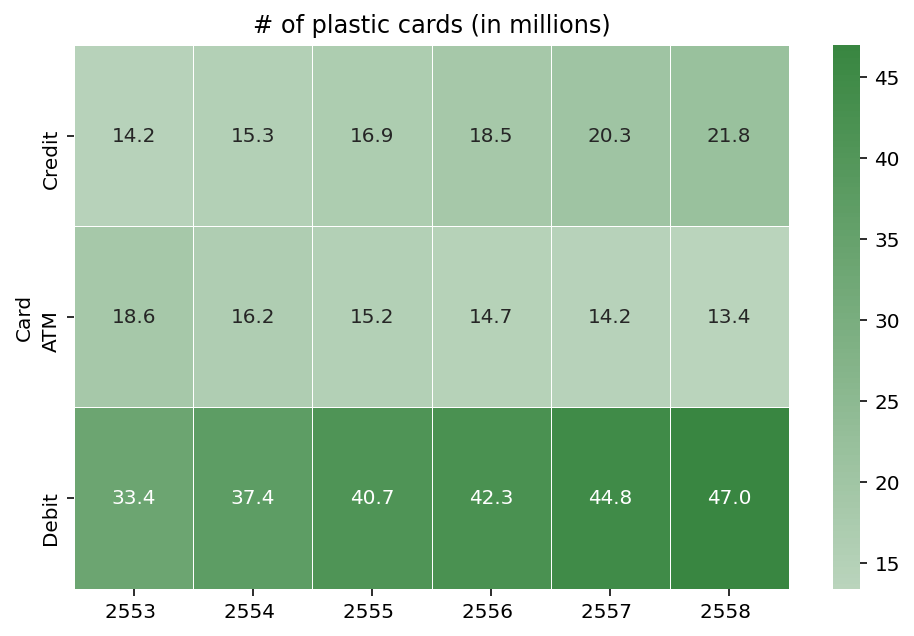

In [148]:
plt.figure(figsize=(8,5))
cmap = sns.diverging_palette(h_neg=110, h_pos=130, as_cmap=True) # cmap = color map
sns.heatmap(df,
            annot=True, fmt='.1f',
            center=0,
            linewidths=.5,
            cmap=cmap)
plt.title('# of plastic cards (in millions)');

## Monthly sales

In [149]:
import calendar
df=pd.DataFrame(np.random.randint(low=10, high=101, size=(3, 12)),
                index=['mocha', 'latte', 'espresso'],
                columns=[calendar.month_abbr[i] for i in range(1, 13)])#สร้างเดือน
df

Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
mocha      14   55   97   60   10   83   19   92   22   22   13   56
latte      60   35   83   87   16   47   33   44   76   47   27   84
espresso   97   31   65   23   90   56   14   82   18   92   52   17

<AxesSubplot:>

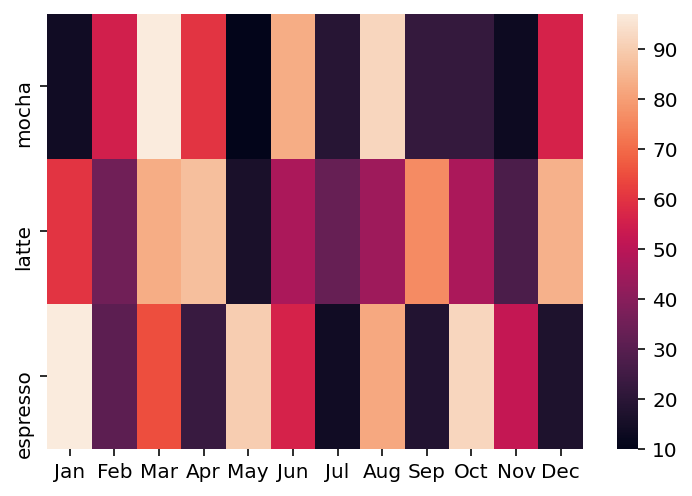

In [150]:
sns.heatmap(df)

<AxesSubplot:>

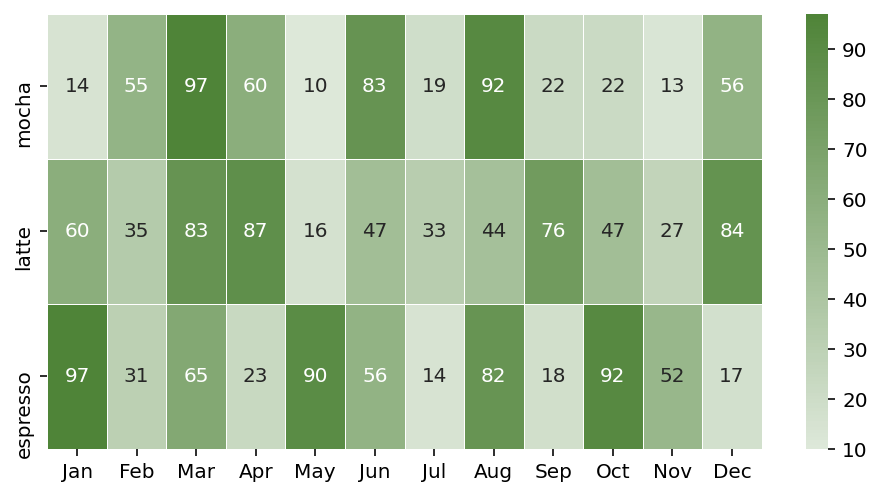

In [151]:
plt.figure(figsize=(8,4))
cmap = sns.diverging_palette(h_neg=0, h_pos=120, as_cmap=True)
sns.heatmap(df,
            center=0,
            annot=True, fmt='.0f',
            linewidths=.5,
            cmap=cmap)

In [152]:
import calendar
df=pd.DataFrame(np.random.randint(low=-50, high=101, size=(3, 12)),
                index=['mocha', 'latte', 'espresso'],
                columns=[calendar.month_abbr[i] for i in range(1, 13)])
df

Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
mocha     -37   25   69   -2   91   34   12    7  -31  -47   -6   81
latte      24   48   40  -27   -3   88   16  -44    7   -6    0   37
espresso   32   52  -22  -17   71   77   77  -24  -19   10   47   70

<AxesSubplot:>

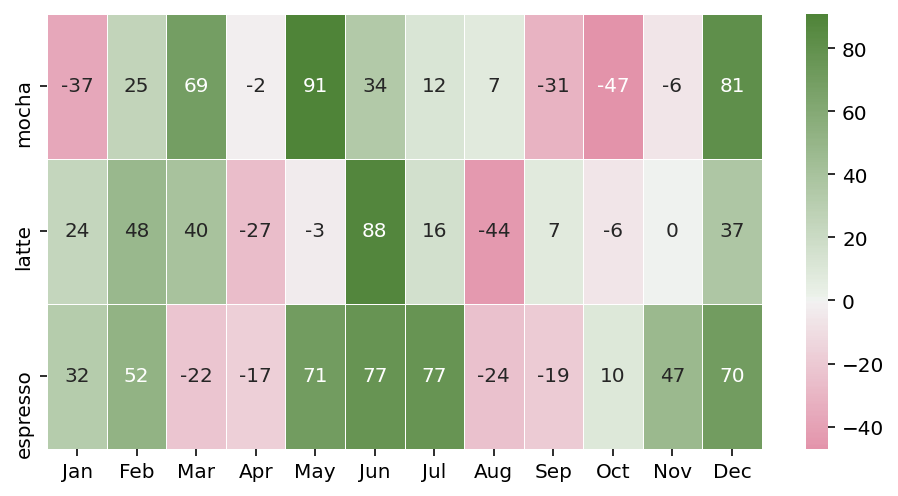

In [153]:
plt.figure(figsize=(8,4))
cmap = sns.diverging_palette(h_neg=0, h_pos=120, as_cmap=True)
sns.heatmap(df,
            center=0,
            annot=True, fmt='.0f',
            linewidths=.5,
            cmap=cmap)

In [154]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

In [155]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.head()

manufacturer model  displ  year  cyl       trans    drv  cty  hwy fl  \
0         audi    a4    1.8  1999    4    auto(l5)  front   18   29  p   
1         audi    a4    1.8  1999    4  manual(m5)  front   21   29  p   
2         audi    a4    2.0  2008    4  manual(m6)  front   20   31  p   
3         audi    a4    2.0  2008    4    auto(av)  front   21   30  p   
4         audi    a4    2.8  1999    6    auto(l5)  front   16   26  p   

     class    gear  
0  compact    auto  
1  compact  manual  
2  compact  manual  
3  compact    auto  
4  compact    auto

## create heatmap from crosstab table

In [156]:
xtab=pd.crosstab(df.trans, df['class'])
xtab
#sns.heatmap(xtab)

class       2seater  compact  midsize  minivan  pickup  subcompact  suv
trans                                                                  
auto(av)          0        2        3        0       0           0    0
auto(l3)          0        1        0        1       0           0    0
auto(l4)          1        8       14        8      12          11   29
auto(l5)          0        4        5        0       8           4   18
auto(l6)          0        0        0        2       0           0    4
auto(s4)          0        2        1        0       0           0    0
auto(s5)          0        2        0        0       0           0    1
auto(s6)          1        5        6        0       0           1    3
manual(m5)        0       18        9        0       8          16    7
manual(m6)        3        5        3        0       5           3    0

<AxesSubplot:xlabel='class', ylabel='trans'>

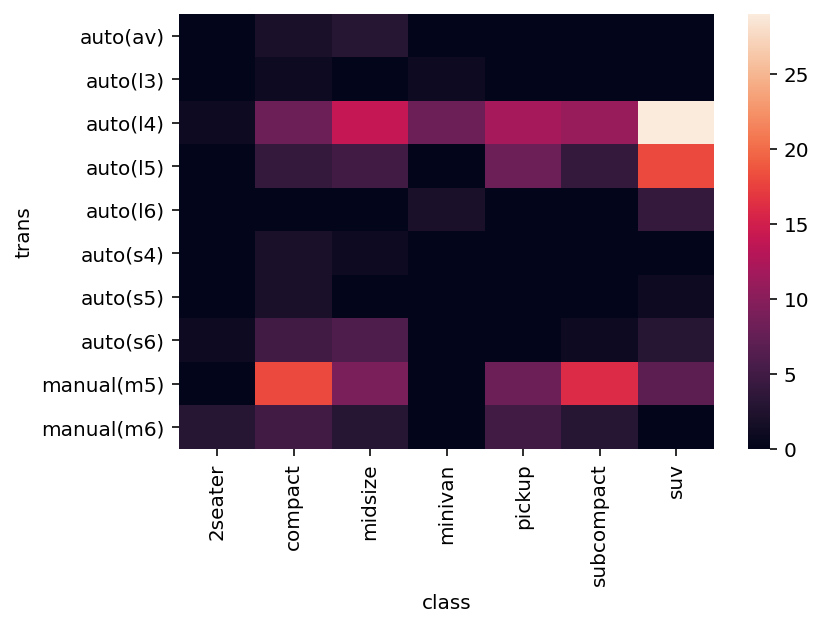

In [157]:
sns.heatmap(xtab)

<AxesSubplot:xlabel='class', ylabel='trans'>

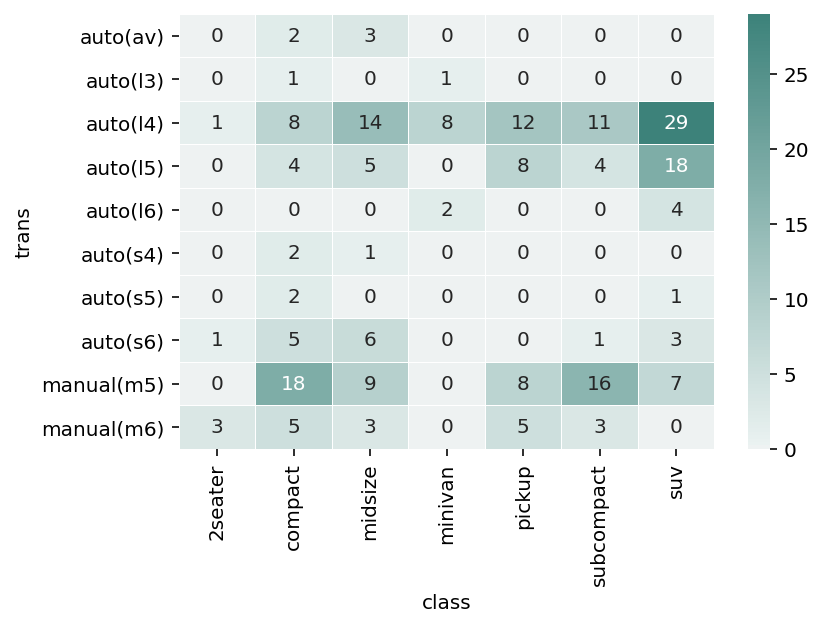

In [158]:
cmap = sns.diverging_palette(h_neg=160, h_pos=180, as_cmap=True)
sns.heatmap(xtab,
            center=0,
            annot=True, fmt='.0f',
            linewidths=.5,
            cmap=cmap)

# Correlation Matrix

In [159]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

In [160]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.head()

manufacturer model  displ  year  cyl       trans    drv  cty  hwy fl  \
0         audi    a4    1.8  1999    4    auto(l5)  front   18   29  p   
1         audi    a4    1.8  1999    4  manual(m5)  front   21   29  p   
2         audi    a4    2.0  2008    4  manual(m6)  front   20   31  p   
3         audi    a4    2.0  2008    4    auto(av)  front   21   30  p   
4         audi    a4    2.8  1999    6    auto(l5)  front   16   26  p   

     class    gear  
0  compact    auto  
1  compact  manual  
2  compact  manual  
3  compact    auto  
4  compact    auto

In [161]:
df.corr()

displ      year       cyl       cty       hwy
displ  1.000000  0.147843  0.930227 -0.798524 -0.766020
year   0.147843  1.000000  0.122245 -0.037232  0.002158
cyl    0.930227  0.122245  1.000000 -0.805771 -0.761912
cty   -0.798524 -0.037232 -0.805771  1.000000  0.955916
hwy   -0.766020  0.002158 -0.761912  0.955916  1.000000

In [162]:
dg=df[['displ', 'cyl', 'cty', 'hwy']].corr()
dg

displ       cyl       cty       hwy
displ  1.000000  0.930227 -0.798524 -0.766020
cyl    0.930227  1.000000 -0.805771 -0.761912
cty   -0.798524 -0.805771  1.000000  0.955916
hwy   -0.766020 -0.761912  0.955916  1.000000

<AxesSubplot:>

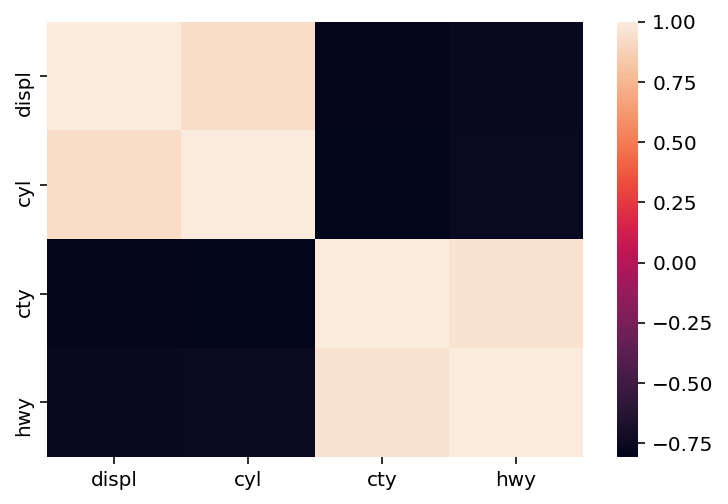

In [163]:
sns.heatmap(dg)

In [164]:
mask = np.zeros_like(dg)
mask

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [165]:
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

<AxesSubplot:>

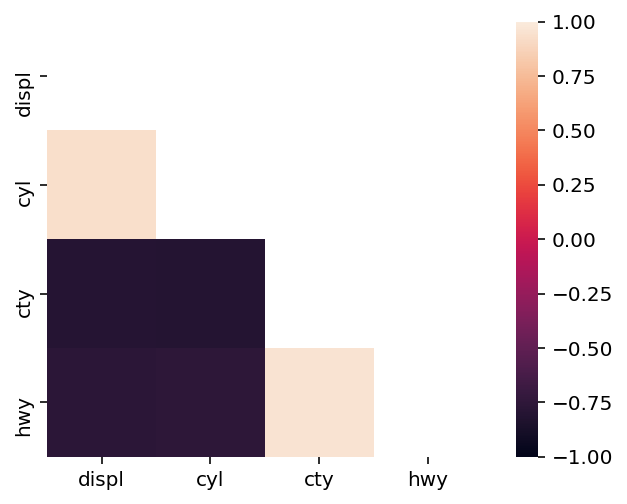

In [166]:
sns.heatmap(dg, mask=mask, vmin=-1, vmax=1, square=True)

<AxesSubplot:>

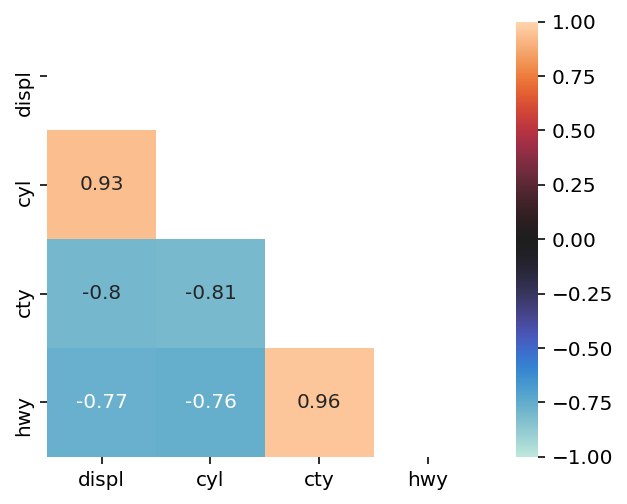

In [167]:
sns.heatmap(dg, mask=mask, vmin=-1, vmax=1, square=True,
            center=0,
            annot=True)

<AxesSubplot:>

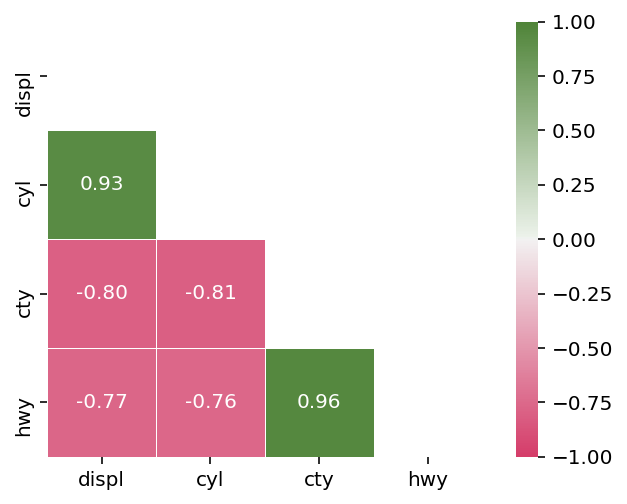

In [168]:
# http://seaborn.pydata.org/tutorial/color_palettes.html
# use hsl color in PowerPoint 
cmap = sns.diverging_palette(h_neg=0, h_pos=120, as_cmap=True)
sns.heatmap(dg, mask=mask, vmin=-1, vmax=1, square=True,
            center=0,
            annot=True, fmt='.2f',
            linewidths=.5,
            cmap=cmap)

# background color bands axhspan

In [169]:
df=pd.DataFrame({'product': list('ABCDEFGHIJKL'), 
                 'sales': np.random.normal(55, 15, 12)})
df

product      sales
0        A  61.338636
1        B  54.893881
2        C  41.664948
3        D  82.575637
4        E  54.072178
5        F  67.936032
6        G  60.130239
7        H  43.816414
8        I  53.604469
9        J  41.371279
10       K  69.641110
11       L  71.278444

<AxesSubplot:xlabel='product', ylabel='sales'>

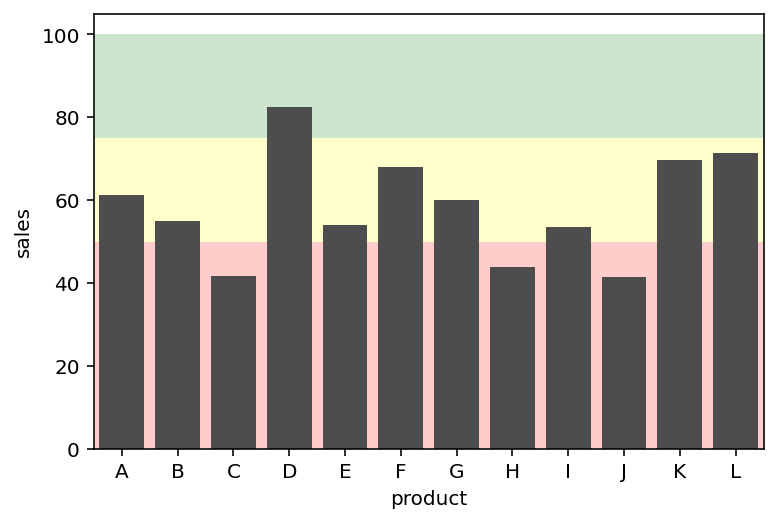

In [170]:
# sns.set(rc={'figure.figsize':(10, 6)})
alpha=.2
# plt.axhline(50, color="red", linestyle="--", linewidth=3)
plt.axhspan(0, 50, facecolor='red', alpha=alpha)
plt.axhspan(50, 75, facecolor='yellow', alpha=alpha)
plt.axhspan(75, 100, facecolor='green', alpha=alpha)
sns.barplot(data=df, x='product', y='sales', color='.3')

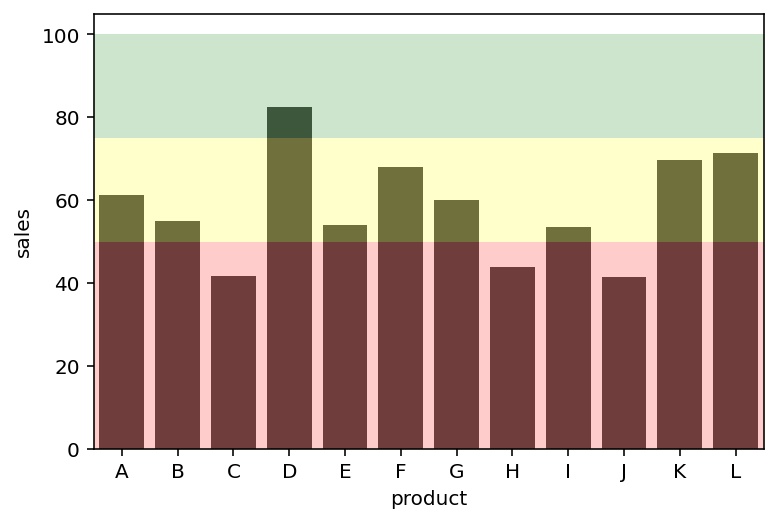

In [171]:
# sns.set(rc={'figure.figsize':(10, 6)})
alpha=.2
# plt.axhline(50, color="red", linestyle="--", linewidth=3)
sns.barplot(data=df, x='product', y='sales', color='.3')
plt.axhspan(0, 50, facecolor='red', alpha=alpha)
plt.axhspan(50, 75, facecolor='yellow', alpha=alpha)
plt.axhspan(75, 100, facecolor='green', alpha=alpha)

In [172]:
mu=55
sigma=15
s = np.random.normal(mu, sigma, 30)
s

array([49.19213442, 33.17660074, 60.36607523, 47.14997539, 56.07797544,
       71.49375286, 34.92370608, 34.46297533, 63.14116098, 63.48264655,
       76.56623208, 22.99906913, 58.15727538, 29.35762853, 30.05596891,
       23.56732177, 34.93547438, 48.27895841, 52.11678384, 54.1802275 ,
       51.46595494, 70.8949419 , 52.82550079, 81.99157555, 51.22832409,
       57.8039289 , 58.1731553 , 27.89967071, 48.24121332, 79.96422422])

In [173]:
pd.date_range(start='2019-01-01', periods=len(s))

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30'],
              dtype='datetime64[ns]', freq='D')

In [174]:
# d= {'date': pd.date_range(start='2019-01-01', periods=len(s)), 'sales': s}
df=pd.DataFrame({'date': pd.date_range(start='2019-01-01', periods=len(s)), 
                 'sales': s})
df.head()

date      sales
0 2019-01-01  49.192134
1 2019-01-02  33.176601
2 2019-01-03  60.366075
3 2019-01-04  47.149975
4 2019-01-05  56.077975

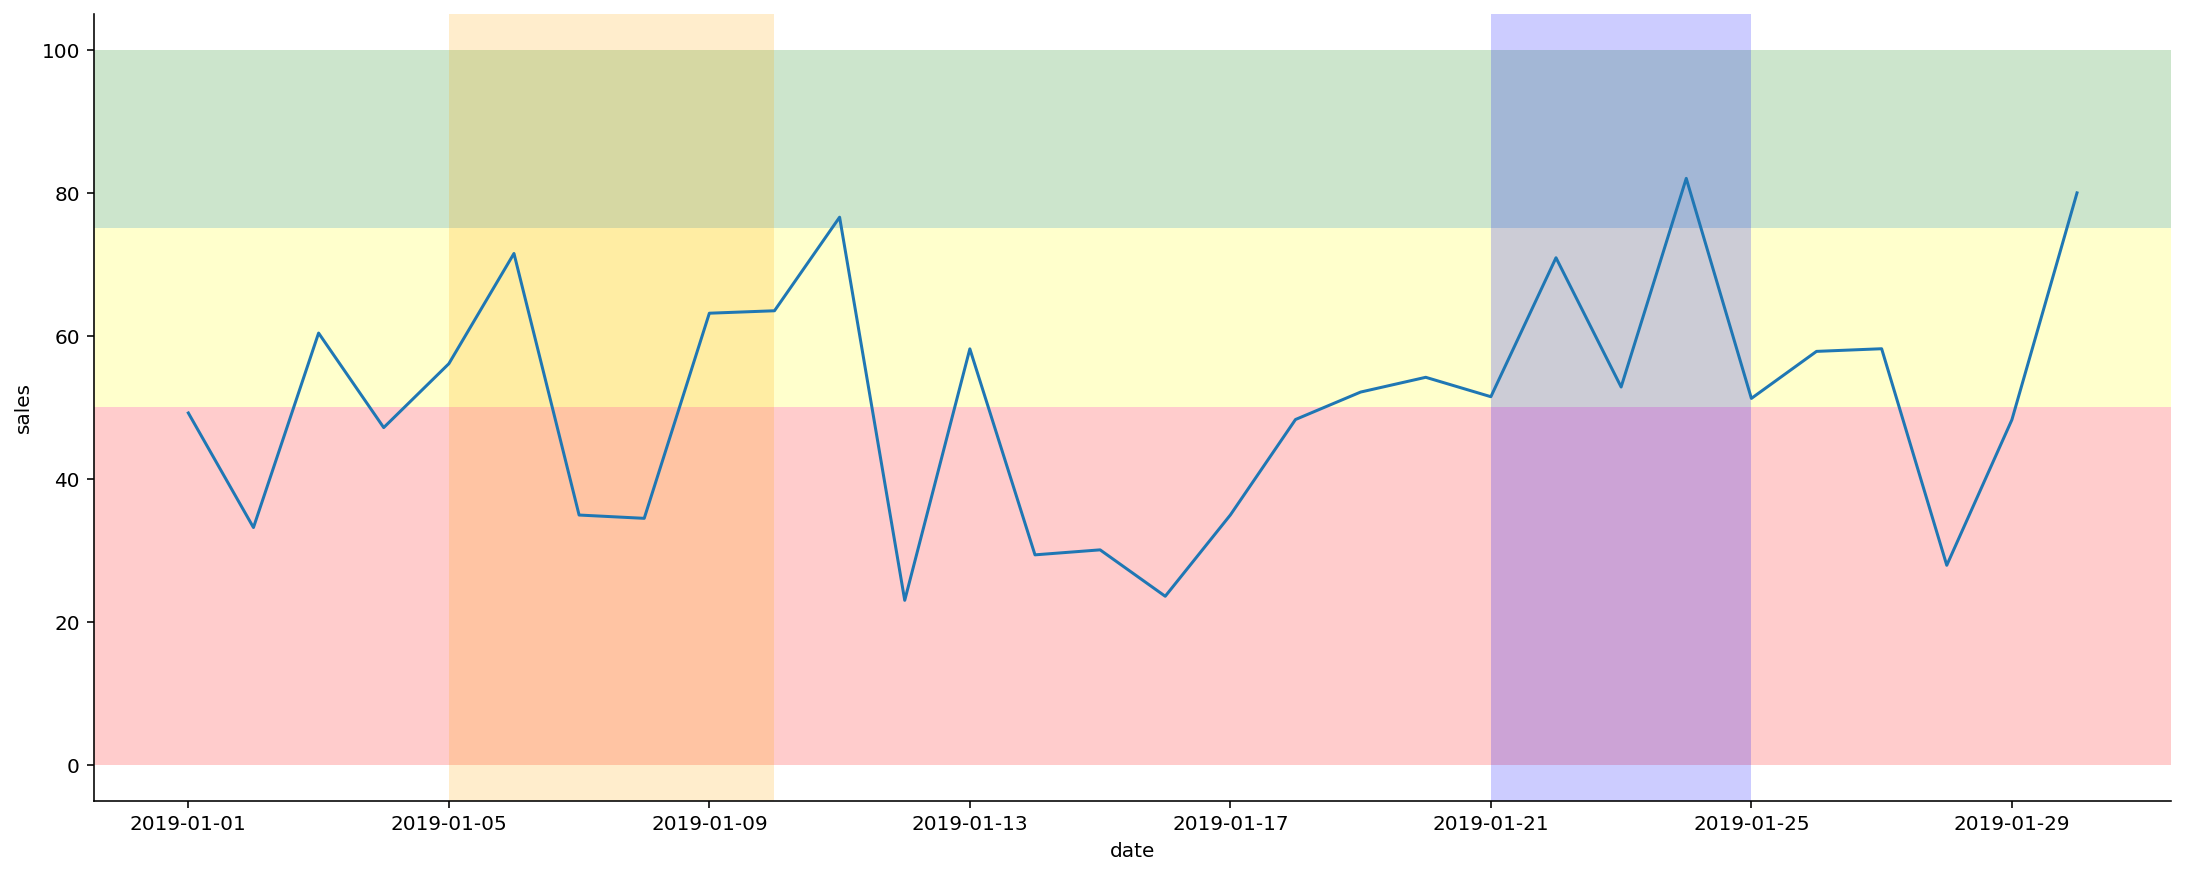

In [175]:
alpha=.2
sns.relplot(data=df, x='date', y='sales', kind='line',
            height=6, aspect=2.5)
plt.axhspan(0, 50, facecolor='red', alpha=alpha)
plt.axhspan(50, 75, facecolor='yellow', alpha=alpha)
plt.axhspan(75, 100, facecolor='green', alpha=alpha)
plt.axvspan('2019-01-05', '2019-01-10', facecolor='orange', alpha=alpha)
plt.axvspan('2019-01-21', '2019-01-25', facecolor='blue', alpha=alpha)

In [176]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.head()

manufacturer model  displ  year  cyl       trans    drv  cty  hwy fl  \
0         audi    a4    1.8  1999    4    auto(l5)  front   18   29  p   
1         audi    a4    1.8  1999    4  manual(m5)  front   21   29  p   
2         audi    a4    2.0  2008    4  manual(m6)  front   20   31  p   
3         audi    a4    2.0  2008    4    auto(av)  front   21   30  p   
4         audi    a4    2.8  1999    6    auto(l5)  front   16   26  p   

     class    gear  
0  compact    auto  
1  compact  manual  
2  compact  manual  
3  compact    auto  
4  compact    auto

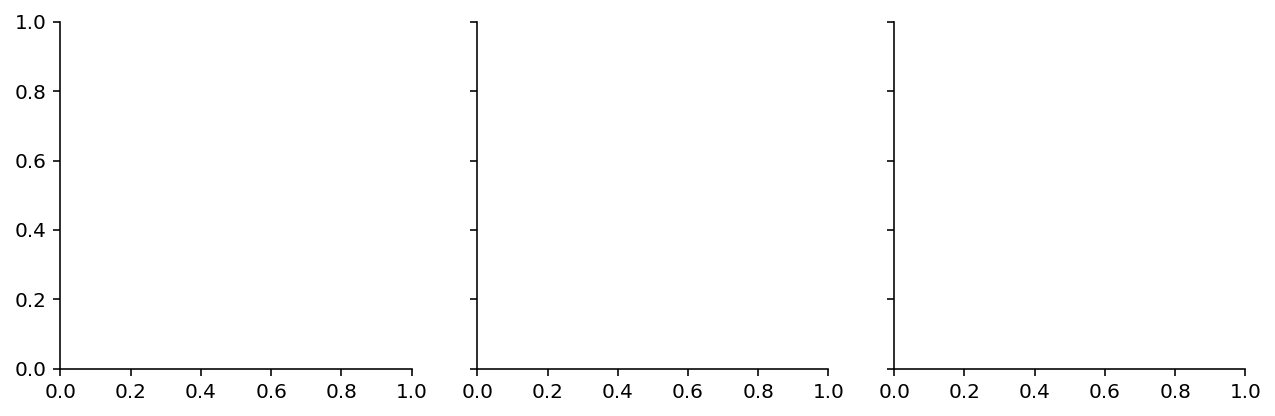

In [177]:
g = sns.FacetGrid(df, col='drv')
g


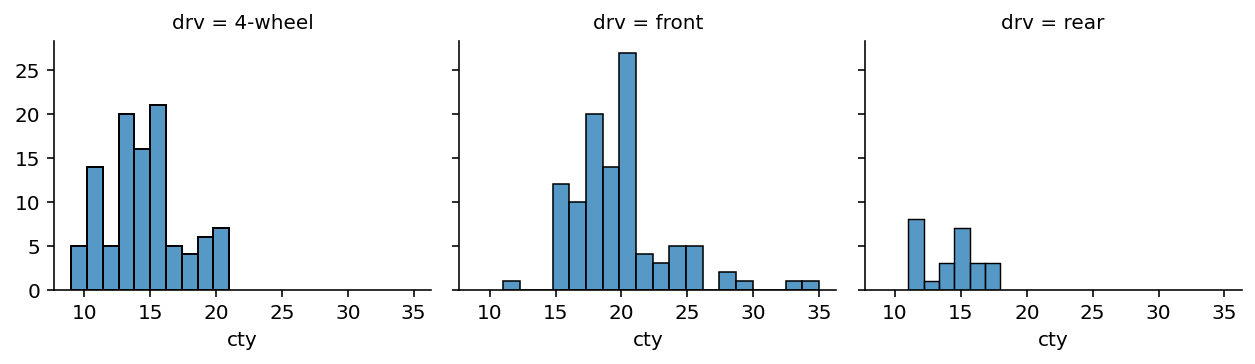

In [178]:
g.map(sns.histplot, 'cty')

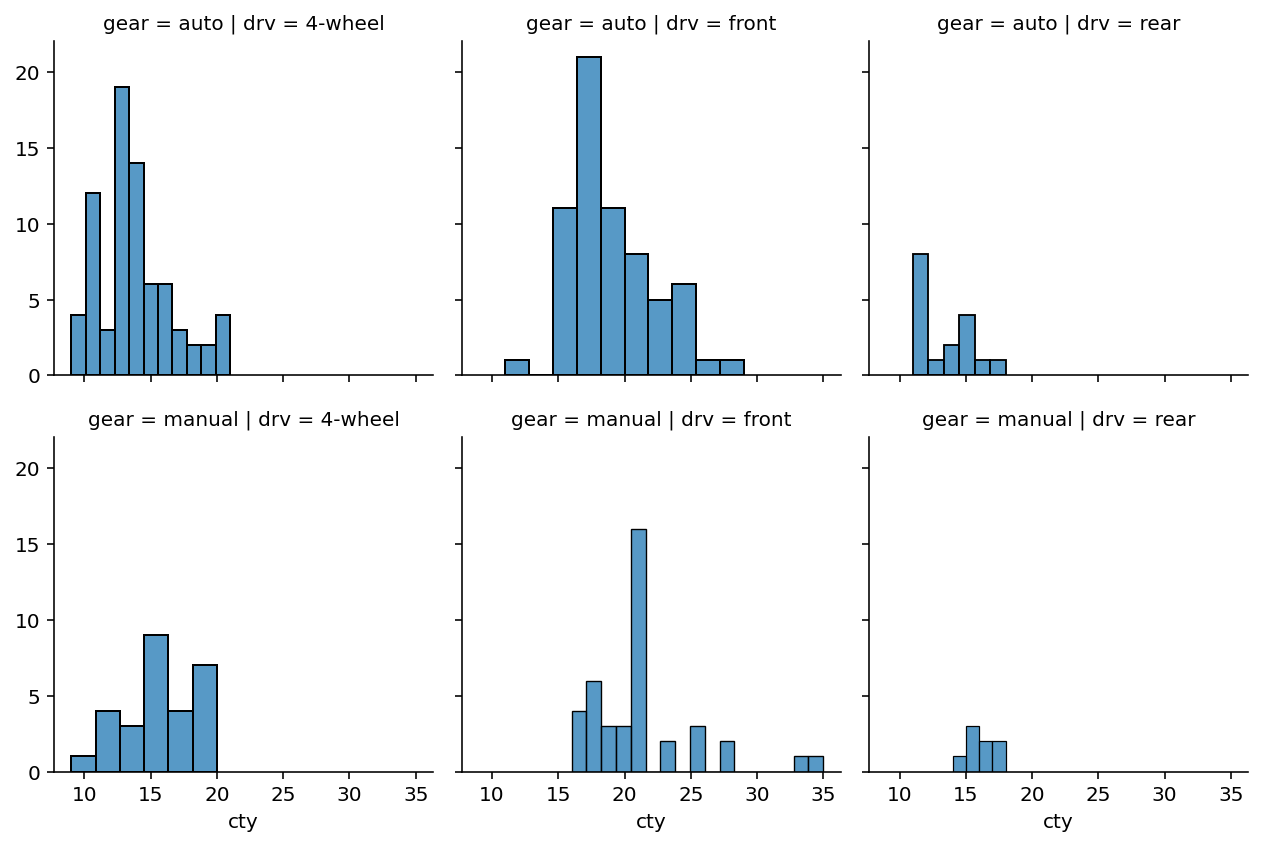

In [179]:
g = sns.FacetGrid(df, row='gear', col='drv')
g.map(sns.histplot, 'cty')

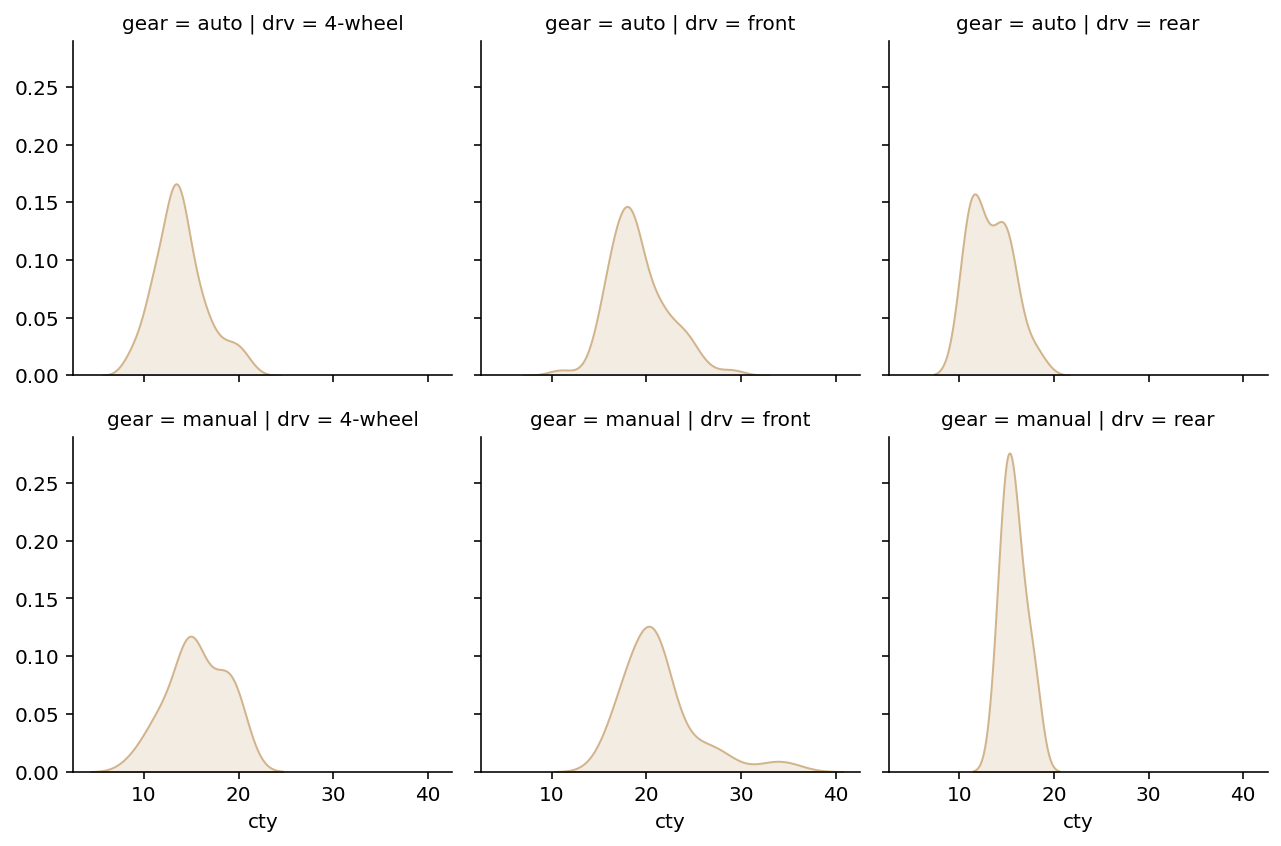

In [180]:
g = sns.FacetGrid(df, row='gear', col='drv')
g.map(sns.kdeplot, 'cty', shade=True, color='tan')

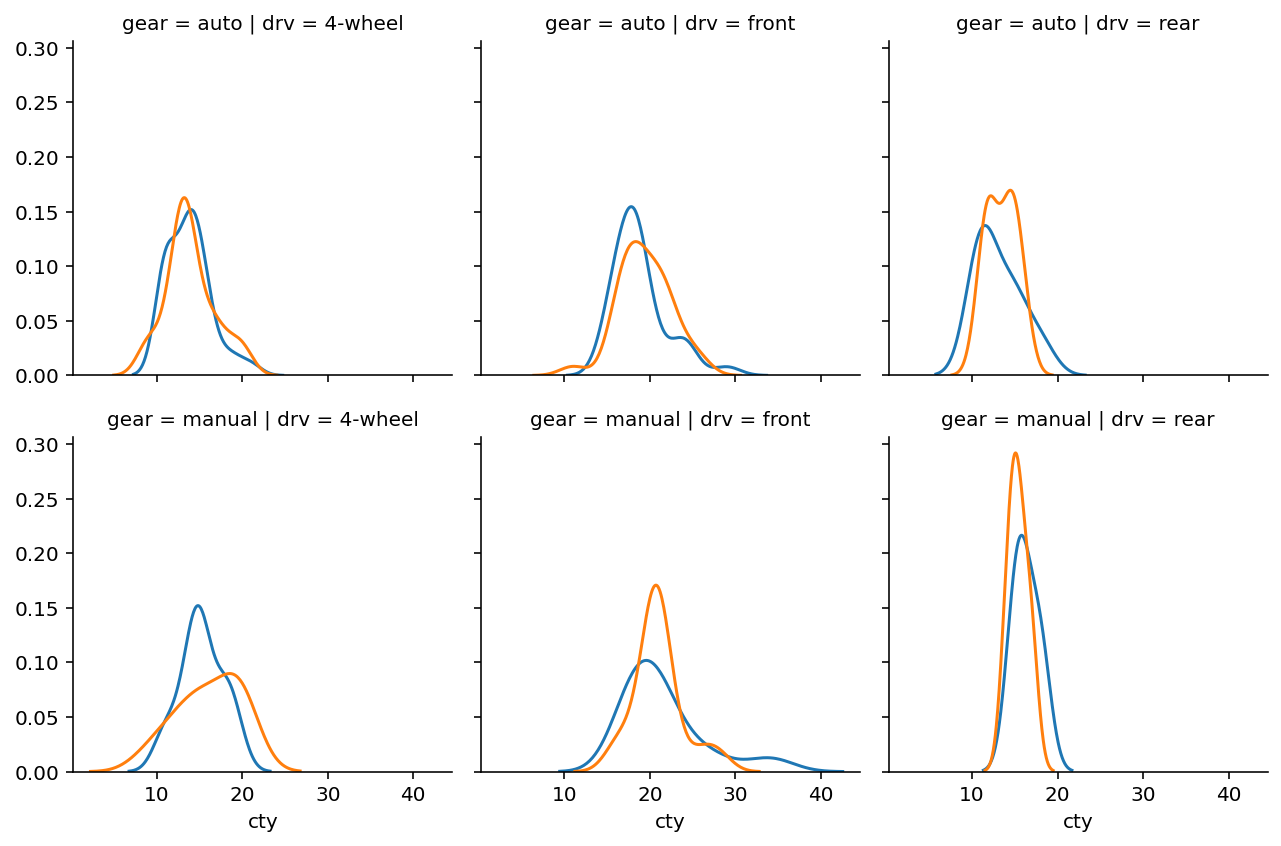

In [181]:
g = sns.FacetGrid(df, row='gear', col='drv', hue='year')
g.map(sns.kdeplot, 'cty')

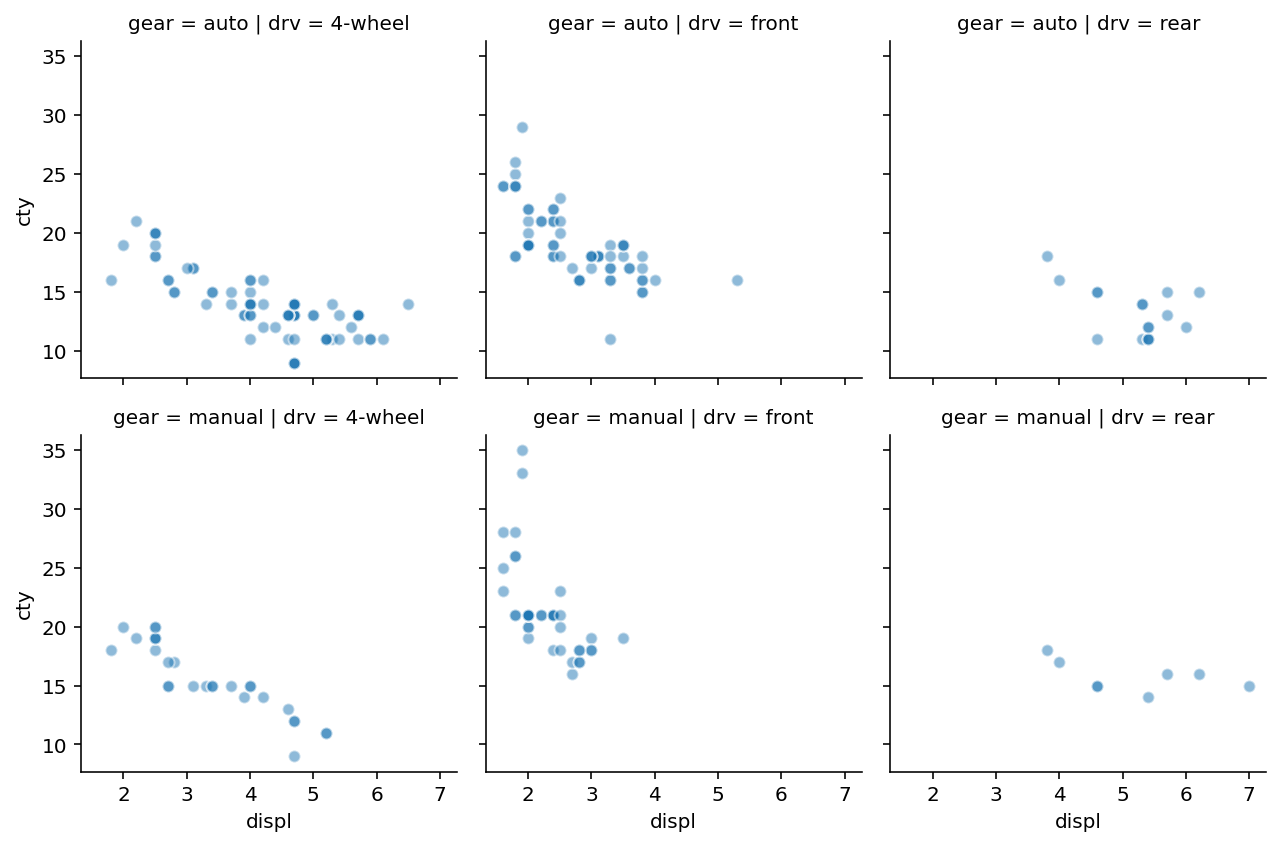

In [182]:
# use native matplotlib plt.scatter
g = sns.FacetGrid(df, row='gear', col='drv')
g.map(plt.scatter, "displ", "cty", alpha=.5, edgecolor='white')

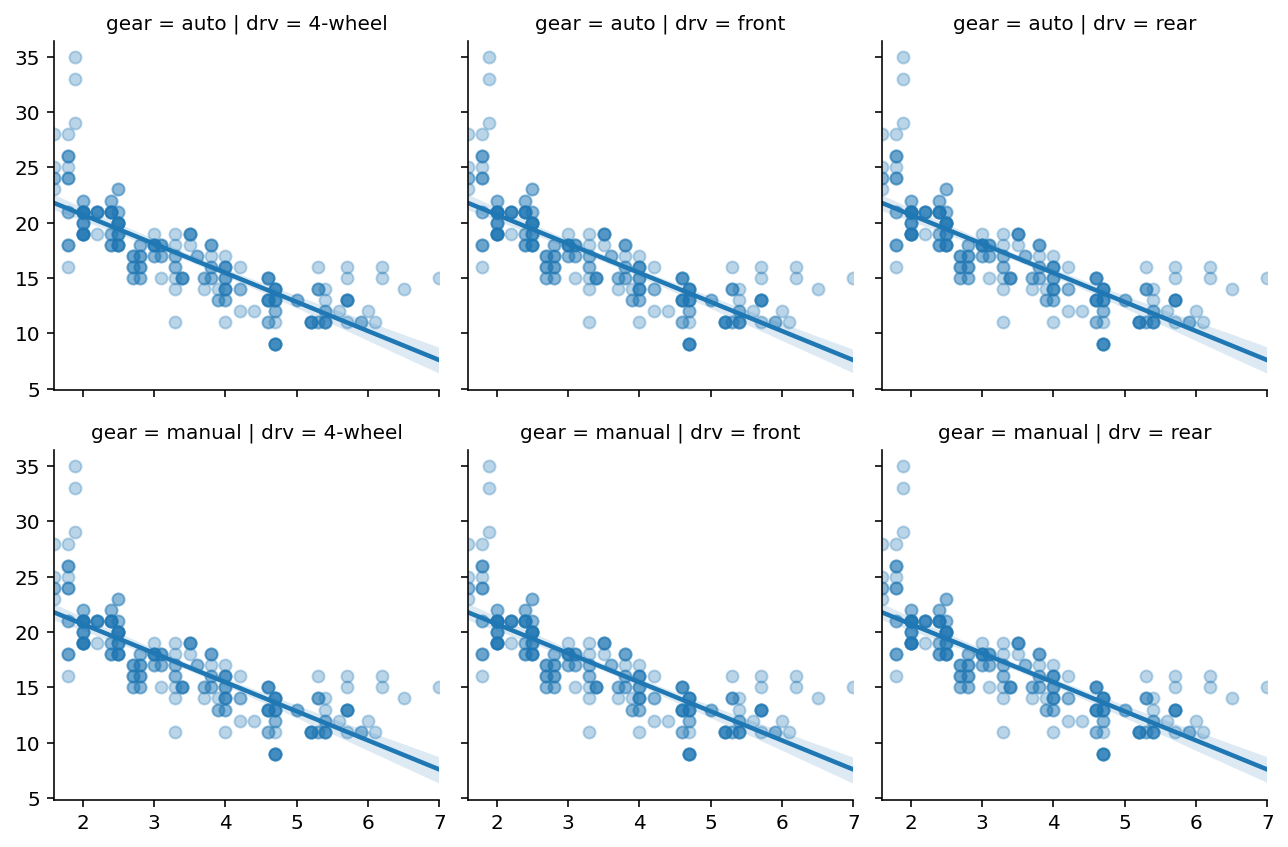

In [183]:
g = sns.FacetGrid(df, row='gear', col='drv')
g.map(sns.regplot, x='displ', y='cty', data=df, fit_reg=True, scatter_kws={'alpha':.3})

# subplots เเต่ละกราฟหน้าตาไม่ต้องเหมือนกัน

In [184]:
df['cty_kml'] = (df.cty * 0.425144).round(0)
df['hwy_kml'] = (df.hwy * 0.425144).round(0)

C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be place

<AxesSubplot:xlabel='count', ylabel='gear'>

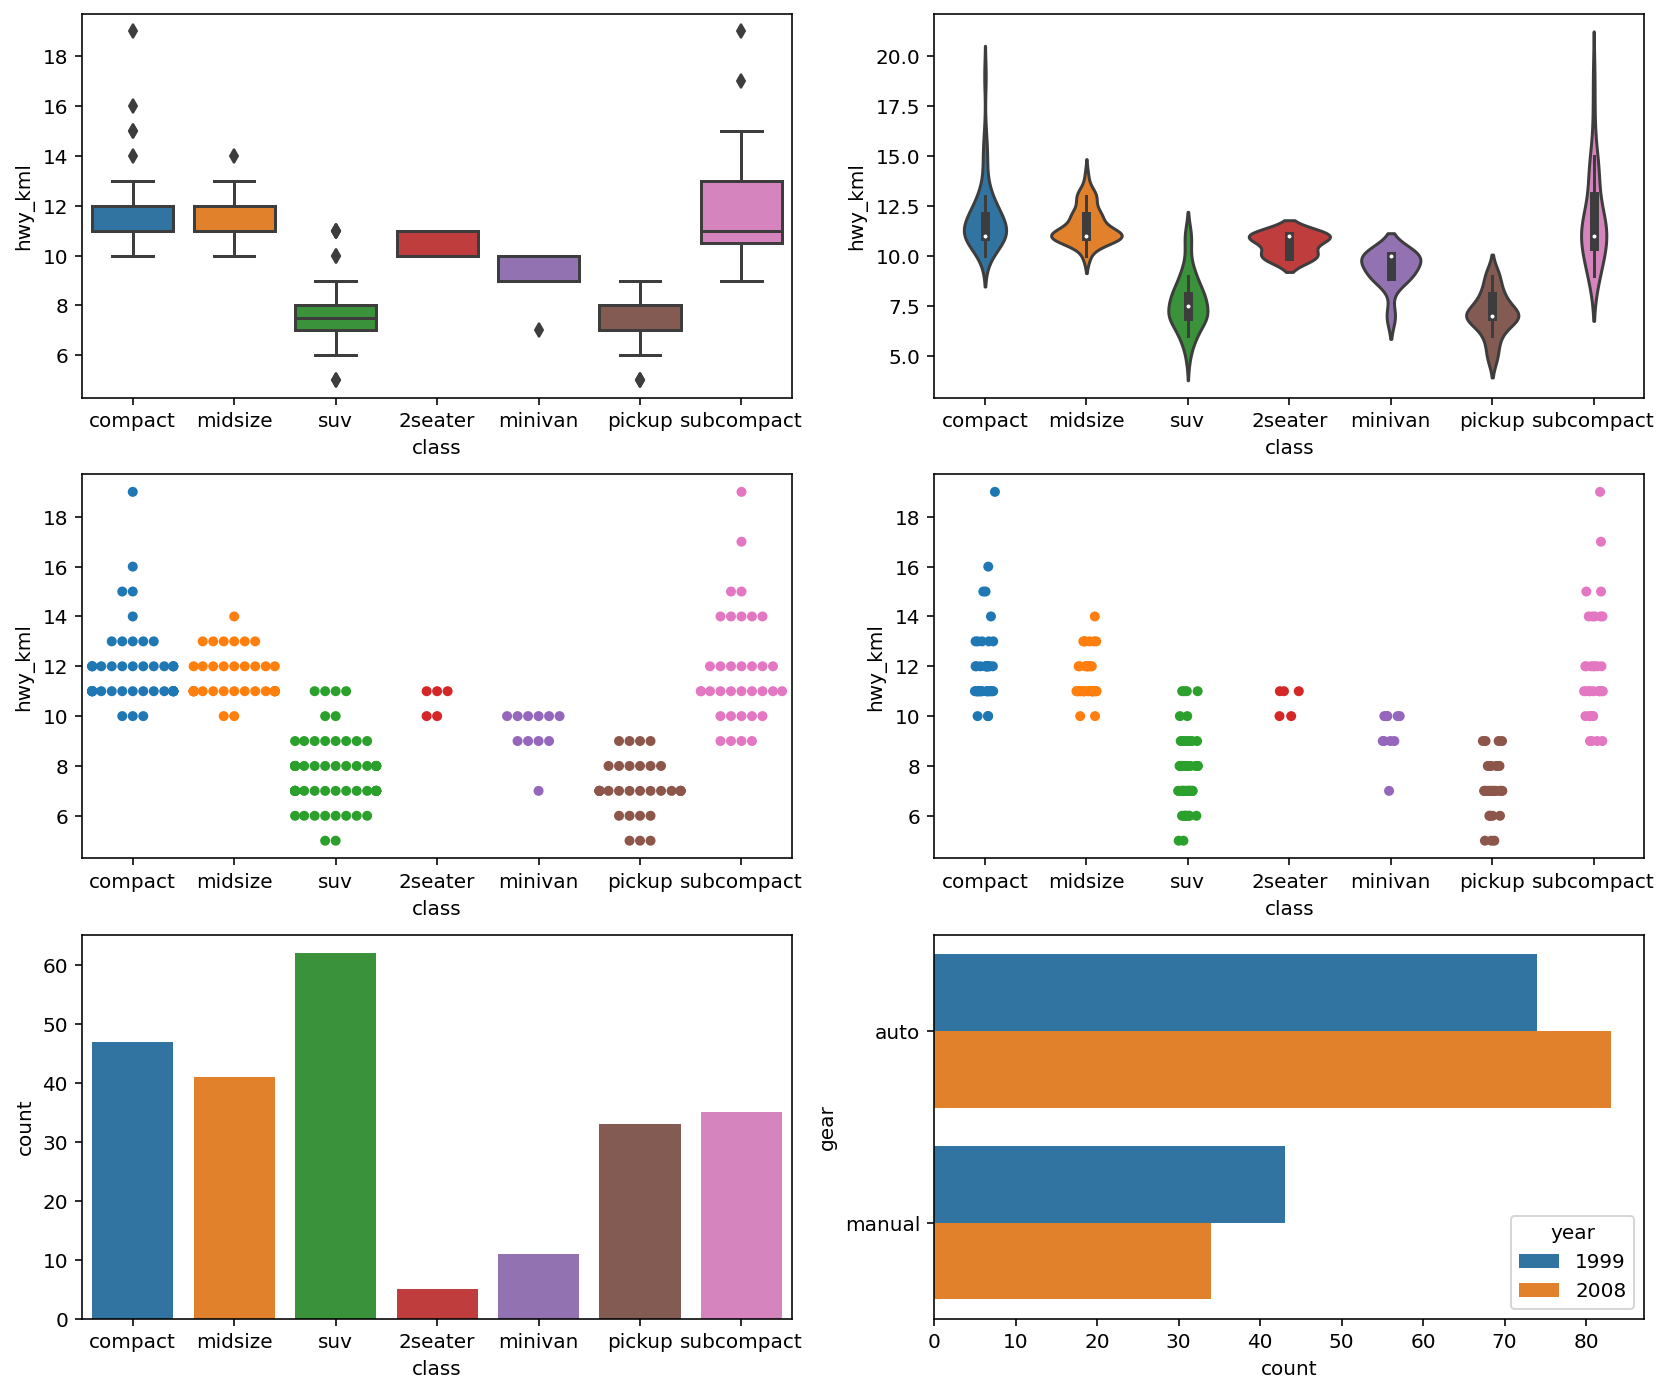

In [185]:
x_col="class"
y_col="hwy_kml"

fig = plt.figure(figsize=(14,12))
fig.add_subplot(321)
sns.boxplot(x=x_col, y=y_col, data=df)
fig.add_subplot(322)
sns.violinplot(x=x_col, y=y_col, data=df)
fig.add_subplot(323)
sns.swarmplot(x=x_col, y=y_col, data=df)
fig.add_subplot(324)
sns.stripplot(x=x_col, y=y_col, data=df)
fig.add_subplot(325)
sns.countplot(x="class", data=df)
fig.add_subplot(326)
sns.countplot(y="gear", hue="year", data=df)

(2, 2)


C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\61307\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be place

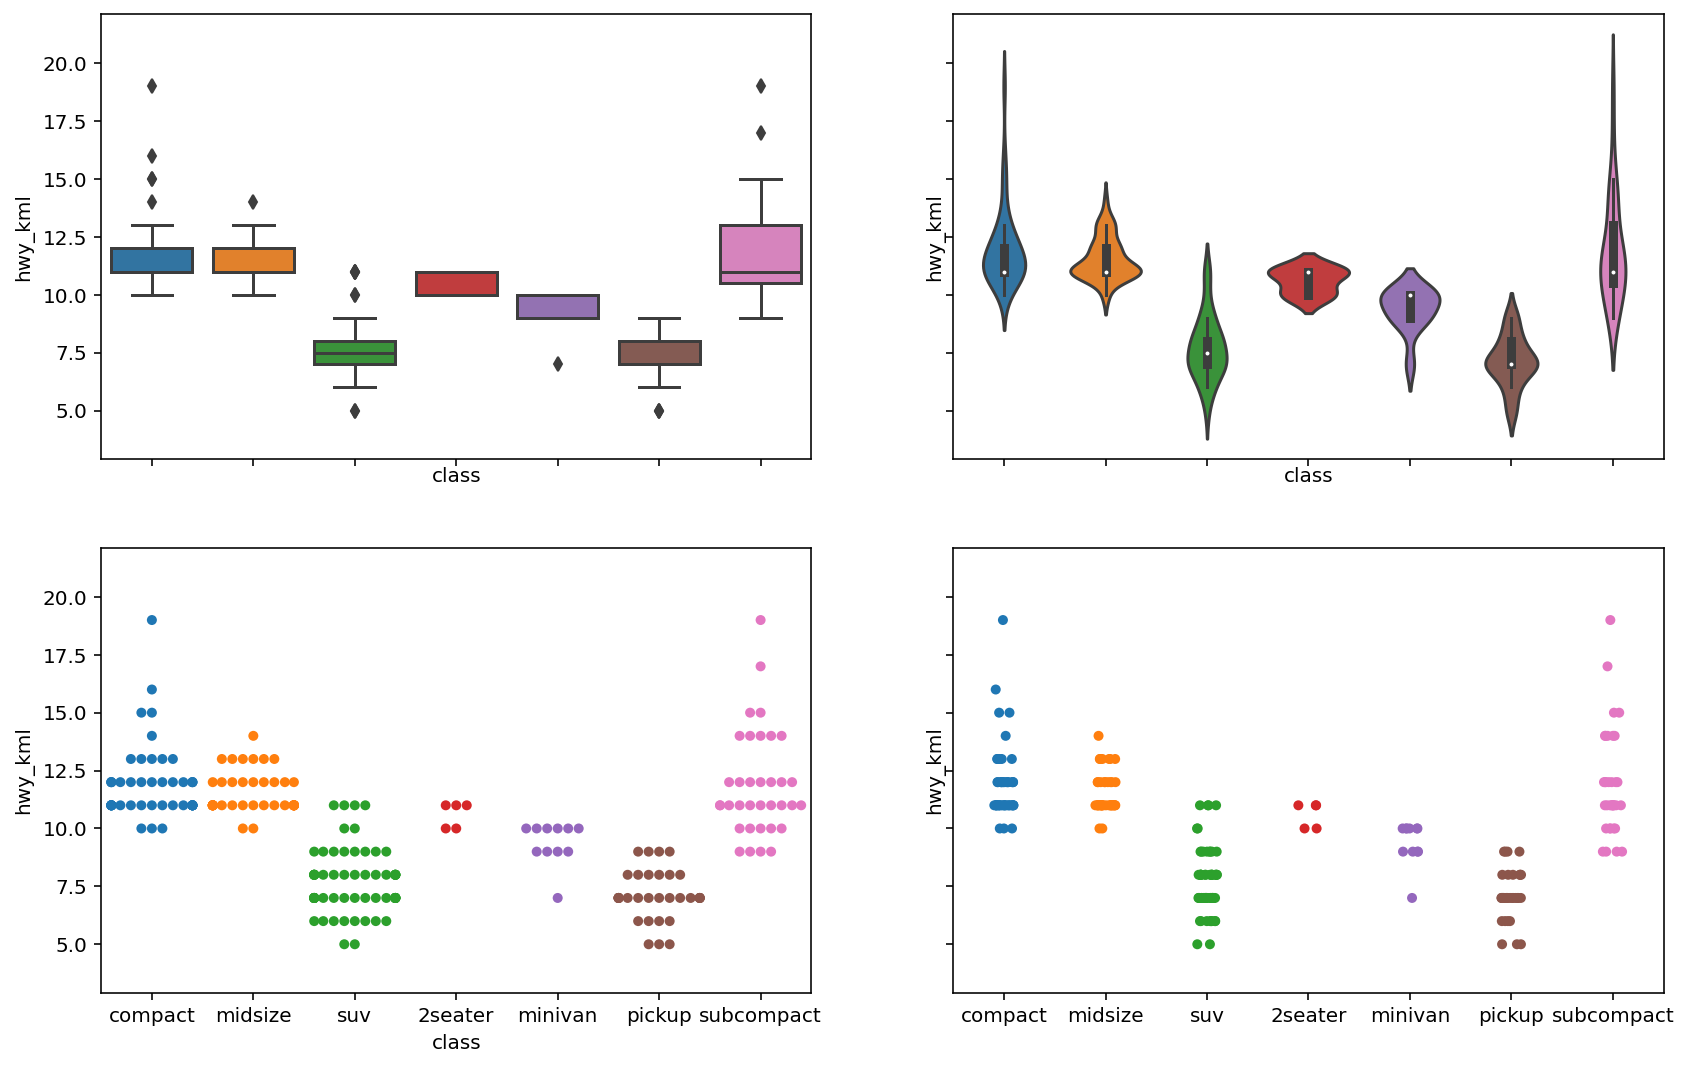

In [186]:
#อีกวิธี

fig, ax = plt.subplots(2, 2, figsize=(14,9), sharey=True, sharex=True) #สามารถเเชรเเกนได้
#fig, ax = plt.subplots(3, 2, figsize=(14,12))

print(ax.shape)
x_col="class"
y_col="hwy_kml"
sns.boxplot(x=x_col, y=y_col, data=df, ax=ax[0,0])
sns.violinplot(x=x_col, y=y_col, data=df, ax=ax[0,1])
sns.swarmplot(x=x_col, y=y_col, data=df, ax=ax[1,0])
sns.stripplot(x=x_col, y=y_col, data=df, ax=ax[1,1])
#sns.kdeplot(df[y_col], ax=ax[2,0])
#sns.distplot(df[y_col], ax=ax[2,1])
plt.xlabel("");

# Cleveland dot plot

In [187]:
dg=df[(df['class']=='midsize') & 
      (df.gear == 'auto') & 
      (df.year == 2008)].sort_values(by='cty', ascending=False)
dg

manufacturer       model  displ  year  cyl     trans      drv  cty  hwy  \
143       nissan      altima    2.5  2008    4  auto(av)    front   23   31   
33     chevrolet      malibu    2.4  2008    4  auto(l4)    front   22   30   
110      hyundai      sonata    2.4  2008    4  auto(l4)    front   21   30   
182       toyota       camry    2.4  2008    4  auto(l5)    front   21   31   
114      hyundai      sonata    3.3  2008    6  auto(l5)    front   19   28   
146       nissan      altima    3.5  2008    6  auto(av)    front   19   26   
149       nissan      maxima    3.5  2008    6  auto(av)    front   19   25   
185       toyota       camry    3.5  2008    6  auto(s6)    front   19   28   
229   volkswagen      passat    2.0  2008    4  auto(s6)    front   19   28   
35     chevrolet      malibu    3.5  2008    6  auto(l4)    front   18   29   
157      pontiac  grand prix    3.8  2008    6  auto(l4)    front   18   28   
16          audi  a6 quattro    3.1  2008    6  auto(s6)  4-wheel   17   25   
36     chevrolet      malibu    3.6  2008    6  auto(s6)    front   17   26   
233   volkswagen      passat    3.6  2008    6  auto(s6)    front   17   26   
17          audi  a6 quattro    4.2  2008    8  auto(s6)  4-wheel   16   23   
158      pontiac  grand prix    5.3  2008    8  auto(s4)    front   16   25   

    fl    class  gear  cty_kml  hwy_kml  
143  r  midsize  auto     10.0     13.0  
33   r  midsize  auto      9.0     13.0  
110  r  midsize  auto      9.0     13.0  
182  r  midsize  auto      9.0     13.0  
114  r  midsize  auto      8.0     12.0  
146  p  midsize  auto      8.0     11.0  
149  p  midsize  auto      8.0     11.0  
185  r  midsize  auto      8.0     12.0  
229  p  midsize  auto      8.0     12.0  
35   r  midsize  auto      8.0     12.0  
157  r  midsize  auto      8.0     12.0  
16   p  midsize  auto      7.0     11.0  
36   r  midsize  auto      7.0     11.0  
233  p  midsize  auto      7.0     11.0  
17   p  midsize  auto      7.0     10.0  
158  p  midsize  auto      7.0     11.0

In [188]:
dg['car']=dg.apply(lambda v: f'{v.manufacturer} {v.model} {v.displ}L', axis=1)
dg

manufacturer       model  displ  year  cyl     trans      drv  cty  hwy  \
143       nissan      altima    2.5  2008    4  auto(av)    front   23   31   
33     chevrolet      malibu    2.4  2008    4  auto(l4)    front   22   30   
110      hyundai      sonata    2.4  2008    4  auto(l4)    front   21   30   
182       toyota       camry    2.4  2008    4  auto(l5)    front   21   31   
114      hyundai      sonata    3.3  2008    6  auto(l5)    front   19   28   
146       nissan      altima    3.5  2008    6  auto(av)    front   19   26   
149       nissan      maxima    3.5  2008    6  auto(av)    front   19   25   
185       toyota       camry    3.5  2008    6  auto(s6)    front   19   28   
229   volkswagen      passat    2.0  2008    4  auto(s6)    front   19   28   
35     chevrolet      malibu    3.5  2008    6  auto(l4)    front   18   29   
157      pontiac  grand prix    3.8  2008    6  auto(l4)    front   18   28   
16          audi  a6 quattro    3.1  2008    6  auto(s6)  4-wheel   17   25   
36     chevrolet      malibu    3.6  2008    6  auto(s6)    front   17   26   
233   volkswagen      passat    3.6  2008    6  auto(s6)    front   17   26   
17          audi  a6 quattro    4.2  2008    8  auto(s6)  4-wheel   16   23   
158      pontiac  grand prix    5.3  2008    8  auto(s4)    front   16   25   

    fl    class  gear  cty_kml  hwy_kml                      car  
143  r  midsize  auto     10.0     13.0       nissan altima 2.5L  
33   r  midsize  auto      9.0     13.0    chevrolet malibu 2.4L  
110  r  midsize  auto      9.0     13.0      hyundai sonata 2.4L  
182  r  midsize  auto      9.0     13.0        toyota camry 2.4L  
114  r  midsize  auto      8.0     12.0      hyundai sonata 3.3L  
146  p  midsize  auto      8.0     11.0       nissan altima 3.5L  
149  p  midsize  auto      8.0     11.0       nissan maxima 3.5L  
185  r  midsize  auto      8.0     12.0        toyota camry 3.5L  
229  p  midsize  auto      8.0     12.0   volkswagen passat 2.0L  
35   r  midsize  auto      8.0     12.0    chevrolet malibu 3.5L  
157  r  midsize  auto      8.0     12.0  pontiac grand prix 3.8L  
16   p  midsize  auto      7.0     11.0     audi a6 quattro 3.1L  
36   r  midsize  auto      7.0     11.0    chevrolet malibu 3.6L  
233  p  midsize  auto      7.0     11.0   volkswagen passat 3.6L  
17   p  midsize  auto      7.0     10.0     audi a6 quattro 4.2L  
158  p  midsize  auto      7.0     11.0  pontiac grand prix 5.3L

<AxesSubplot:xlabel='cty', ylabel='car'>

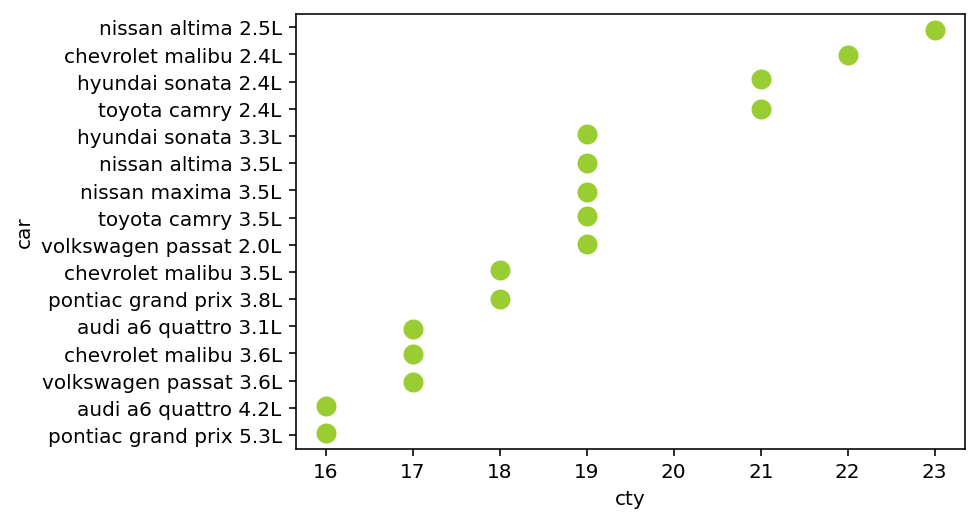

In [189]:
sns.stripplot(x='cty', y='car', data=dg, 
                  size=10, # marker size
    #               palette="Greens_r", 
                  color='yellowgreen', # https://matplotlib.org/examples/color/named_colors.html
                  edgecolor="white")

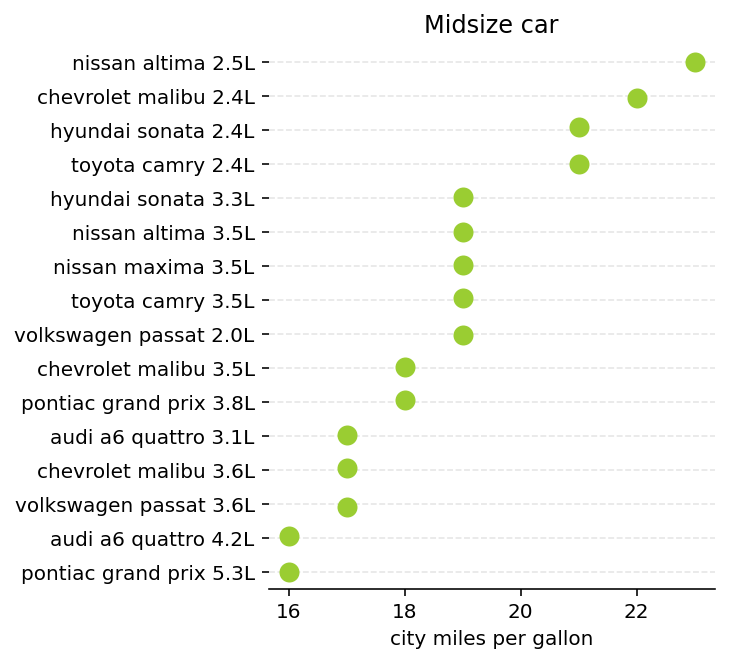

In [190]:
plt.figure(figsize=(4, 5))
ax = sns.stripplot(x='cty', y='car', data=dg, 
                  size=10, # marker size
    #               palette="Greens_r", 
                  color='yellowgreen', # https://matplotlib.org/examples/color/named_colors.html
                  edgecolor="white")
sns.despine(left=True)
ax.set_title('Midsize car')
ax.set_xlabel('city miles per gallon')
ax.set_ylabel('')
ax.yaxis.grid(True, color='.9', linestyle='--')

In [191]:
dg['efficiency']=pd.cut(dg.cty, bins=[0, 17, 20, 100], labels=['L', 'M', 'H'])
dg

manufacturer       model  displ  year  cyl     trans      drv  cty  hwy  \
143       nissan      altima    2.5  2008    4  auto(av)    front   23   31   
33     chevrolet      malibu    2.4  2008    4  auto(l4)    front   22   30   
110      hyundai      sonata    2.4  2008    4  auto(l4)    front   21   30   
182       toyota       camry    2.4  2008    4  auto(l5)    front   21   31   
114      hyundai      sonata    3.3  2008    6  auto(l5)    front   19   28   
146       nissan      altima    3.5  2008    6  auto(av)    front   19   26   
149       nissan      maxima    3.5  2008    6  auto(av)    front   19   25   
185       toyota       camry    3.5  2008    6  auto(s6)    front   19   28   
229   volkswagen      passat    2.0  2008    4  auto(s6)    front   19   28   
35     chevrolet      malibu    3.5  2008    6  auto(l4)    front   18   29   
157      pontiac  grand prix    3.8  2008    6  auto(l4)    front   18   28   
16          audi  a6 quattro    3.1  2008    6  auto(s6)  4-wheel   17   25   
36     chevrolet      malibu    3.6  2008    6  auto(s6)    front   17   26   
233   volkswagen      passat    3.6  2008    6  auto(s6)    front   17   26   
17          audi  a6 quattro    4.2  2008    8  auto(s6)  4-wheel   16   23   
158      pontiac  grand prix    5.3  2008    8  auto(s4)    front   16   25   

    fl    class  gear  cty_kml  hwy_kml                      car efficiency  
143  r  midsize  auto     10.0     13.0       nissan altima 2.5L          H  
33   r  midsize  auto      9.0     13.0    chevrolet malibu 2.4L          H  
110  r  midsize  auto      9.0     13.0      hyundai sonata 2.4L          H  
182  r  midsize  auto      9.0     13.0        toyota camry 2.4L          H  
114  r  midsize  auto      8.0     12.0      hyundai sonata 3.3L          M  
146  p  midsize  auto      8.0     11.0       nissan altima 3.5L          M  
149  p  midsize  auto      8.0     11.0       nissan maxima 3.5L          M  
185  r  midsize  auto      8.0     12.0        toyota camry 3.5L          M  
229  p  midsize  auto      8.0     12.0   volkswagen passat 2.0L          M  
35   r  midsize  auto      8.0     12.0    chevrolet malibu 3.5L          M  
157  r  midsize  auto      8.0     12.0  pontiac grand prix 3.8L          M  
16   p  midsize  auto      7.0     11.0     audi a6 quattro 3.1L          L  
36   r  midsize  auto      7.0     11.0    chevrolet malibu 3.6L          L  
233  p  midsize  auto      7.0     11.0   volkswagen passat 3.6L          L  
17   p  midsize  auto      7.0     10.0     audi a6 quattro 4.2L          L  
158  p  midsize  auto      7.0     11.0  pontiac grand prix 5.3L          L

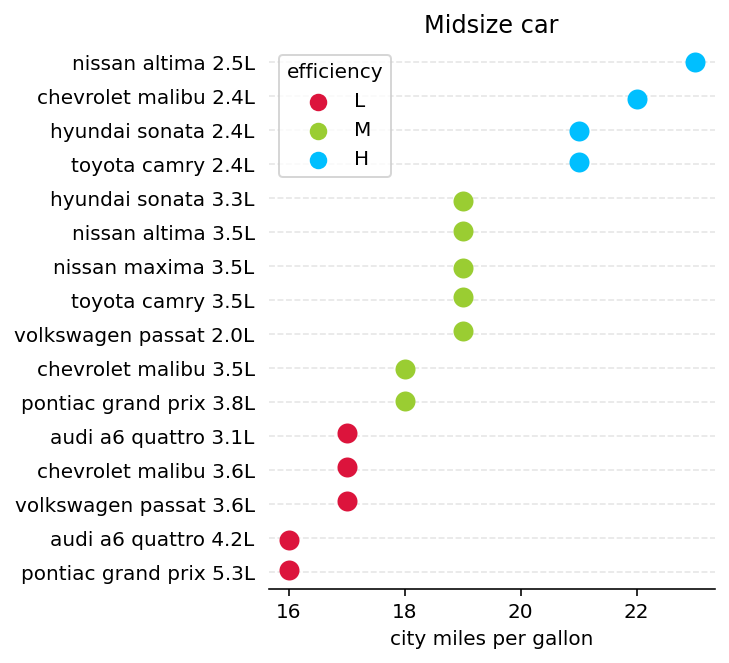

In [192]:
plt.figure(figsize=(4, 5))
ax = sns.stripplot(x='cty', y='car', data=dg, 
              size=10, # marker size
              hue='efficiency',
              palette={'L':'crimson', 'M':'yellowgreen', 'H':'deepskyblue'},
              edgecolor="white")
sns.despine(left=True)
ax.set_title('Midsize car')
ax.set_xlabel('city miles per gallon')
ax.set_ylabel('')
ax.yaxis.grid(True, color='.9', linestyle='--')
#ax.get_legend().set_visible(False)
ax.yaxis.set_ticks_position('none') 

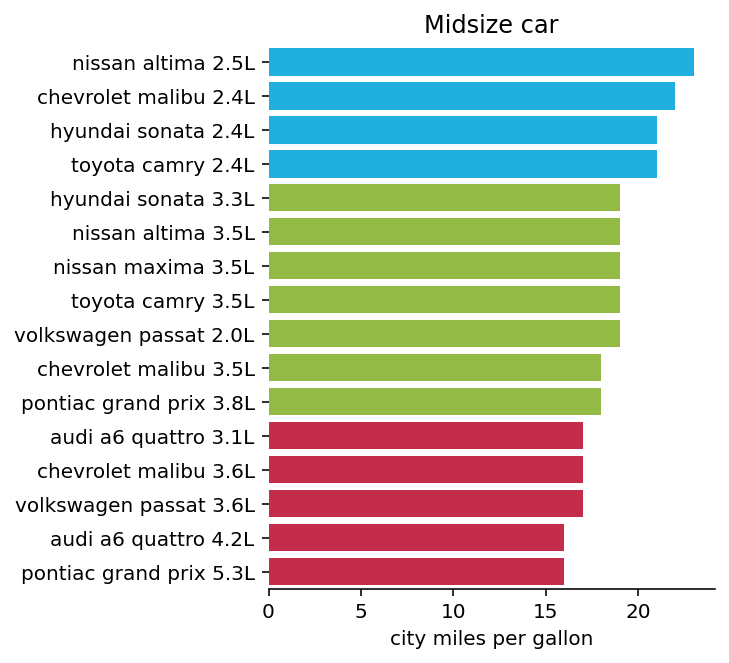

In [193]:
plt.figure(figsize=(4, 5))
ax = sns.barplot(x='cty', y='car', data=dg, 
              hue='efficiency',
              dodge=False,
              palette={'L':'crimson', 'M':'yellowgreen', 'H':'deepskyblue'}
              )
sns.despine()
sns.despine(left=True)
ax.set_title('Midsize car')
ax.set_xlabel('city miles per gallon')
ax.set_ylabel('')
ax.get_legend().set_visible(False)
#ax.yaxis.grid(True, color='.9', linestyle='--')

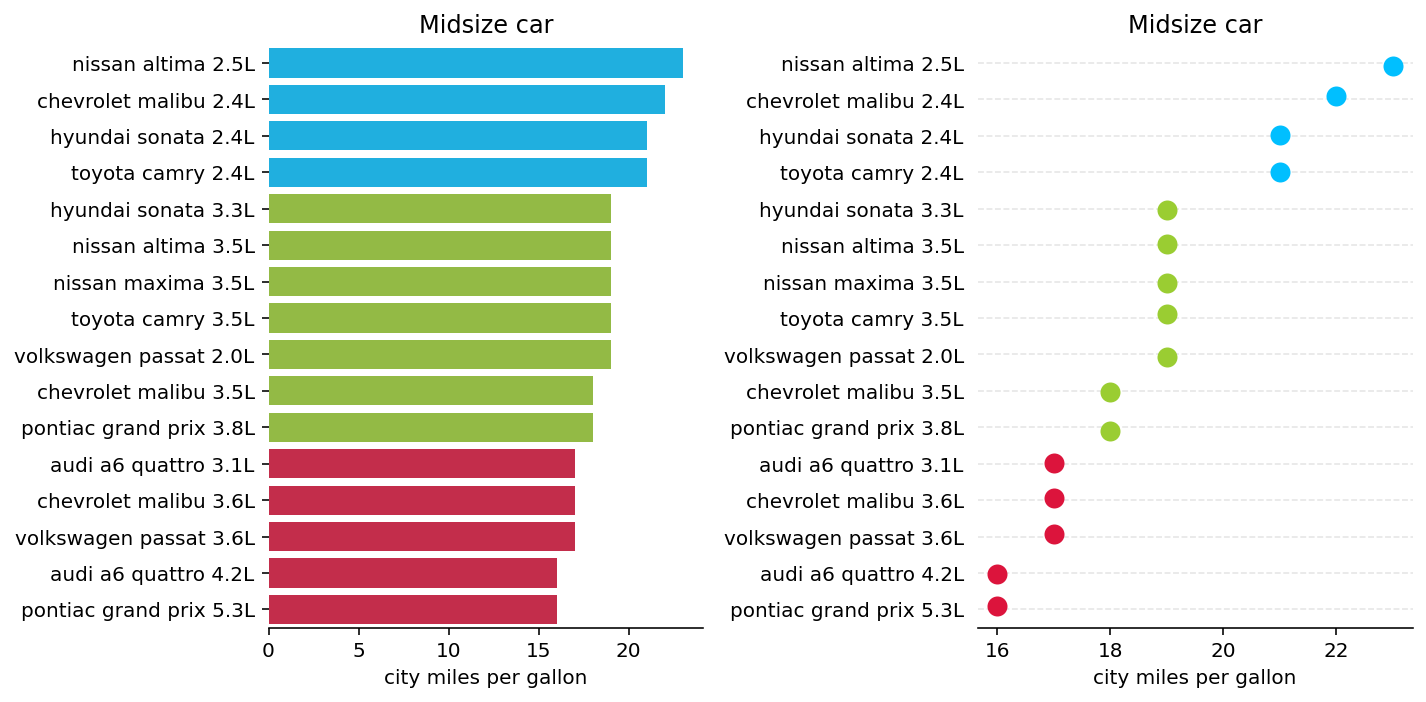

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x='cty', y='car', data=dg, 
            hue='efficiency',
            dodge=False,
            palette={'L':'crimson', 'M':'yellowgreen', 'H':'deepskyblue'},
            color='yellowgreen',
            ax=ax[0])
ax[0].set_title('Midsize car')
ax[0].set_xlabel('city miles per gallon')
ax[0].set_ylabel('')
ax[0].get_legend().set_visible(False)
# ax[0].yaxis.set_ticks_position('none') 

sns.stripplot(x='cty', y='car', data=dg, 
              size=10,
              hue='efficiency',
              palette={'L':'crimson', 'M':'yellowgreen', 'H':'deepskyblue'},
              edgecolor="white",
              ax=ax[1])
sns.despine(left=True)
ax[1].set_title('Midsize car')
ax[1].set_xlabel('city miles per gallon')
ax[1].set_ylabel('')
ax[1].yaxis.grid(True, color='.9', linestyle='--')
# ax[1].get_yaxis().set_visible(False)
ax[1].get_legend().set_visible(False)
ax[1].yaxis.set_ticks_position('none') 
plt.tight_layout()

# Time serries

In [195]:
from IPython.display import IFrame
IFrame('https://datahub.io/core/global-temp', width=900, height=400)

In [196]:
url='https://datahub.io/core/global-temp/r/monthly.csv'
df=pd.read_csv(url)
df

Source        Date    Mean
0        GCAG  2016-12-06  0.7895
1     GISTEMP  2016-12-06  0.8100
2        GCAG  2016-11-06  0.7504
3     GISTEMP  2016-11-06  0.9300
4        GCAG  2016-10-06  0.7292
...       ...         ...     ...
3283  GISTEMP  1880-03-06 -0.1800
3284     GCAG  1880-02-06 -0.1229
3285  GISTEMP  1880-02-06 -0.2100
3286     GCAG  1880-01-06  0.0009
3287  GISTEMP  1880-01-06 -0.3000

[3288 rows x 3 columns]

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3288 non-null   object 
 1   Date    3288 non-null   object 
 2   Mean    3288 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.2+ KB


In [198]:
url='https://datahub.io/core/global-temp/r/monthly.csv'
df=pd.read_csv(url, index_col=['Source', 'Date'], parse_dates=['Date'])
df

Mean
Source  Date              
GCAG    2016-12-06  0.7895
GISTEMP 2016-12-06  0.8100
GCAG    2016-11-06  0.7504
GISTEMP 2016-11-06  0.9300
GCAG    2016-10-06  0.7292
...                    ...
GISTEMP 1880-03-06 -0.1800
GCAG    1880-02-06 -0.1229
GISTEMP 1880-02-06 -0.2100
GCAG    1880-01-06  0.0009
GISTEMP 1880-01-06 -0.3000

[3288 rows x 1 columns]

In [199]:
df.loc['GISTEMP']

Mean
Date            
2016-12-06  0.81
2016-11-06  0.93
2016-10-06  0.89
2016-09-06  0.87
2016-08-06  0.98
...          ...
1880-05-06 -0.14
1880-04-06 -0.27
1880-03-06 -0.18
1880-02-06 -0.21
1880-01-06 -0.30

[1644 rows x 1 columns]

In [200]:
df.sort_values(['Date', 'Source'], inplace=True)
df

Mean
Source  Date              
GCAG    1880-01-06  0.0009
GISTEMP 1880-01-06 -0.3000
GCAG    1880-02-06 -0.1229
GISTEMP 1880-02-06 -0.2100
GCAG    1880-03-06 -0.1357
...                    ...
GISTEMP 2016-10-06  0.8900
GCAG    2016-11-06  0.7504
GISTEMP 2016-11-06  0.9300
GCAG    2016-12-06  0.7895
GISTEMP 2016-12-06  0.8100

[3288 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

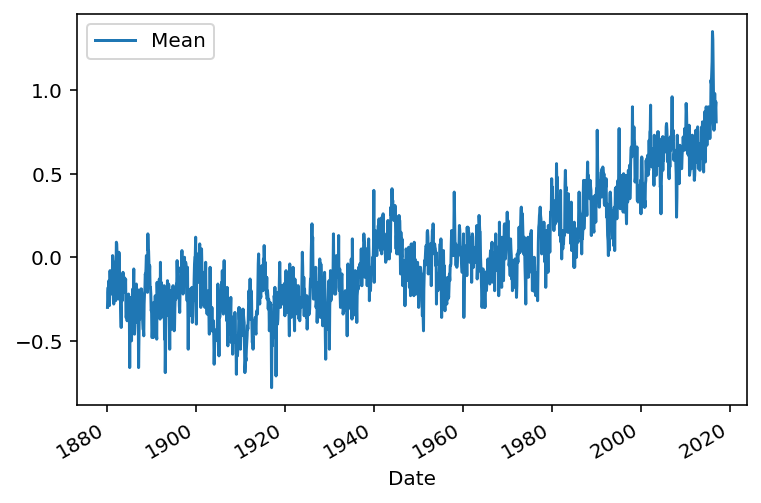

In [201]:
df.loc['GISTEMP'].plot()

<AxesSubplot:xlabel='Date'>

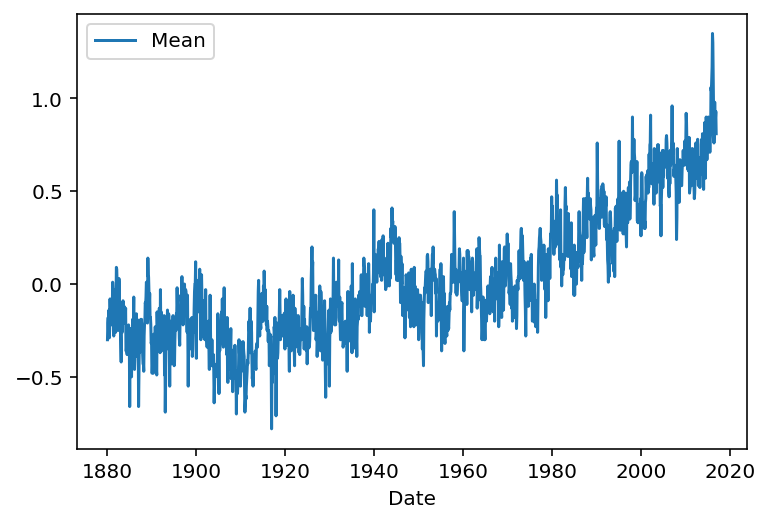

In [202]:
sns.lineplot(data=df.loc['GISTEMP'])

<AxesSubplot:xlabel='Date', ylabel='Mean'>

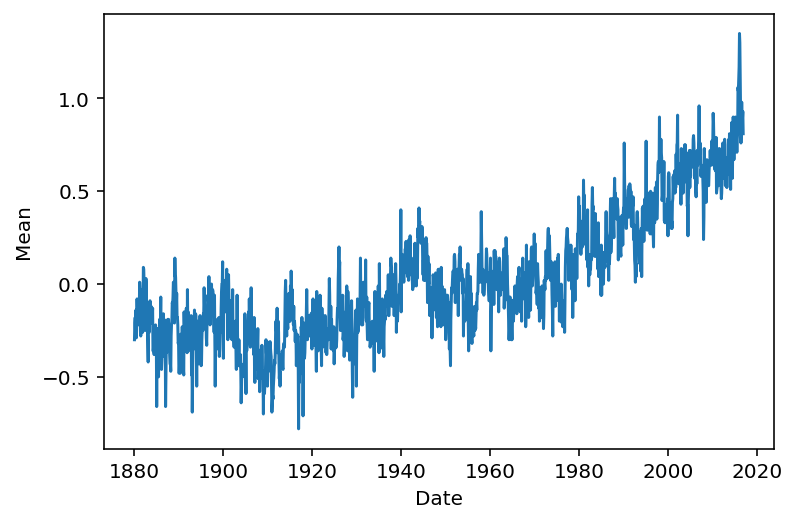

In [203]:
dg=df.loc['GISTEMP']
sns.lineplot(x=dg.index, y=dg['Mean'])

<AxesSubplot:xlabel='Date', ylabel='Mean'>

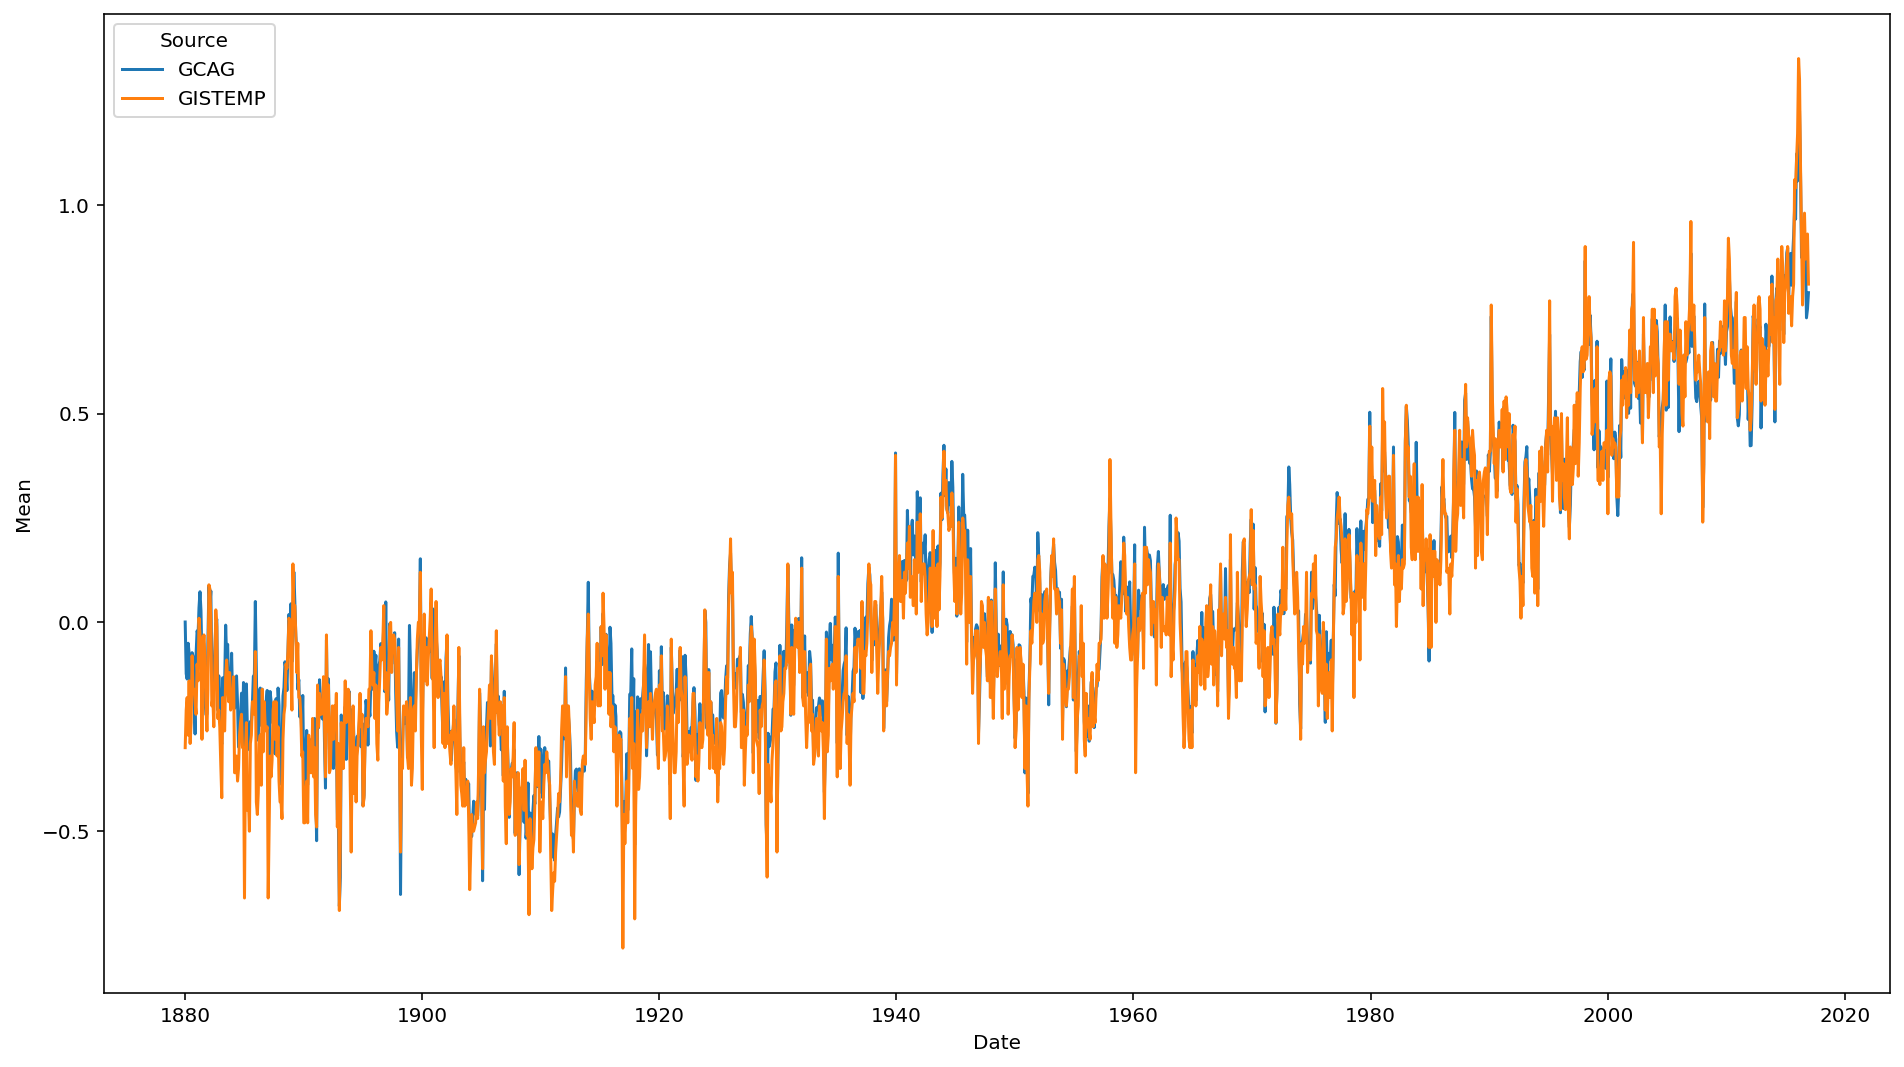

In [204]:
plt.figure(figsize=(16, 9))
sns.lineplot(x='Date', y='Mean', data=df.reset_index(), hue='Source')

Text(0.5, 1.0, 'Global temperature from 1880-2016')

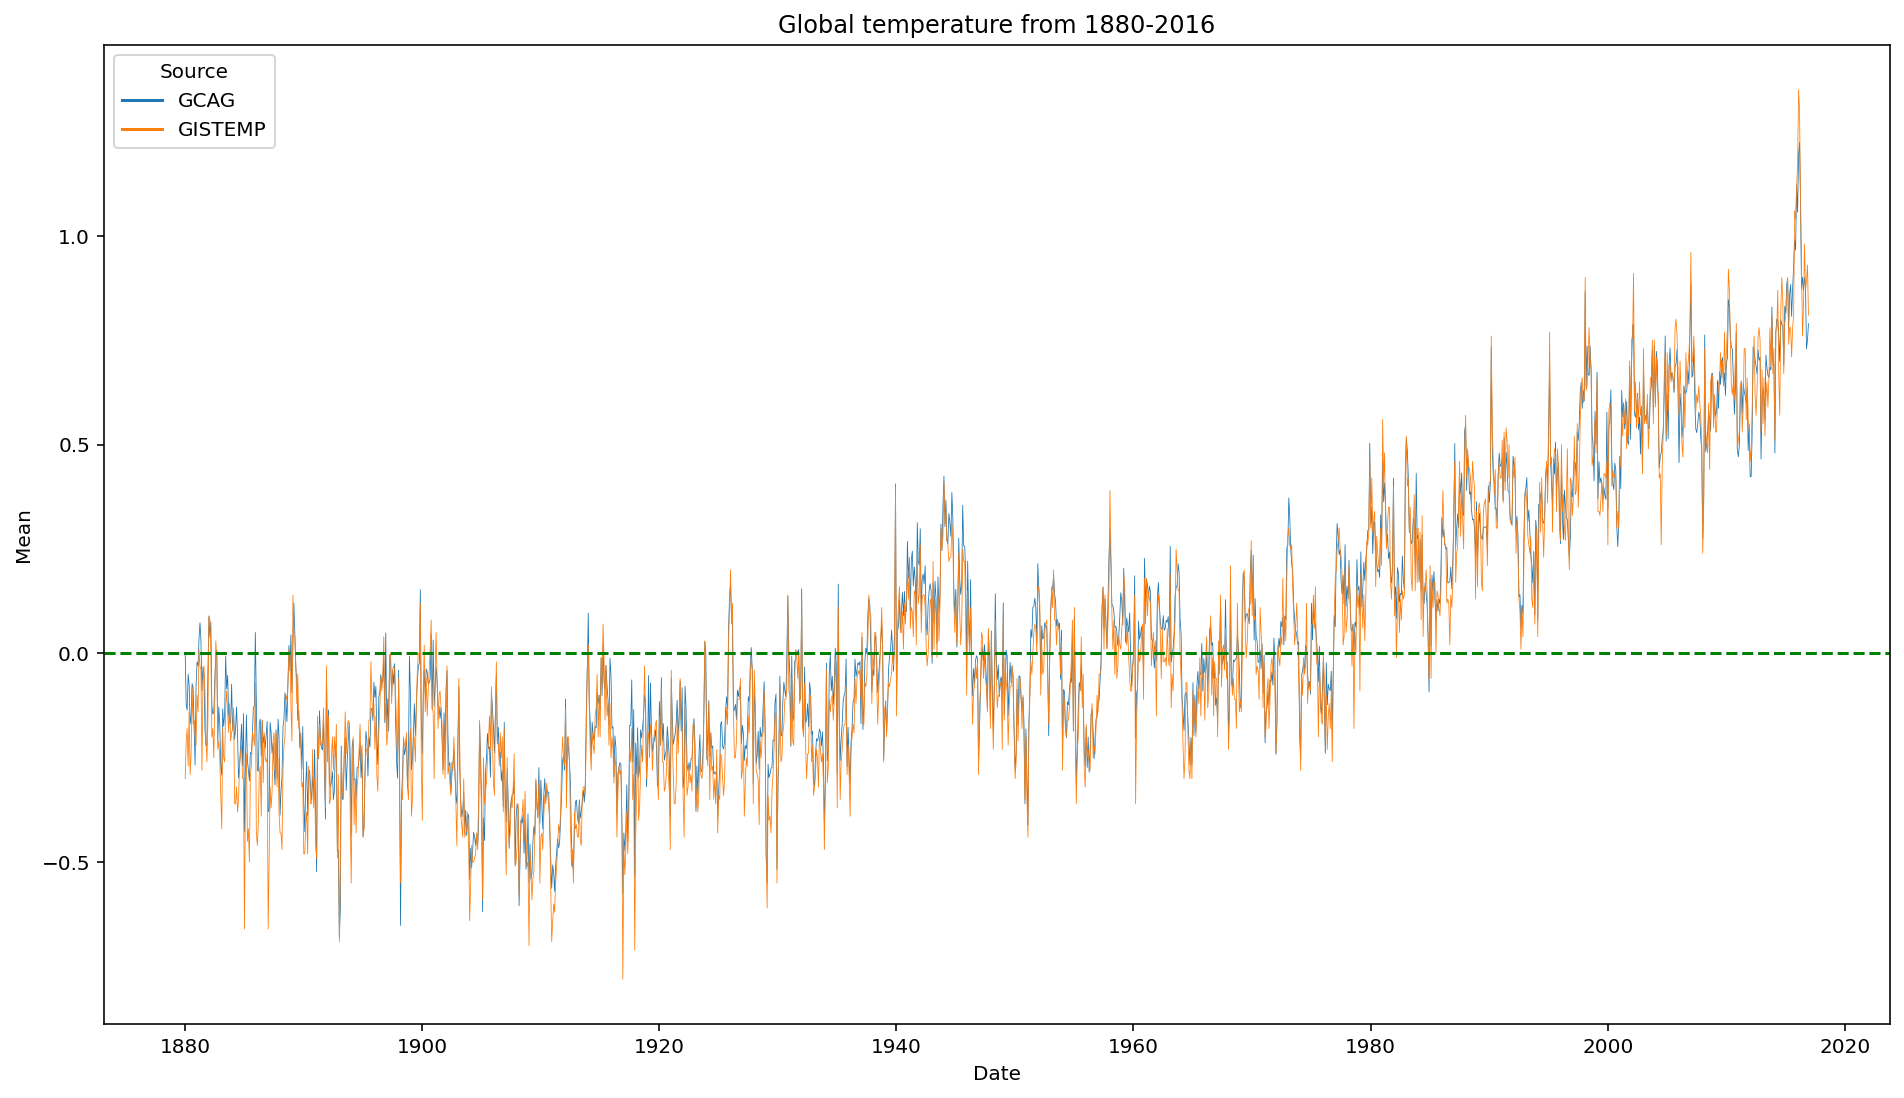

In [205]:
plt.figure(figsize=(16, 9))
sns.lineplot(x='Date', y='Mean', data=df.reset_index(), hue='Source',linewidth=.4)
plt.axhline(0, color='green', linestyle='--')
plt.title('Global temperature from 1880-2016')

In [206]:
dg=df.loc['GISTEMP'].loc['2000']
dg

Mean
Date            
2000-01-06  0.26
2000-02-06  0.58
2000-03-06  0.60
2000-04-06  0.59
2000-05-06  0.40
2000-06-06  0.44
2000-07-06  0.42
2000-08-06  0.43
2000-09-06  0.42
2000-10-06  0.30
2000-11-06  0.34
2000-12-06  0.30

Text(0.5, 1.0, 'Global temperature')

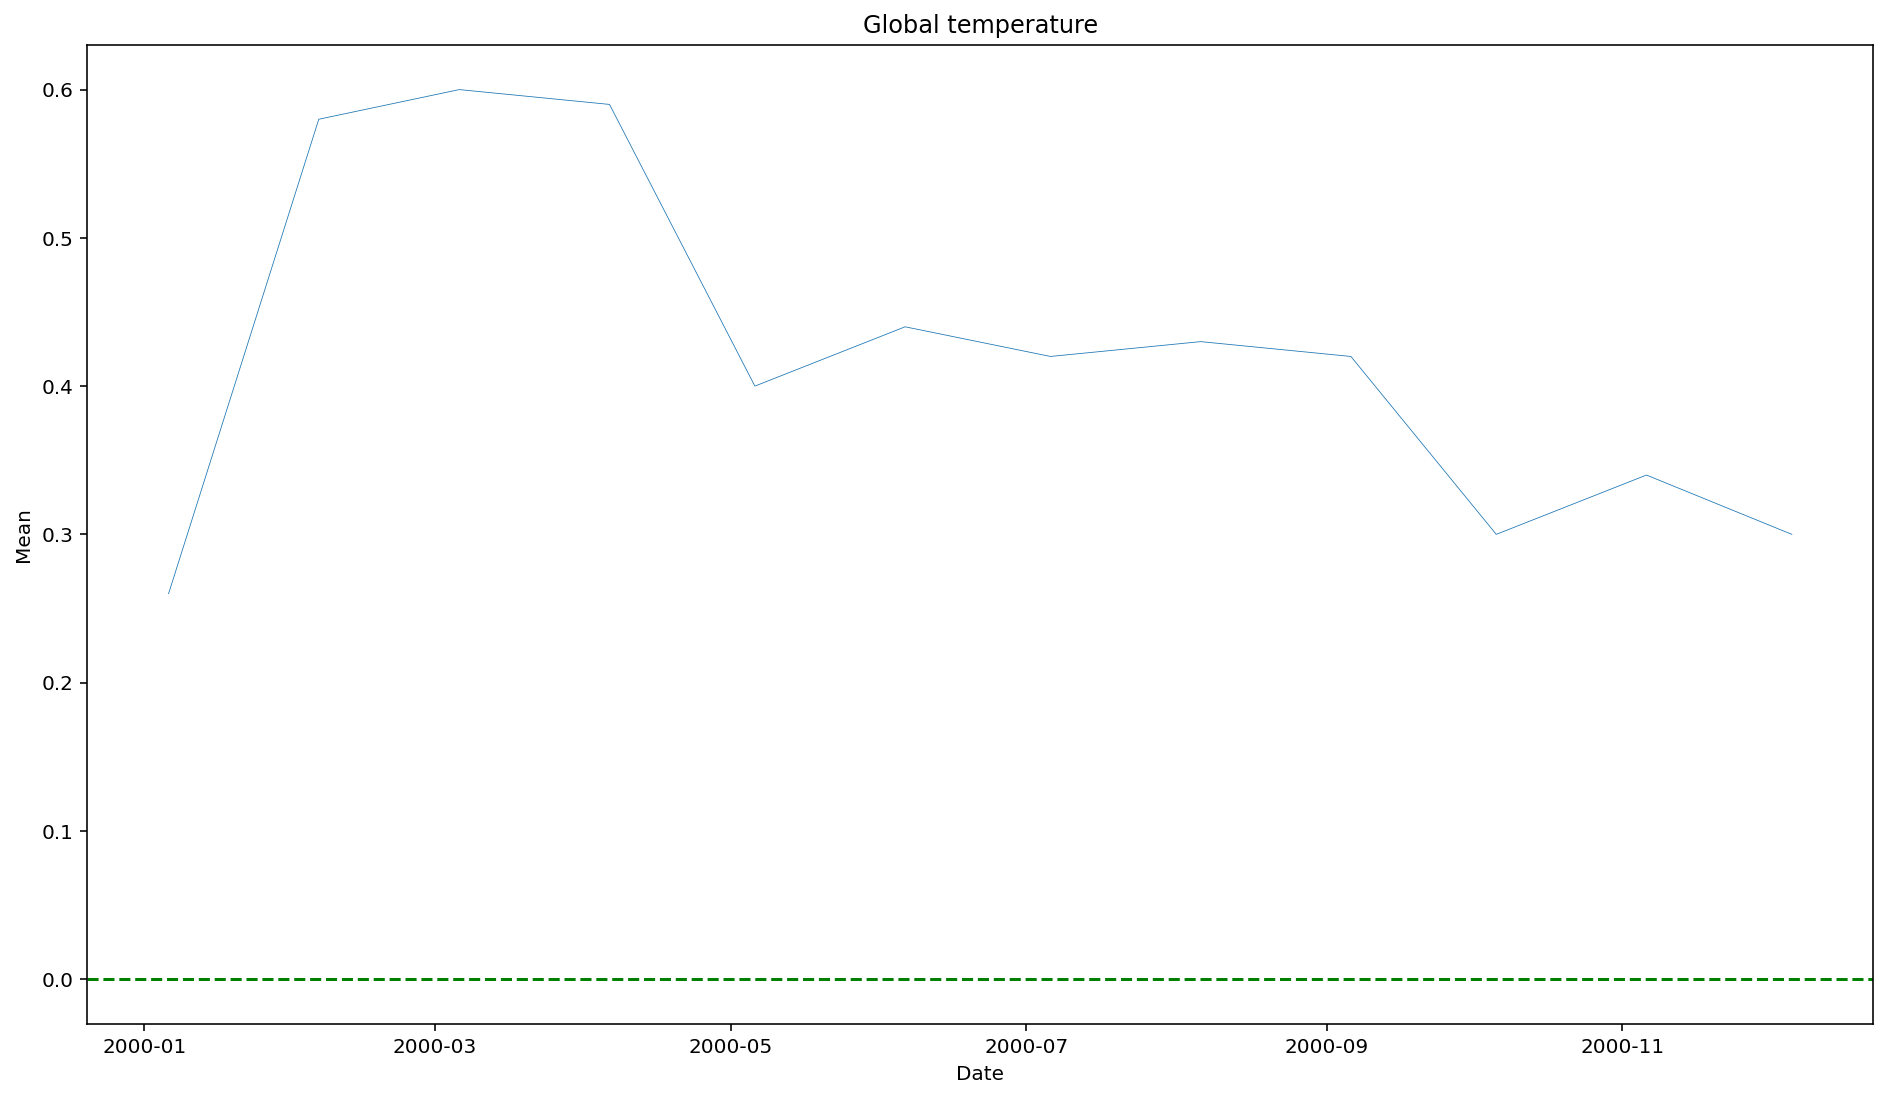

In [207]:
plt.figure(figsize=(16, 9))
sns.lineplot(x='Date', y='Mean', data=dg.reset_index(), linewidth=.4)
plt.axhline(0, color='green', linestyle='--')
plt.title('Global temperature')

In [208]:
dg=df.loc['GISTEMP'].loc['2000':]
dg

Mean
Date            
2000-01-06  0.26
2000-02-06  0.58
2000-03-06  0.60
2000-04-06  0.59
2000-05-06  0.40
...          ...
2016-08-06  0.98
2016-09-06  0.87
2016-10-06  0.89
2016-11-06  0.93
2016-12-06  0.81

[204 rows x 1 columns]

Text(0.5, 1.0, 'Global temperature')

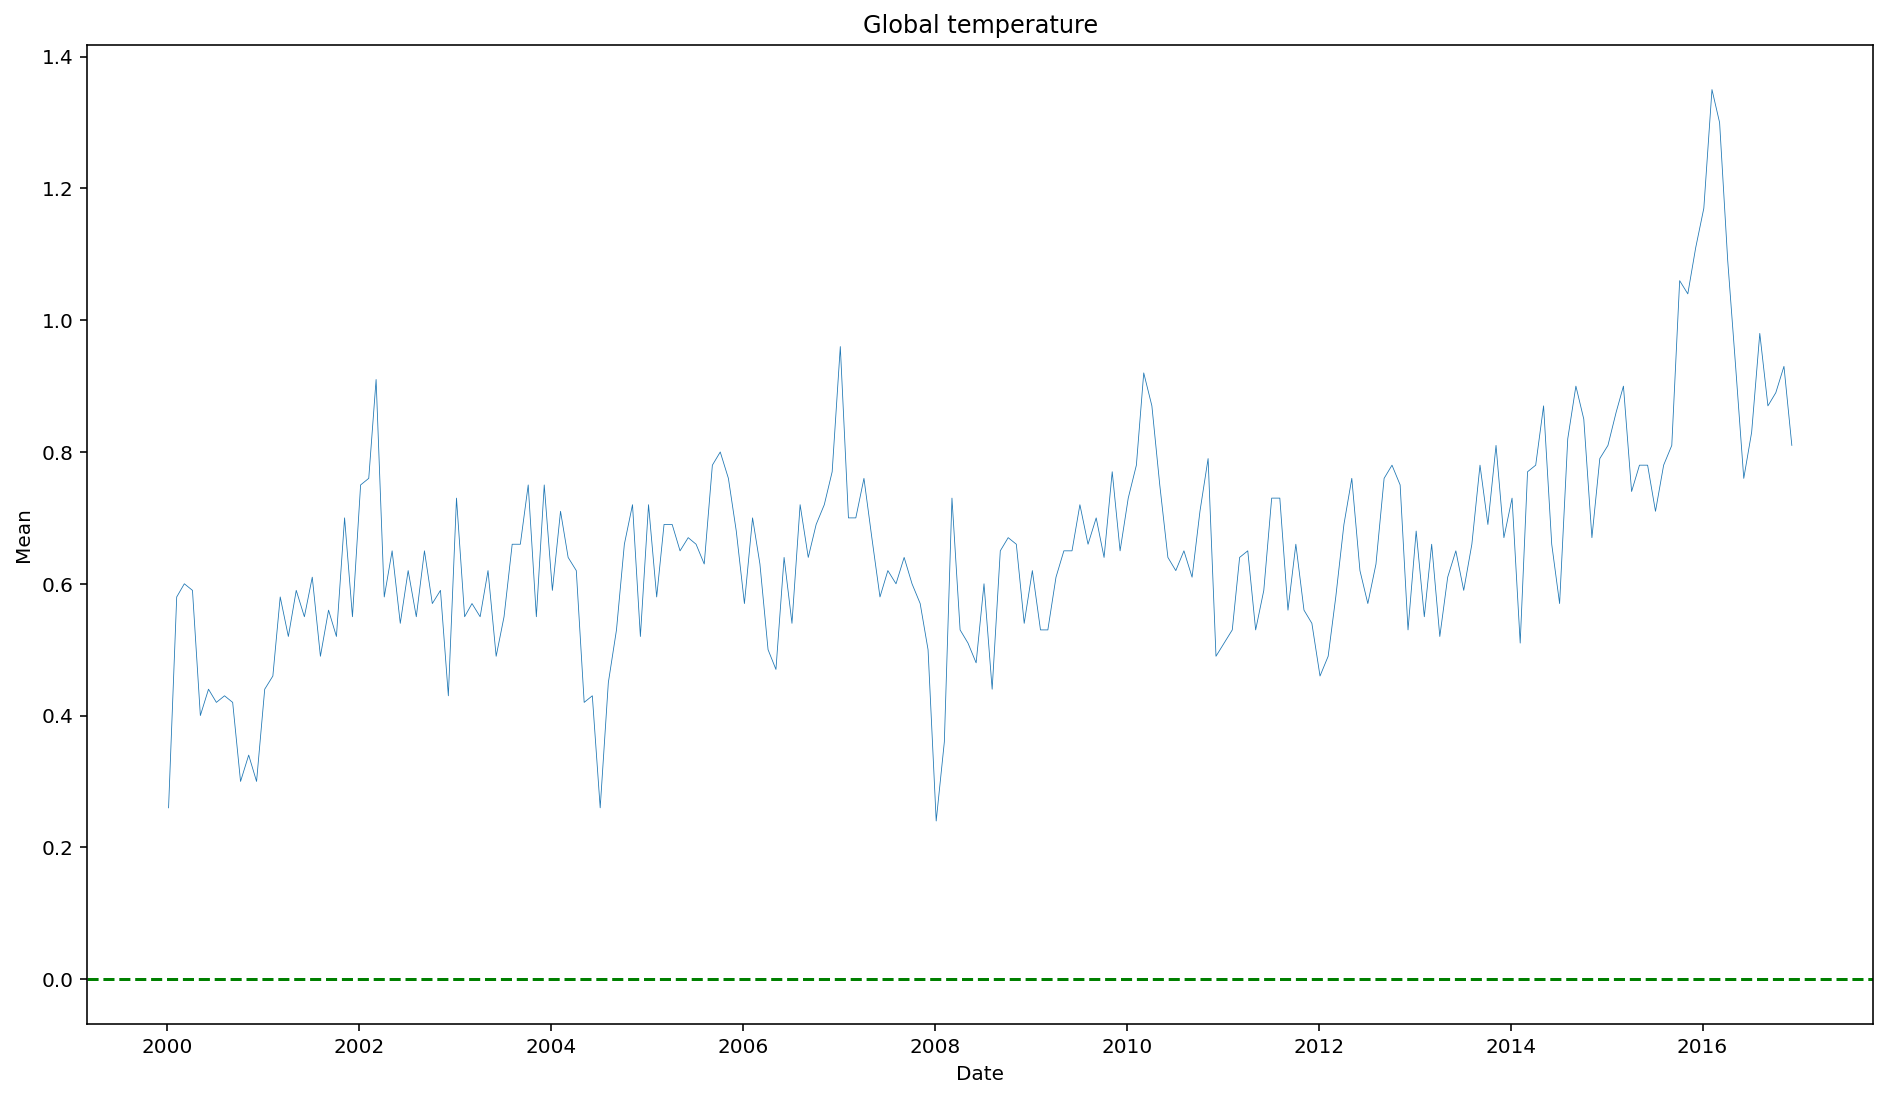

In [209]:
plt.figure(figsize=(16, 9))
sns.lineplot(x='Date', y='Mean', data=dg.reset_index(), linewidth=.4)
plt.axhline(0, color='green', linestyle='--')
plt.title('Global temperature')

# log scale chart

In [210]:
df=pd.read_csv('https://stooq.com/q/d/l/?s=^dji&i=m', parse_dates=['Date'], index_col='Date')
df

Open      High       Low     Close        Volume
Date                                                            
1896-05-31     29.39     29.43     29.11     29.43           NaN
1896-06-30     29.40     29.40     25.73     26.18           NaN
1896-07-31     25.05     25.49     22.09     23.19           NaN
1896-08-31     22.81     23.15     20.76     23.15           NaN
1896-09-30     23.19     26.51     23.19     26.11           NaN
...              ...       ...       ...       ...           ...
2021-02-28  30054.73  32009.64  30014.97  30932.37  7.938577e+09
2021-03-31  31065.90  33259.00  30547.53  32981.55  1.116771e+10
2021-04-30  33054.58  34256.75  32985.35  33874.85  7.883250e+09
2021-05-31  33904.89  35091.56  33473.80  34529.45  7.635879e+09
2021-06-30  34584.19  34849.32  33271.93  33876.97  5.273745e+09

[1498 rows x 5 columns]

<AxesSubplot:xlabel='Date', ylabel='Close'>

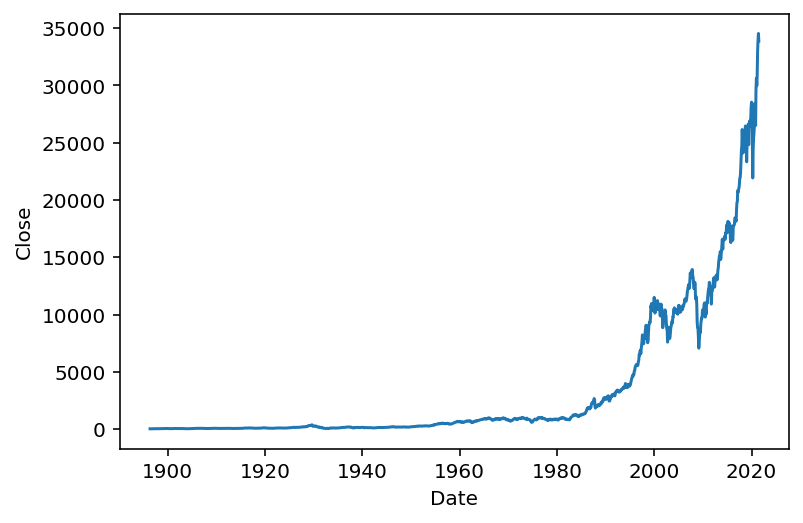

In [211]:
sns.lineplot(x=df.index, y=df['Close'])

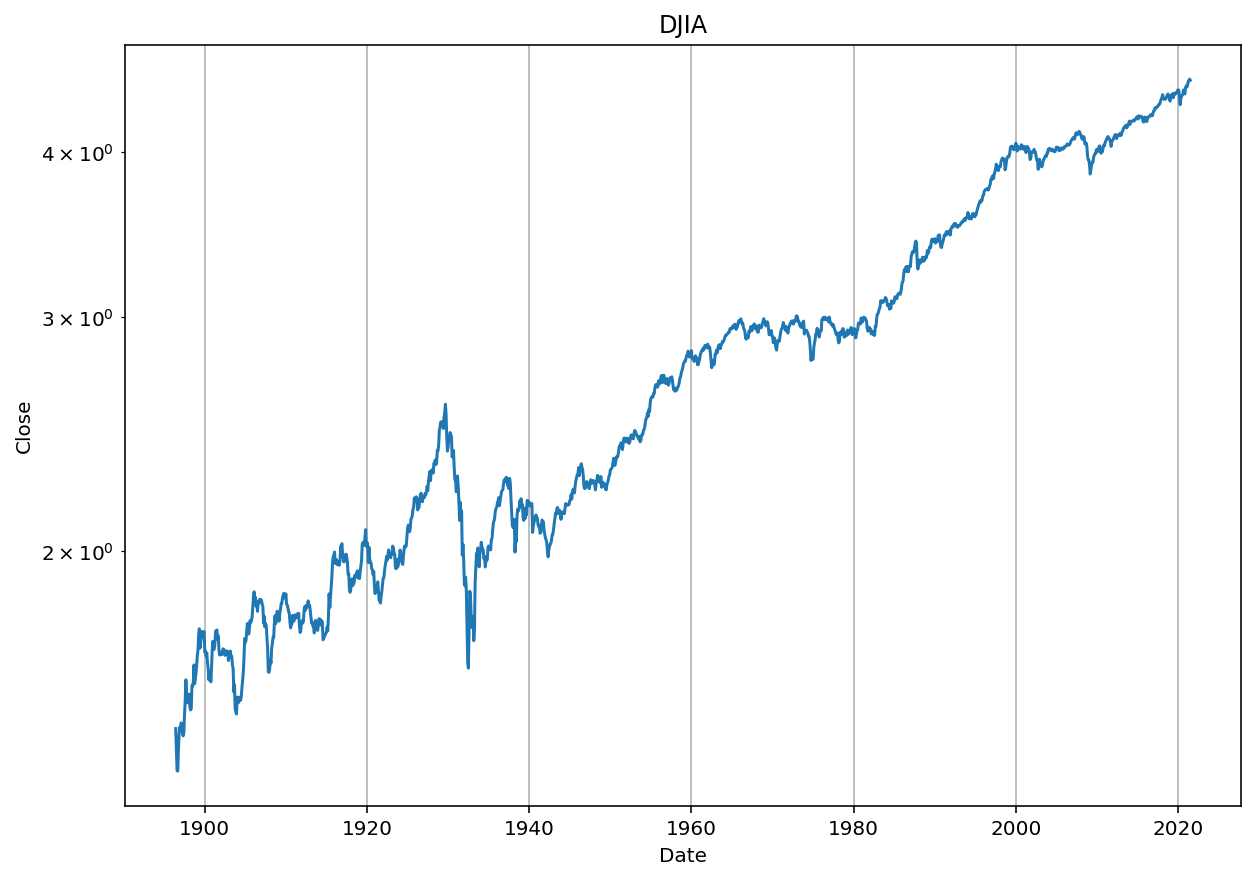

In [212]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale='log')
sns.lineplot(x=df.index, y=df['Close'])
plt.title('DJIA')
plt.grid()

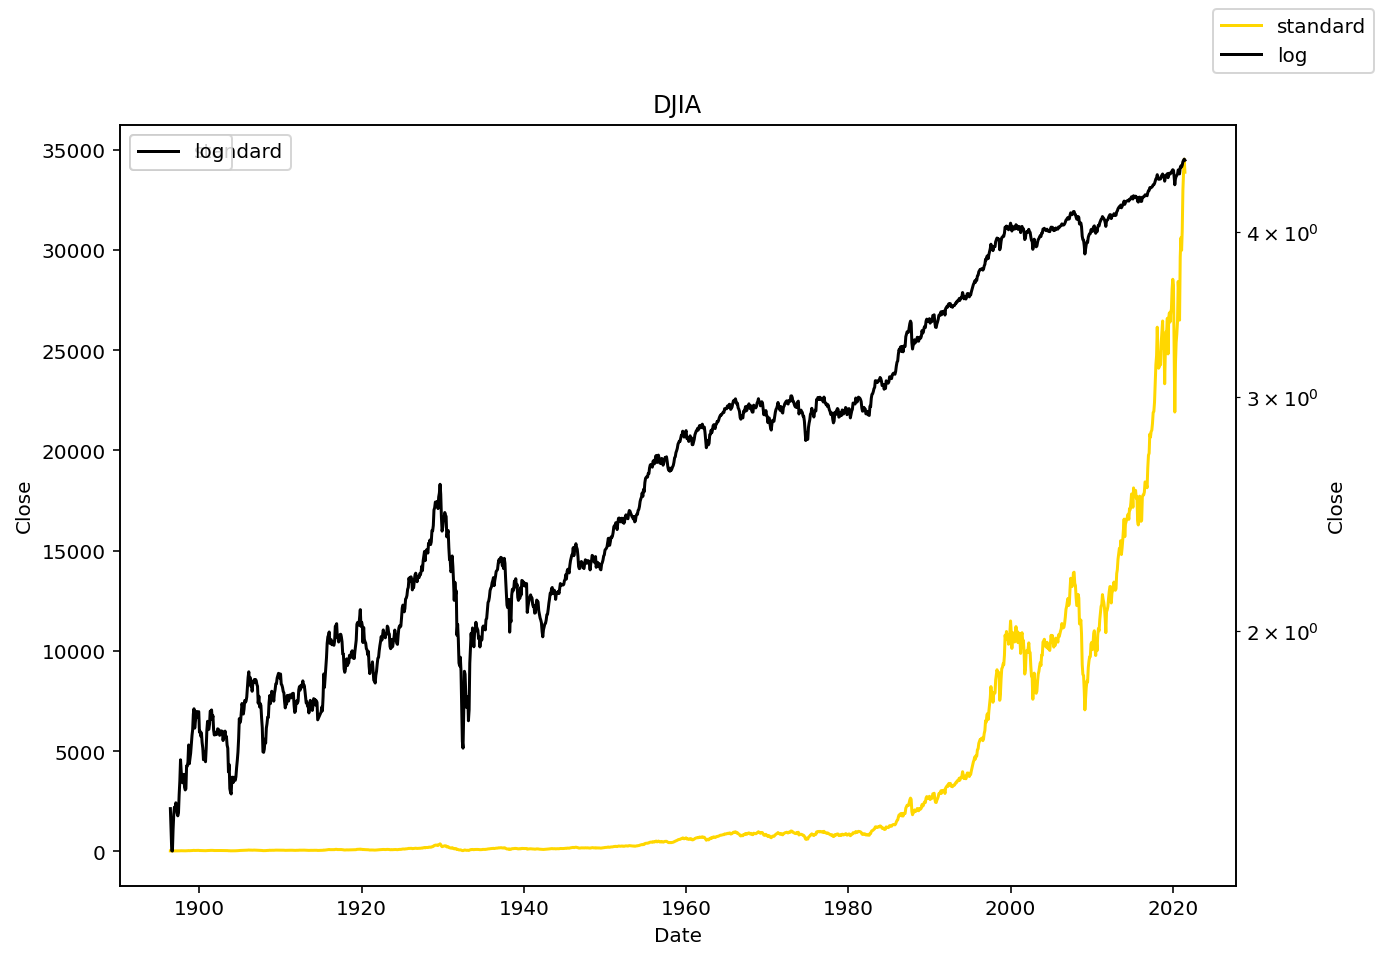

In [213]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.lineplot(x=df.index, y=df['Close'], ax=ax, color='gold', label='standard')
ax2=ax.twinx()#2lineplot
ax2.set(yscale='log')
sns.lineplot(x=df.index, y=df['Close'], ax=ax2, color='black', label='log')

plt.title('DJIA')
plt.grid()
fig.legend()

# secondary y-axis

In [214]:
pd.Timestamp.now()

Timestamp('2021-06-22 09:54:36.116199')

## DJI index (monthly)

In [215]:
dj=pd.read_csv('https://stooq.com/q/d/l/?s=^dji&i=m', parse_dates=['Date'], index_col='Date')
dj

Open      High       Low     Close        Volume
Date                                                            
1896-05-31     29.39     29.43     29.11     29.43           NaN
1896-06-30     29.40     29.40     25.73     26.18           NaN
1896-07-31     25.05     25.49     22.09     23.19           NaN
1896-08-31     22.81     23.15     20.76     23.15           NaN
1896-09-30     23.19     26.51     23.19     26.11           NaN
...              ...       ...       ...       ...           ...
2021-02-28  30054.73  32009.64  30014.97  30932.37  7.938577e+09
2021-03-31  31065.90  33259.00  30547.53  32981.55  1.116771e+10
2021-04-30  33054.58  34256.75  32985.35  33874.85  7.883250e+09
2021-05-31  33904.89  35091.56  33473.80  34529.45  7.635879e+09
2021-06-30  34584.19  34849.32  33271.93  33876.97  5.273745e+09

[1498 rows x 5 columns]

## SET index (monthly)

In [216]:
ds=pd.read_csv('https://stooq.com/q/d/l/?s=^set&i=m', parse_dates=['Date'], index_col='Date')
ds

Open     High      Low    Close        Volume
Date                                                        
1975-04-30   100.00   100.00   100.00   100.00           NaN
1975-05-31    89.98    89.98    89.98    89.98           NaN
1975-06-30    91.64    91.64    91.64    91.64           NaN
1975-07-31    98.02    98.02    98.02    98.02           NaN
1975-08-31    98.39    98.39    98.39    98.39           NaN
...             ...      ...      ...      ...           ...
2021-02-28  1465.76  1531.29  1456.45  1496.78  1.044492e+11
2021-03-31  1493.55  1593.93  1487.99  1587.21  2.100751e+11
2021-04-30  1594.01  1606.41  1529.29  1583.13  2.091820e+11
2021-05-31  1581.86  1596.80  1501.02  1593.59  2.185524e+11
2021-06-30  1602.65  1642.80  1591.16  1601.13  1.515228e+11

[555 rows x 5 columns]

In [217]:
df=pd.merge(dj['Close'], ds['Close'], how='inner', left_index=True, right_index=True, suffixes=['_DJI', '_SET'])
df

Close_DJI  Close_SET
Date                            
1975-04-30     821.30     100.00
1975-05-31     832.30      89.98
1975-06-30     879.00      91.64
1975-07-31     831.50      98.02
1975-08-31     835.30      98.39
...               ...        ...
2021-02-28   30932.37    1496.78
2021-03-31   32981.55    1587.21
2021-04-30   33874.85    1583.13
2021-05-31   34529.45    1593.59
2021-06-30   33876.97    1601.13

[555 rows x 2 columns]

# single y-axis plot

<AxesSubplot:xlabel='Date'>

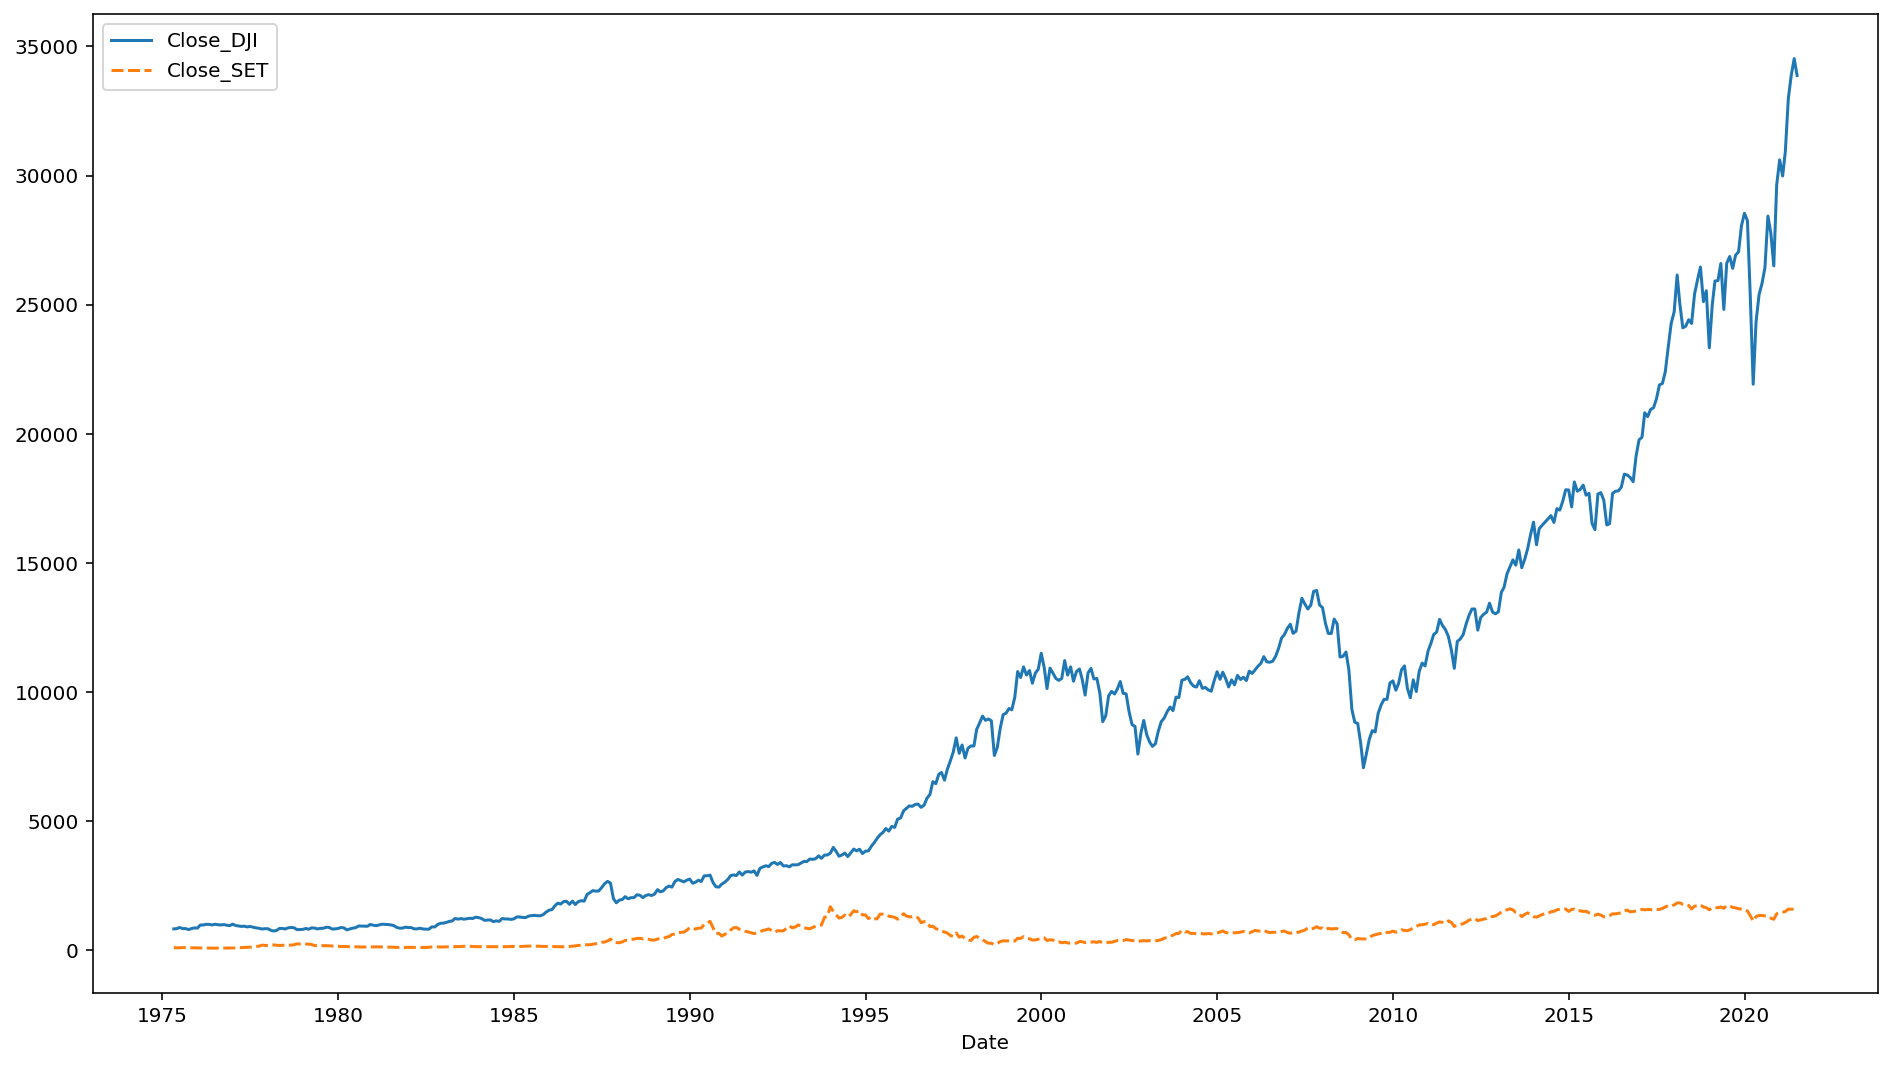

In [218]:
plt.figure(figsize=(16,9))
sns.lineplot(data=df)

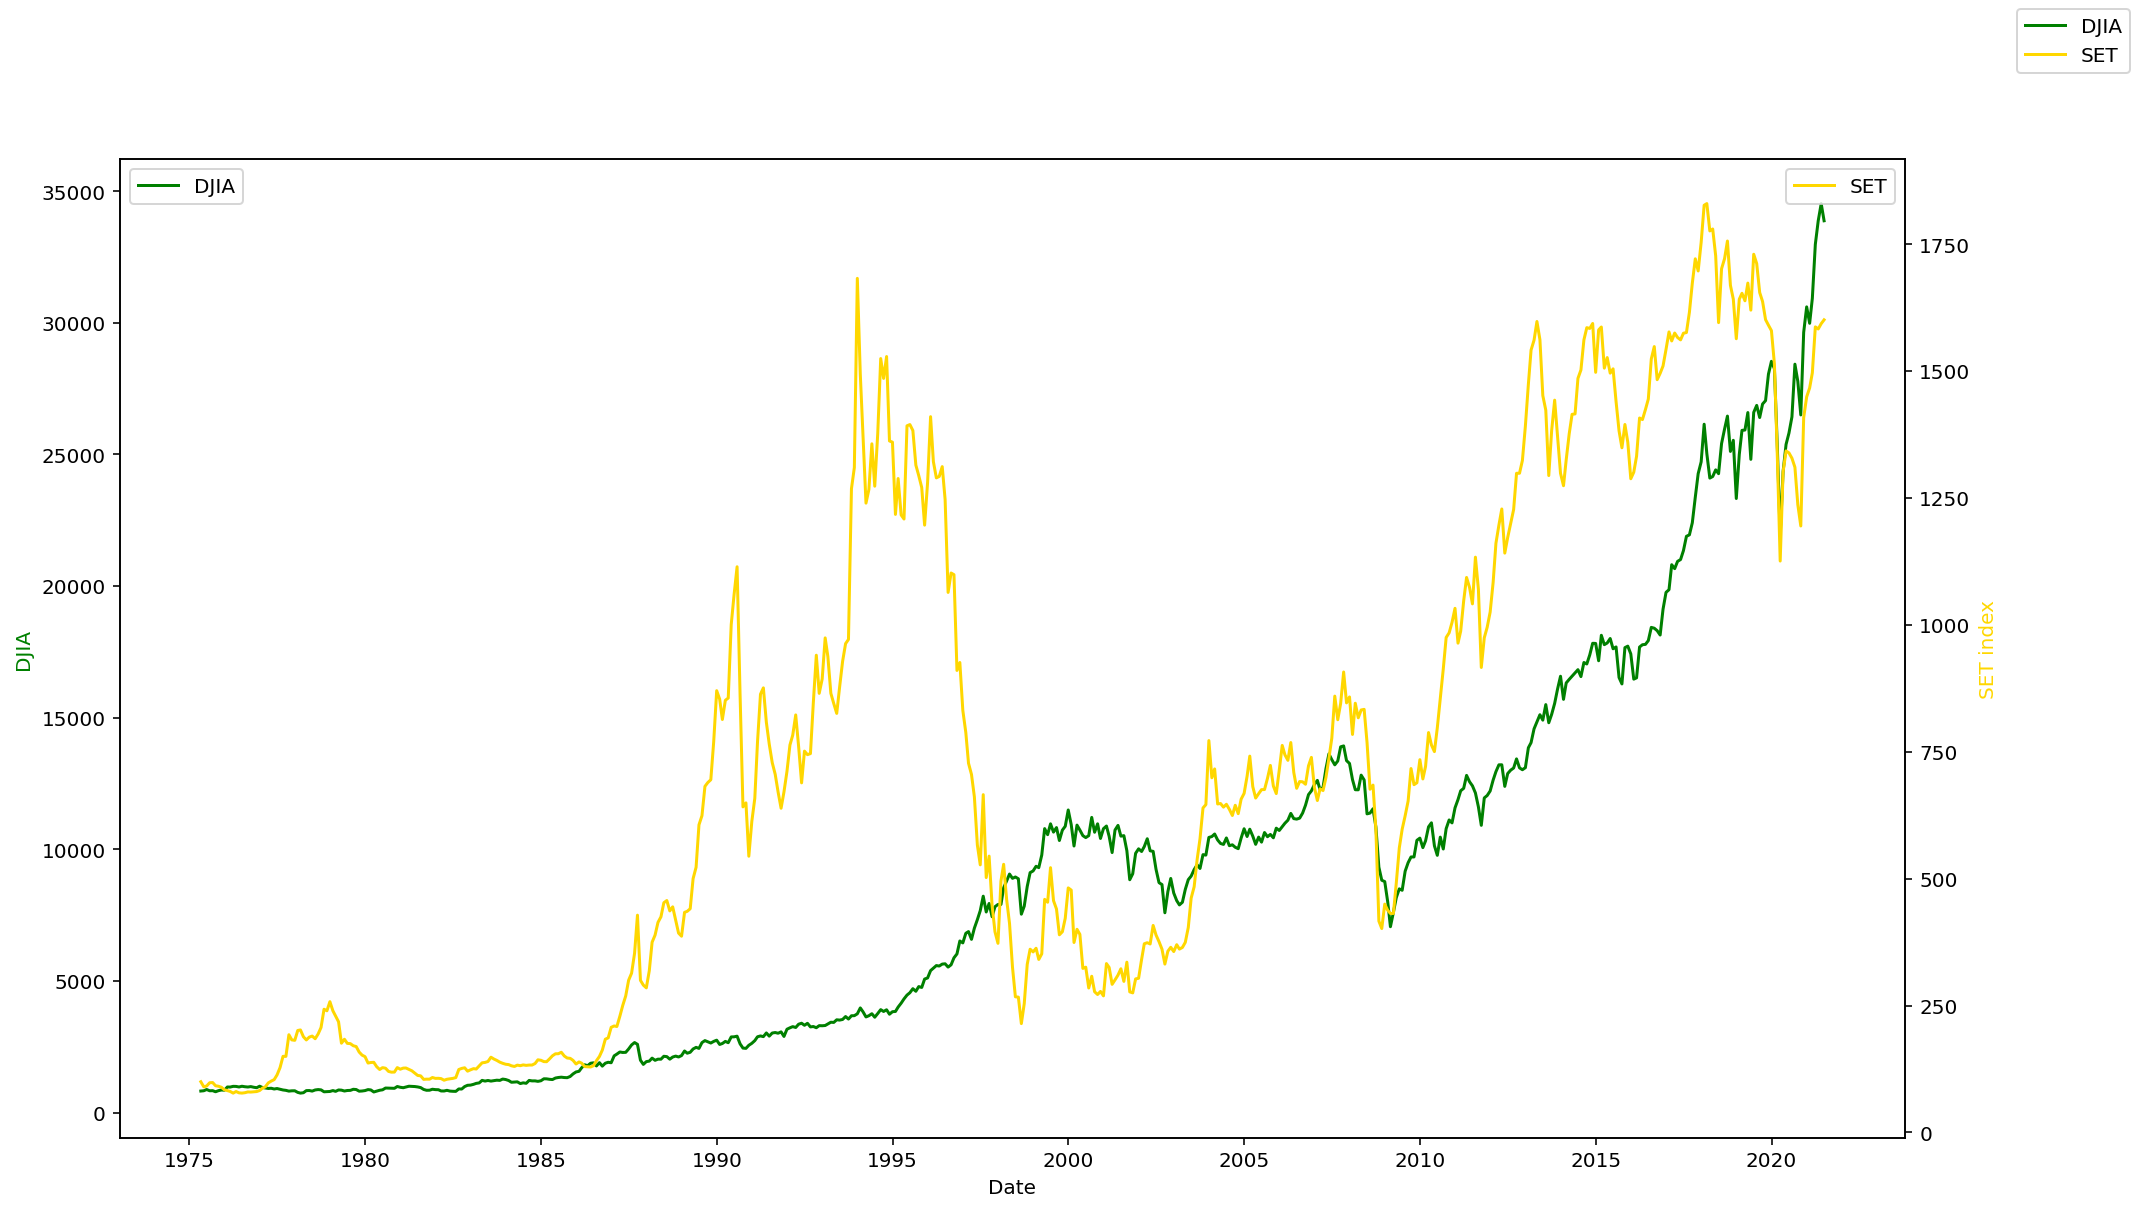

In [219]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df.index, y=df['Close_DJI'], ax=ax, label='DJIA', color='green')
ax.set_ylabel('DJIA', color='green')
ax2=ax.twinx()
sns.lineplot(x=df.index, y=df['Close_SET'], ax=ax2, label='SET', color='gold')
ax2.set_ylabel('SET index', color='gold')
fig.legend()
# plt.savefig('DJIA_SET.png')
# plt.savefig('DJIA_SET2.png', dpi=150)
# plt.savefig('DJIA_SET2.svg')

# PM2.5 

In [220]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/Bangkok_pm25.txt'
# url='http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt'
df=pd.read_csv(url, sep='\t', skiprows=9)
df.head(2)

% Year, Month, Day, UTC Hour, PM2.5, PM10_mask, Retrospective
2016 3 3 8 62.9 1.0                                                  0            
         9 62.9 1.0                                                  0

In [221]:
'Year, Month, Day, UTC Hour, PM2.5, PM10_mask, Retrospective'.split(', ')

['Year', 'Month', 'Day', 'UTC Hour', 'PM2.5', 'PM10_mask', 'Retrospective']

In [222]:
col_names='Year, Month, Day, UTC Hour, PM2.5, PM10_mask, Retrospective'.split(', ')

In [223]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/Bangkok_pm25.txt'
# url='http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt'
df=pd.read_csv(url, sep='\t', skiprows=10, names=col_names)
df

Year  Month  Day  UTC Hour  PM2.5  PM10_mask  Retrospective
0      2016      3    3         8   62.9        1.0              0
1      2016      3    3         9   62.9        1.0              0
2      2016      3    3        10   55.5        1.0              0
3      2016      3    3        11   55.5        1.0              0
4      2016      3    3        12   47.9        1.0              0
...     ...    ...  ...       ...    ...        ...            ...
30387  2020      1   24         3   28.6        0.0              0
30388  2020      1   24         4   32.2        0.0              0
30389  2020      1   24         5   33.0        0.0              0
30390  2020      1   24         6   31.5        0.0              0
30391  2020      1   24         7   29.4        0.0              0

[30392 rows x 7 columns]

In [224]:
df.drop(columns=['PM10_mask', 'Retrospective'], inplace=True)
df

Year  Month  Day  UTC Hour  PM2.5
0      2016      3    3         8   62.9
1      2016      3    3         9   62.9
2      2016      3    3        10   55.5
3      2016      3    3        11   55.5
4      2016      3    3        12   47.9
...     ...    ...  ...       ...    ...
30387  2020      1   24         3   28.6
30388  2020      1   24         4   32.2
30389  2020      1   24         5   33.0
30390  2020      1   24         6   31.5
30391  2020      1   24         7   29.4

[30392 rows x 5 columns]

In [225]:
df.rename(columns={'UTC Hour': 'Hour'}, inplace=True)

In [226]:
df['DateTime']=pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.to_timedelta('7 hours')

df[:10]

Year  Month  Day  Hour  PM2.5            DateTime
0  2016      3    3     8   62.9 2016-03-03 15:00:00
1  2016      3    3     9   62.9 2016-03-03 16:00:00
2  2016      3    3    10   55.5 2016-03-03 17:00:00
3  2016      3    3    11   55.5 2016-03-03 18:00:00
4  2016      3    3    12   47.9 2016-03-03 19:00:00
5  2016      3    3    13   43.6 2016-03-03 20:00:00
6  2016      3    3    14   28.6 2016-03-03 21:00:00
7  2016      3    3    15   33.6 2016-03-03 22:00:00
8  2016      3    3    16   34.8 2016-03-03 23:00:00
9  2016      3    3    17   31.3 2016-03-04 00:00:00

## replace GMT+0 columns with local date/time

In [227]:
df['Year']=df['DateTime'].dt.year
df['Month']=df['DateTime'].dt.month
df['Day']=df['DateTime'].dt.day
df['Hour']=df['DateTime'].dt.hour
df['Date']=pd.to_datetime(df[['Year', 'Month', 'Day']])

df['DayName']=df['DateTime'].dt.strftime('%a')
df['DayOfYear']=df['DateTime'].dt.strftime('%-j')

df

Year  Month  Day  Hour  PM2.5            DateTime       Date DayName  \
0      2016      3    3    15   62.9 2016-03-03 15:00:00 2016-03-03     Thu   
1      2016      3    3    16   62.9 2016-03-03 16:00:00 2016-03-03     Thu   
2      2016      3    3    17   55.5 2016-03-03 17:00:00 2016-03-03     Thu   
3      2016      3    3    18   55.5 2016-03-03 18:00:00 2016-03-03     Thu   
4      2016      3    3    19   47.9 2016-03-03 19:00:00 2016-03-03     Thu   
...     ...    ...  ...   ...    ...                 ...        ...     ...   
30387  2020      1   24    10   28.6 2020-01-24 10:00:00 2020-01-24     Fri   
30388  2020      1   24    11   32.2 2020-01-24 11:00:00 2020-01-24     Fri   
30389  2020      1   24    12   33.0 2020-01-24 12:00:00 2020-01-24     Fri   
30390  2020      1   24    13   31.5 2020-01-24 13:00:00 2020-01-24     Fri   
30391  2020      1   24    14   29.4 2020-01-24 14:00:00 2020-01-24     Fri   

                 DayOfYear  
0      2016-03-03 15:00:00  
1      2016-03-03 16:00:00  
2      2016-03-03 17:00:00  
3      2016-03-03 18:00:00  
4      2016-03-03 19:00:00  
...                    ...  
30387  2020-01-24 10:00:00  
30388  2020-01-24 11:00:00  
30389  2020-01-24 12:00:00  
30390  2020-01-24 13:00:00  
30391  2020-01-24 14:00:00  

[30392 rows x 9 columns]

In [228]:
df[['DayName', 'PM2.5']].groupby('DayName').mean() #ไม่เรียงเลยต้องเปลี่ยน

PM2.5
DayName           
Fri      25.322079
Mon      26.232062
Sat      25.417109
Sun      25.039387
Thu      25.507052
Tue      26.162240
Wed      25.934843

## CategoricalDtype เปลี่ยน type str ให้เป็น cat

In [229]:
from pandas.api.types import CategoricalDtype
cat_dayname = CategoricalDtype(categories=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], ordered=True)

In [230]:
cat_dayname

CategoricalDtype(categories=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], ordered=True)

In [231]:
df['DayName']=df['DayName'].astype(cat_dayname)
df

Year  Month  Day  Hour  PM2.5            DateTime       Date DayName  \
0      2016      3    3    15   62.9 2016-03-03 15:00:00 2016-03-03     Thu   
1      2016      3    3    16   62.9 2016-03-03 16:00:00 2016-03-03     Thu   
2      2016      3    3    17   55.5 2016-03-03 17:00:00 2016-03-03     Thu   
3      2016      3    3    18   55.5 2016-03-03 18:00:00 2016-03-03     Thu   
4      2016      3    3    19   47.9 2016-03-03 19:00:00 2016-03-03     Thu   
...     ...    ...  ...   ...    ...                 ...        ...     ...   
30387  2020      1   24    10   28.6 2020-01-24 10:00:00 2020-01-24     Fri   
30388  2020      1   24    11   32.2 2020-01-24 11:00:00 2020-01-24     Fri   
30389  2020      1   24    12   33.0 2020-01-24 12:00:00 2020-01-24     Fri   
30390  2020      1   24    13   31.5 2020-01-24 13:00:00 2020-01-24     Fri   
30391  2020      1   24    14   29.4 2020-01-24 14:00:00 2020-01-24     Fri   

                 DayOfYear  
0      2016-03-03 15:00:00  
1      2016-03-03 16:00:00  
2      2016-03-03 17:00:00  
3      2016-03-03 18:00:00  
4      2016-03-03 19:00:00  
...                    ...  
30387  2020-01-24 10:00:00  
30388  2020-01-24 11:00:00  
30389  2020-01-24 12:00:00  
30390  2020-01-24 13:00:00  
30391  2020-01-24 14:00:00  

[30392 rows x 9 columns]

In [232]:
ds=df[(df.Year == 2020) & (df.Month == 1)]
ds

Year  Month  Day  Hour  PM2.5            DateTime       Date DayName  \
29825  2020      1    1     0   36.5 2020-01-01 00:00:00 2020-01-01     Wed   
29826  2020      1    1     1   41.6 2020-01-01 01:00:00 2020-01-01     Wed   
29827  2020      1    1     2   44.7 2020-01-01 02:00:00 2020-01-01     Wed   
29828  2020      1    1     3   35.7 2020-01-01 03:00:00 2020-01-01     Wed   
29829  2020      1    1     4   28.6 2020-01-01 04:00:00 2020-01-01     Wed   
...     ...    ...  ...   ...    ...                 ...        ...     ...   
30387  2020      1   24    10   28.6 2020-01-24 10:00:00 2020-01-24     Fri   
30388  2020      1   24    11   32.2 2020-01-24 11:00:00 2020-01-24     Fri   
30389  2020      1   24    12   33.0 2020-01-24 12:00:00 2020-01-24     Fri   
30390  2020      1   24    13   31.5 2020-01-24 13:00:00 2020-01-24     Fri   
30391  2020      1   24    14   29.4 2020-01-24 14:00:00 2020-01-24     Fri   

                 DayOfYear  
29825  2020-01-01 00:00:00  
29826  2020-01-01 01:00:00  
29827  2020-01-01 02:00:00  
29828  2020-01-01 03:00:00  
29829  2020-01-01 04:00:00  
...                    ...  
30387  2020-01-24 10:00:00  
30388  2020-01-24 11:00:00  
30389  2020-01-24 12:00:00  
30390  2020-01-24 13:00:00  
30391  2020-01-24 14:00:00  

[567 rows x 9 columns]

In [233]:
dg=ds[['DayName', 'PM2.5']].groupby('DayName').mean().reset_index()
dg

DayName      PM2.5
0     Sun  46.570833
1     Mon  49.106944
2     Tue  48.722222
3     Wed  39.127083
4     Thu  41.456250
5     Fri  50.062069
6     Sat  48.340278

In [234]:
day_colors=['red', 'yellow', 'pink', 'green', 'orange', 'lightblue', 'purple']

<AxesSubplot:xlabel='DayName', ylabel='PM2.5'>

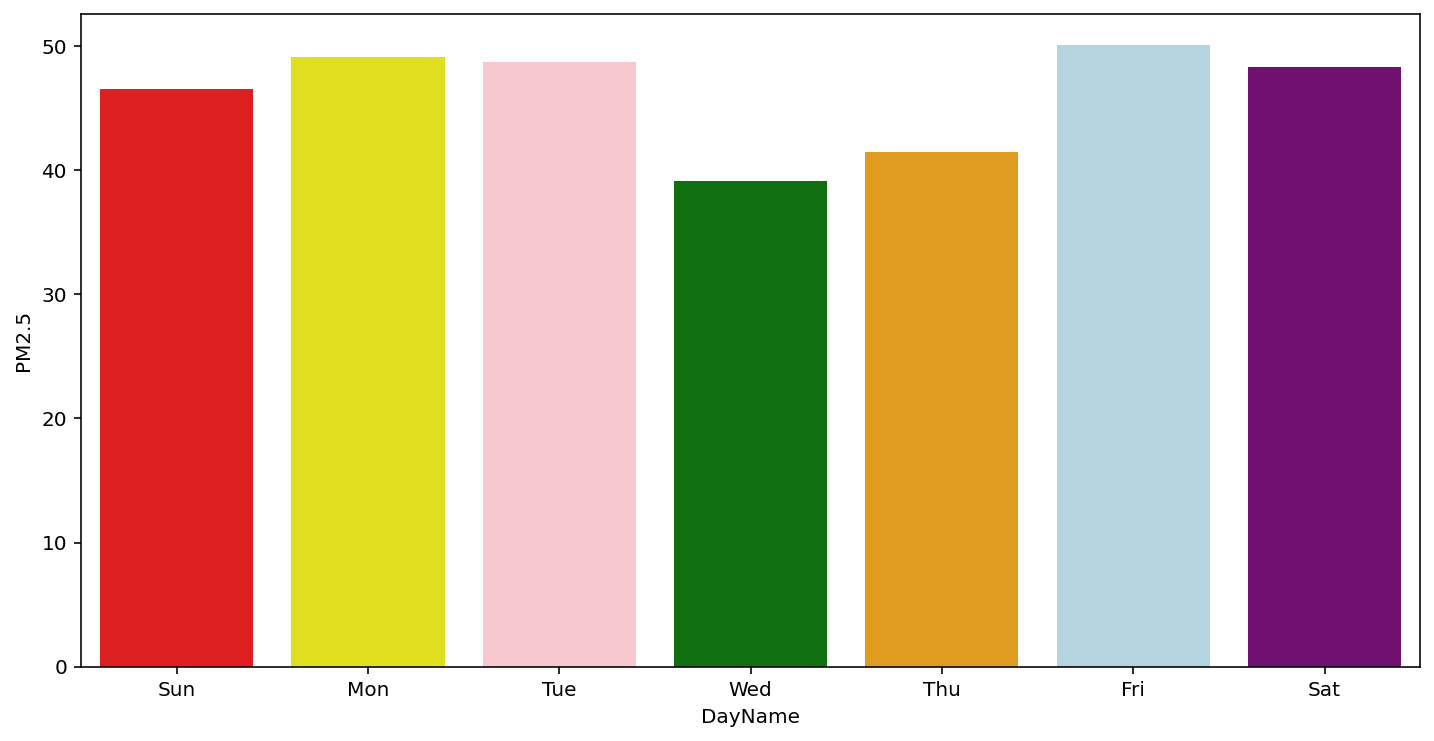

In [235]:
plt.figure(figsize=(12, 6))
sns.barplot(x='DayName',y='PM2.5',data=dg, palette=day_colors)

In [280]:
dg.DayName.unique()

['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
Categories (7, object): ['Sun' < 'Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat']

In [237]:
colors=['black' if c=='Mon' else '.8' for c in dg.DayName.unique()]
colors

['.8', 'black', '.8', '.8', '.8', '.8', '.8']

<AxesSubplot:xlabel='DayName', ylabel='PM2.5'>

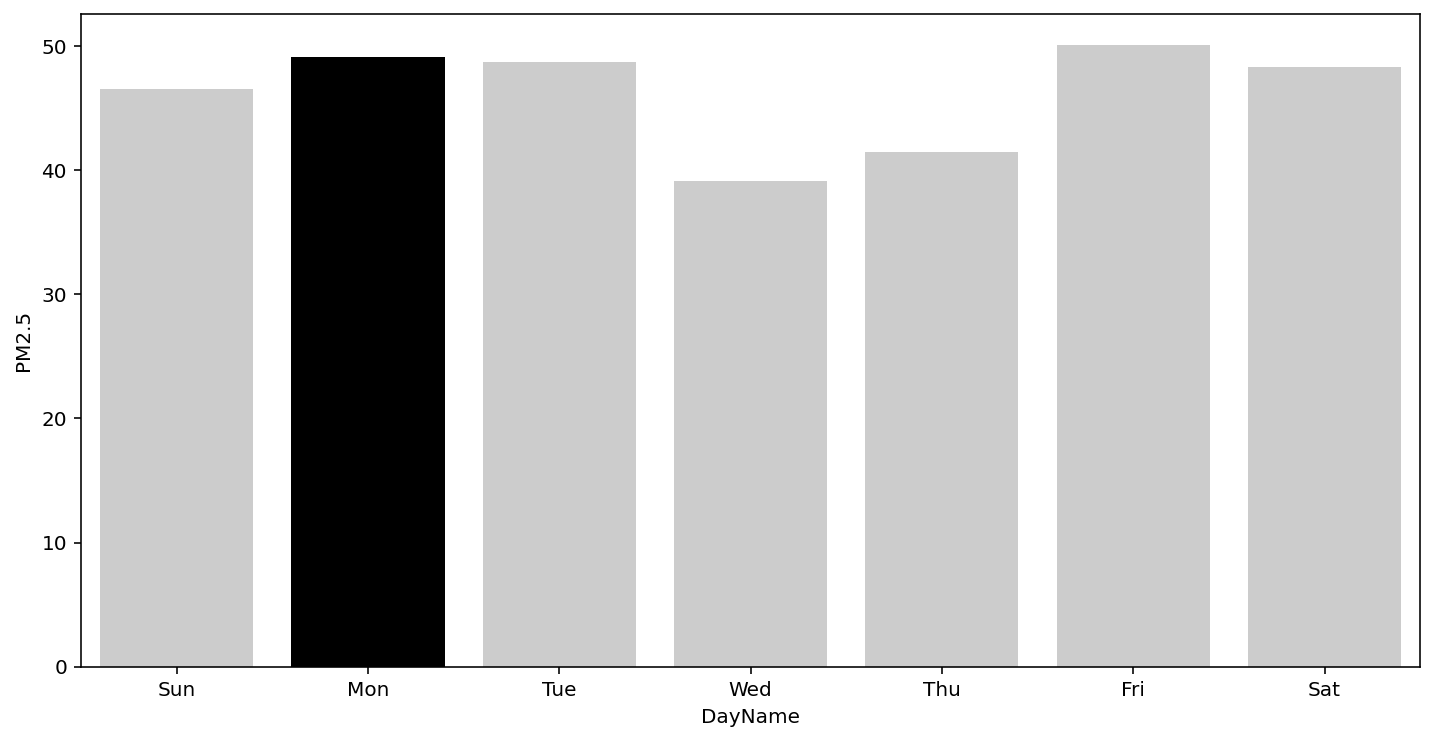

In [238]:
plt.figure(figsize=(12, 6))
sns.barplot(x='DayName',y='PM2.5',data=dg, palette=colors)